In [287]:
#Data set exploration
import numpy as np
import pandas as pd

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from statsmodels.formula.api import ols

Data for MMA survey

In [288]:
df = pd.read_excel('fs_amva.xlsx')
df

AÑO_ENCU   Nlista  ZonaAMVA  Mu  \
0         2012       26  Medellin  10   
1         2012       46  Medellin  10   
2         2012      102  Medellin  10   
3         2012      277  Medellin  10   
4         2012      294  Medellin  10   
...        ...      ...       ...  ..   
4356      2018  1001185  Medellin  10   
4357      2018  1001186  Medellin  10   
4358      2018  1001187  Medellin  10   
4359      2018  1001188  Medellin  10   
4360      2018  1001189  Medellin  10   

                                      Descripción CIIU   Grupo(Division)  \
0     472-Comercio al por menor de alimentos (vívere...               47   
1           241-Industrias básicas de hierro y de acero               24   
2           241-Industrias básicas de hierro y de acero               24   
3     464-Comercio al por mayor de artículos y enser...               46   
4     869-Otras actividades de atención relacionadas...               86   
...                                                 ...              ...   
4356  475-Comercio al por menor de otros enseres dom...               47   
4357  Comercio al por menor en puestos de venta móviles               47   
4358  475-Comercio al por menor de otros enseres dom...               47   
4359  Comercio al por menor de otros enseres domésti...               47   
4360  Comercio al por menor de otros enseres domésti...               47   

     Macrogrupo                                             DescMG  \
0             G  G-AL POR MAYOR Y MENOR; REPARE VEHÍCULOS AUTOS...   
1             C                        C-INDUSTRIAS MANUFACTURERAS   
2             C                        C-INDUSTRIAS MANUFACTURERAS   
3             G  G-AL POR MAYOR Y MENOR; REPARE VEHÍCULOS AUTOS...   
4             Q  Q-ACT. DE ATENCIÓN DE LA SALUD HUMANA Y DE ASI...   
...         ...                                                ...   
4356          G  G-AL POR MAYOR Y MENOR; REPARE VEHÍCULOS AUTOS...   
4357          G  G-AL POR MAYOR Y MENOR; REPARE VEHÍCULOS AUTOS...   
4358          G  G-AL POR MAYOR Y MENOR; REPARE VEHÍCULOS AUTOS...   
4359          G  G-AL POR MAYOR Y MENOR; REPARE VEHÍCULOS AUTOS...   
4360          G  G-AL POR MAYOR Y MENOR; REPARE VEHÍCULOS AUTOS...   

                  NOMESTABLECIMIENTO  Horas Abierto  N Total empleaos  \
0              ALIMENTOS FRUVEX LTDA              9               4.0   
1     LOTERO CARVAJAL FABIO DE JESUS             10               3.0   
2        CORREA BETANCUR RUBEN DARIO             10               1.0   
3                RUIZ DIEGO FERNANDO             10               2.0   
4         LOPEZ VELEZ MARIA MERCEDES             14               5.0   
...                              ...            ...               ...   
4356                FERRETERIA NATO              12               4.0   
4357              OCHO OCHO LICORES              18               3.0   
4358          DEPOSITO Y FERRETERIA               9               4.0   
4359                     DONDE RENE              14               1.0   
4360            BLOQUERA DE LA PEÑA               9               2.0   

     Tamaño estaBlecimiento  AreaT  Tiene Bodega  AreaBodega  \
0                     Micro    250             1         2.0   
1                     Micro     60             0         0.0   
2                     Micro     10             0         0.0   
3                     Micro     25             0         0.0   
4                     Micro    160             0         0.0   
...                     ...    ...           ...         ...   
4356                Mediana     28             1         0.0   
4357                  Micro     15             1         0.0   
4358                Mediana     40             1         0.0   
4359                  Micro     15             1         0.0   
4360                Mediana    450             1       100.0   

      Tiene Estacionamiento  TminutosParqueo  Viajes semanales  \
0                         1        23.333333   

In [4]:
print(df.columns)

Index(['AÑO_ENCU', 'Nlista', 'ZonaAMVA', 'Mu', 'Descripción CIIU ',
       'Grupo(Division)', 'Macrogrupo', 'DescMG', 'NOMESTABLECIMIENTO',
       'Horas Abierto', 'N Total empleaos', 'Tamaño estaBlecimiento', 'AreaT',
       'Tiene Bodega', 'AreaBodega', 'Tiene Estacionamiento',
       'TminutosParqueo', 'Viajes semanales', 'Kilogramos semanales'],
      dtype='object')


In [289]:
translation_dict = {
    'AÑO_ENCU': 'Year',
    'Nlista': 'List Number',
    'ZonaAMVA': 'AMVA Zone',
    'Mu': 'Mu',
    'Descripción CIIU ': 'ISIC Description',
    'Grupo(Division)': 'Division Group',
    'Macrogrupo': 'Macrogroup',
    'DescMG': 'MG Description',
    'NOMESTABLECIMIENTO': 'Establishment Name',
    'Horas Abierto': 'Hours Open (h)',
    'N Total empleaos': 'Total Employees',
    'Tamaño estaBlecimiento': 'Establishment Size',
    'AreaT': 'Total Area (m²)',
    'Tiene Bodega': 'Has Warehouse',
    'AreaBodega': 'Warehouse Area (m²)',
    'Tiene Estacionamiento': 'Has Parking',
    'TminutosParqueo': 'Parking Minutes (min)',
    'Viajes semanales': 'Weekly Trips (trips/week)',
    'Kilogramos semanales': 'Weekly Kilograms (kg/week)'
}


# Rename columns using the translation dictionary
df = df.rename(columns=translation_dict)

# Display the DataFrame with translated column names
df

Year  List Number AMVA Zone  Mu  \
0     2012           26  Medellin  10   
1     2012           46  Medellin  10   
2     2012          102  Medellin  10   
3     2012          277  Medellin  10   
4     2012          294  Medellin  10   
...    ...          ...       ...  ..   
4356  2018      1001185  Medellin  10   
4357  2018      1001186  Medellin  10   
4358  2018      1001187  Medellin  10   
4359  2018      1001188  Medellin  10   
4360  2018      1001189  Medellin  10   

                                       ISIC Description  Division Group  \
0     472-Comercio al por menor de alimentos (vívere...              47   
1           241-Industrias básicas de hierro y de acero              24   
2           241-Industrias básicas de hierro y de acero              24   
3     464-Comercio al por mayor de artículos y enser...              46   
4     869-Otras actividades de atención relacionadas...              86   
...                                                 ...             ...   
4356  475-Comercio al por menor de otros enseres dom...              47   
4357  Comercio al por menor en puestos de venta móviles              47   
4358  475-Comercio al por menor de otros enseres dom...              47   
4359  Comercio al por menor de otros enseres domésti...              47   
4360  Comercio al por menor de otros enseres domésti...              47   

     Macrogroup                                     MG Description  \
0             G  G-AL POR MAYOR Y MENOR; REPARE VEHÍCULOS AUTOS...   
1             C                        C-INDUSTRIAS MANUFACTURERAS   
2             C                        C-INDUSTRIAS MANUFACTURERAS   
3             G  G-AL POR MAYOR Y MENOR; REPARE VEHÍCULOS AUTOS...   
4             Q  Q-ACT. DE ATENCIÓN DE LA SALUD HUMANA Y DE ASI...   
...         ...                                                ...   
4356          G  G-AL POR MAYOR Y MENOR; REPARE VEHÍCULOS AUTOS...   
4357          G  G-AL POR MAYOR Y MENOR; REPARE VEHÍCULOS AUTOS...   
4358          G  G-AL POR MAYOR Y MENOR; REPARE VEHÍCULOS AUTOS...   
4359          G  G-AL POR MAYOR Y MENOR; REPARE VEHÍCULOS AUTOS...   
4360          G  G-AL POR MAYOR Y MENOR; REPARE VEHÍCULOS AUTOS...   

                  Establishment Name  Hours Open (h)  Total Employees  \
0              ALIMENTOS FRUVEX LTDA               9              4.0   
1     LOTERO CARVAJAL FABIO DE JESUS              10              3.0   
2        CORREA BETANCUR RUBEN DARIO              10              1.0   
3                RUIZ DIEGO FERNANDO              10              2.0   
4         LOPEZ VELEZ MARIA MERCEDES              14              5.0   
...                              ...             ...              ...   
4356                FERRETERIA NATO               12              4.0   
4357              OCHO OCHO LICORES               18              3.0   
4358          DEPOSITO Y FERRETERIA                9              4.0   
4359                     DONDE RENE               14              1.0   
4360            BLOQUERA DE LA PEÑA                9              2.0   

     Establishment Size  Total Area (m²)  Has Warehouse  Warehouse Area (m²)  \
0                 Micro              250              1                  2.0   
1                 Micro               60              0                  0.0   
2                 Micro               10              0                  0.0   
3                 Micro               25              0                  0.0   
4                 Micro              160              0                  0.0   
...                 ...              ...            ...                  ...   
4356            Mediana               28              1                  0.0   
4357              Micro               15              1                  0.0   
4358            Mediana               40              1                  0.0   
4359              Micro               15              1                  0.0   
4360          

In [290]:
df.head()

Year  List Number AMVA Zone  Mu  \
0  2012           26  Medellin  10   
1  2012           46  Medellin  10   
2  2012          102  Medellin  10   
3  2012          277  Medellin  10   
4  2012          294  Medellin  10   

                                    ISIC Description  Division Group  \
0  472-Comercio al por menor de alimentos (vívere...              47   
1        241-Industrias básicas de hierro y de acero              24   
2        241-Industrias básicas de hierro y de acero              24   
3  464-Comercio al por mayor de artículos y enser...              46   
4  869-Otras actividades de atención relacionadas...              86   

  Macrogroup                                     MG Description  \
0          G  G-AL POR MAYOR Y MENOR; REPARE VEHÍCULOS AUTOS...   
1          C                        C-INDUSTRIAS MANUFACTURERAS   
2          C                        C-INDUSTRIAS MANUFACTURERAS   
3          G  G-AL POR MAYOR Y MENOR; REPARE VEHÍCULOS AUTOS...   
4          Q  Q-ACT. DE ATENCIÓN DE LA SALUD HUMANA Y DE ASI...   

               Establishment Name  Hours Open (h)  Total Employees  \
0           ALIMENTOS FRUVEX LTDA               9              4.0   
1  LOTERO CARVAJAL FABIO DE JESUS              10              3.0   
2     CORREA BETANCUR RUBEN DARIO              10              1.0   
3             RUIZ DIEGO FERNANDO              10              2.0   
4      LOPEZ VELEZ MARIA MERCEDES              14              5.0   

  Establishment Size  Total Area (m²)  Has Warehouse  Warehouse Area (m²)  \
0              Micro              250              1                  2.0   
1              Micro               60              0                  0.0   
2              Micro               10              0                  0.0   
3              Micro               25              0                  0.0   
4              Micro              160              0                  0.0   

   Has Parking  Parking Minutes (min)  Weekly Trips (trips/week)  \
0            1              23.333333                       2.25   
1            1              15.000000                       8.00   
2            1               5.000000                       0.50   
3            1               5.000000                       3.75   
4            1               5.000000                       0.25   

   Weekly Kilograms (kg/week)  
0                     70.0000  
1                   1350.0000  
2                      3.4375  
3                      0.1250  
4                      7.5000

## Data for Food Service establishments

Categories of CIIU 561 and 563

In [291]:
df.columns

Index(['Year', 'List Number', 'AMVA Zone', 'Mu', 'ISIC Description',
       'Division Group', 'Macrogroup', 'MG Description', 'Establishment Name',
       'Hours Open (h)', 'Total Employees', 'Establishment Size',
       'Total Area (m²)', 'Has Warehouse', 'Warehouse Area (m²)',
       'Has Parking', 'Parking Minutes (min)', 'Weekly Trips (trips/week)',
       'Weekly Kilograms (kg/week)'],
      dtype='object')

In [292]:
# Fill NaN values in 'Descripción CIIU' column with an empty string
df['ISIC Description'] = df['ISIC Description'].fillna('')

# Create a boolean mask to filter rows
# Categories 561 and 563 corresponds to the FS
mask = df['ISIC Description'].str.contains(r'\b(?:561|563)-', regex=True)

# Use the mask to filter the DataFrame
fs_df = df[mask]

# Now, filtered_df contains rows where the 'Descripción CIIU' column contains 561 or 563 followed by a hyphen.
print(len(fs_df))

266


In [58]:
# Specify the file path where you want to save the CSV file
csv_file_path = 'fs.csv'  # Replace 'your_file_name' with the desired file name

# Export the DataFrame to a CSV file
fs_df.to_csv(csv_file_path, index=False)  # Set index to False if you don't want to save the index


## Numeric df (only the continous variables)

* Descriptive analysis

In [293]:
numeric_colums=['Hours Open (h)', 'Total Employees', 'Total Area (m²)',
        'Warehouse Area (m²)', 'Parking Minutes (min)',
       'Weekly Trips (trips/week)', 'Weekly Kilograms (kg/week)']
numeric_fs_df=fs_df[numeric_colums]
numeric_fs_df = numeric_fs_df.apply(pd.to_numeric, errors='coerce')
numeric_fs_df.describe().round(2)

Hours Open (h)  Total Employees  Total Area (m²)  Warehouse Area (m²)  \
count          266.00           266.00           266.00               266.00   
mean            12.39             3.65            79.28                34.54   
std              4.33             4.15           132.95                73.09   
min              4.00             1.00             4.00                 0.00   
25%             10.00             2.00            25.00                 0.00   
50%             12.00             3.00            45.00                16.00   
75%             14.00             4.00            80.00                48.00   
max             24.00            42.00          1450.00              1000.00   

       Parking Minutes (min)  Weekly Trips (trips/week)  \
count                 266.00                     266.00   
mean                   11.51                       6.69   
std                     6.54                       6.74   
min                     1.00                       0.25   
25%                     7.50                       3.00   
50%                    10.00                       5.00   
75%                    15.00                       8.75   
max                    36.67                      73.00   

       Weekly Kilograms (kg/week)  
count                      266.00  
mean                       644.78  
std                       1640.97  
min                          1.10  
25%                        117.75  
50%                        255.90  
75%                        532.69  
max                      17610.00

In [9]:
numeric_fs_df

Hours Open (h)  Total Employees  Total Area (m²)  Warehouse Area (m²)  \
25                14              1.0              100                100.0   
49                18              2.0              170                170.0   
105               15              5.0              300                300.0   
110               12              4.5               40                  5.0   
128               10              7.0              220                220.0   
...              ...              ...              ...                  ...   
4223               8              3.0               70                 70.0   
4224               8              1.5               12                  4.0   
4227              11              2.0               10                  0.0   
4230              10              1.0               60                 15.0   
4354              12              3.0                9                  0.0   

      Parking Minutes (min)  Weekly Trips (trips/week)  \
25                15.000000                       5.00   
49                 5.000000                       5.00   
105               10.000000                      21.50   
110                7.500000                       1.00   
128               30.000000                       5.00   
...                     ...                        ...   
4223               2.000000                       4.25   
4224              10.000000                       2.00   
4227               6.666667                      10.00   
4230               6.833333                       5.00   
4354               3.000000                       2.00   

      Weekly Kilograms (kg/week)  
25                      17610.00  
49                      14000.00  
105                      8033.75  
110                      6450.00  
128                      5948.00  
...                          ...  
4223                       12.50  
4224                       12.00  
4227                       10.75  
4230                        9.50  
4354                        1.10  

[266 rows x 7 columns]

In [295]:
# Check for negative values in each column
negative_values = numeric_fs_df.apply(lambda col: col[col < 0].sum())

# Print the sum of negative values in each column
print(negative_values)


Hours Open (h)                0.0
Total Employees               0.0
Total Area (m²)               0.0
Warehouse Area (m²)           0.0
Parking Minutes (min)         0.0
Weekly Trips (trips/week)     0.0
Weekly Kilograms (kg/week)    0.0
dtype: float64


#### * Box plots IQR of the numeric colums

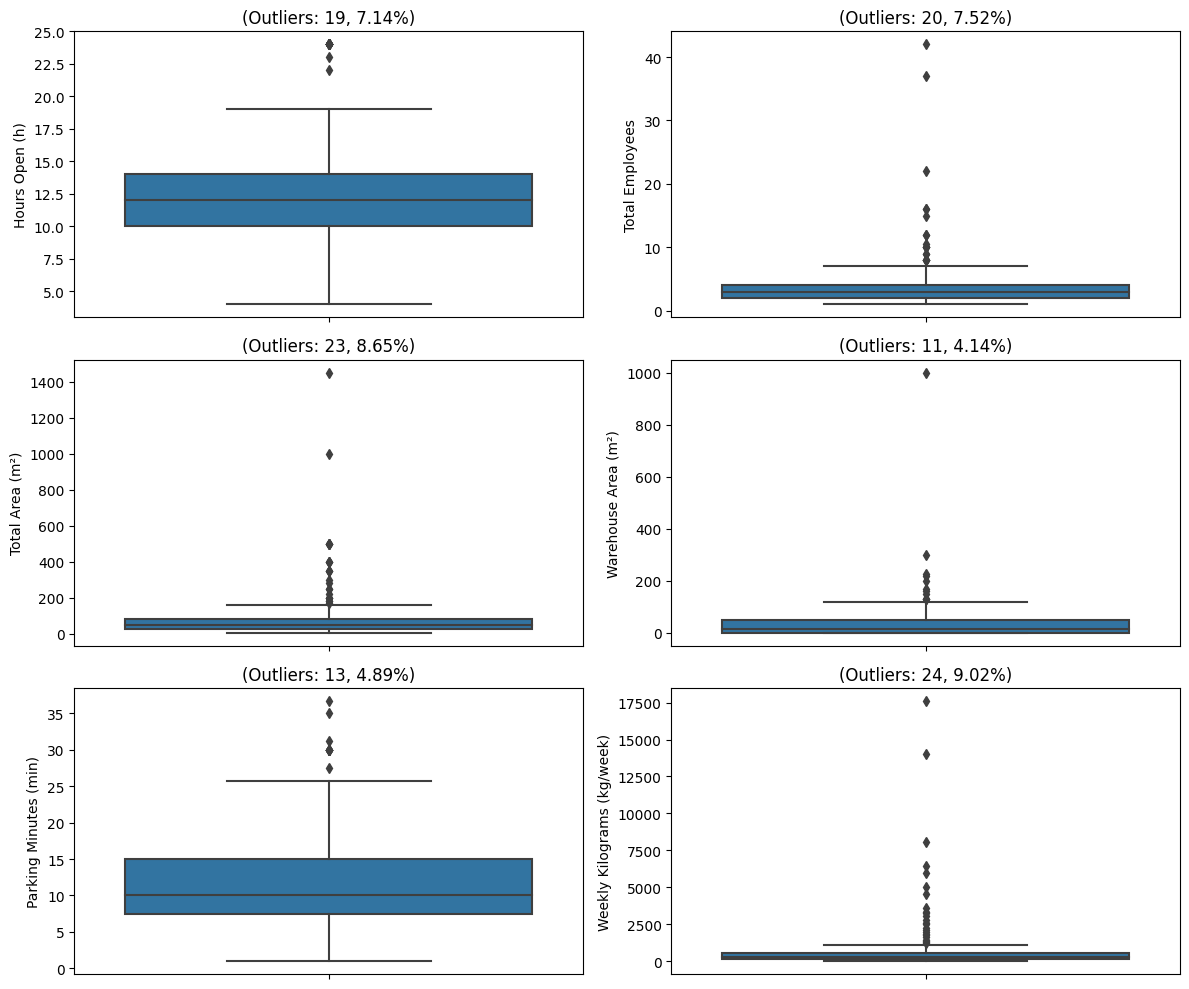

In [296]:
#Outliers wirh IQR Method

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame to store the outlier information for each column
outlier_df = pd.DataFrame(index=numeric_fs_df.index)

# Create subplots for each variable (excluding 'Weekly Trips') in a 3x2 grid
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# Flatten the axes array to access individual subplots
axes = axes.flatten()

# Create a list to store the columns to be plotted
columns_to_plot = [col for col in numeric_fs_df.columns if col != 'Weekly Trips (trips/week)']

# Loop through each column to be plotted
for i, column_name in enumerate(columns_to_plot):
    # Calculate the IQR (Interquartile Range) for the current column
    Q1 = numeric_fs_df[column_name].quantile(0.25)
    Q3 = numeric_fs_df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers based on the IQR method
    is_outlier = (numeric_fs_df[column_name] < lower_bound) | (numeric_fs_df[column_name] > upper_bound)
    
    # Store the outlier information in the outlier_df DataFrame
    outlier_df[column_name] = is_outlier

    # Calculate the number of outliers for the current column
    num_outliers = outlier_df[column_name].sum()

    # Calculate the percentage of outliers
    total_data_points = len(numeric_fs_df[column_name])
    percentage_outliers = (num_outliers / total_data_points) * 100

    # Create a boxplot for the current column with the current subplot
    sns.boxplot(y=numeric_fs_df[column_name], ax=axes[i])

    # Set the title including outlier count and percentage
    axes[i].set_title(f'(Outliers: {num_outliers}, {percentage_outliers:.2f}%)')

# Adjust subplot layout
plt.tight_layout()

# Show the subplots
plt.show()


### Box plots with Z score method

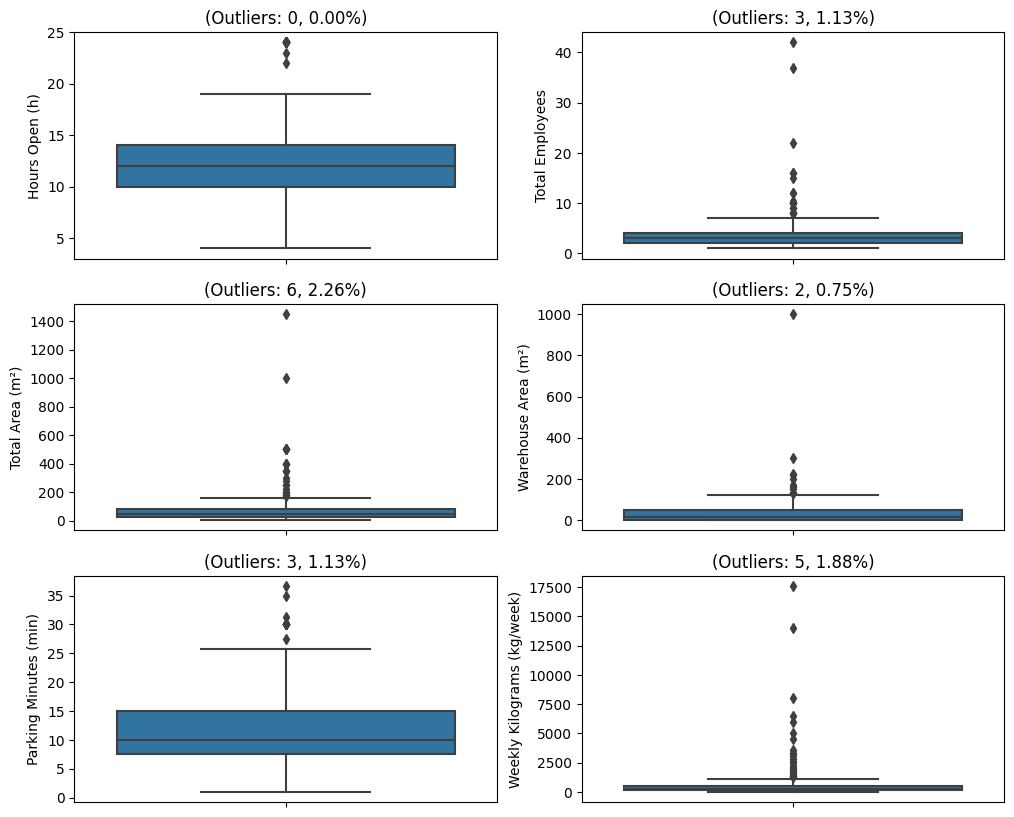

In [117]:
#Outliers with Z score


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Set your threshold for identifying outliers
threshold = 3  # Adjust the threshold as needed

# Create a DataFrame to store the outlier information for each column
outlier_df = pd.DataFrame(index=numeric_fs_df.index)

# Create subplots for each variable (excluding 'Weekly Trips') in a 3x2 grid
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# Flatten the axes array to access individual subplots
axes = axes.flatten()

# Create a list to store the columns to be plotted
columns_to_plot = [col for col in numeric_fs_df.columns if col != 'Weekly Trips (trips/week)']

# Loop through each column to be plotted
for i, column_name in enumerate(columns_to_plot):
    # Calculate z-scores for the current column
    z_scores = stats.zscore(numeric_fs_df[column_name])
    
    # Identify outliers based on the threshold
    is_outlier = np.logical_xor(np.abs(z_scores) > threshold, False)
    
    # Store the outlier information in the outlier_df DataFrame
    outlier_df[column_name] = is_outlier

    # Calculate the number of outliers for the current column
    num_outliers = outlier_df[column_name].sum()

    # Calculate the percentage of outliers
    total_data_points = len(numeric_fs_df[column_name])
    percentage_outliers = (num_outliers / total_data_points) * 100

    # Create a boxplot for the current column with the current subplot
    sns.boxplot(y=numeric_fs_df[column_name], ax=axes[i])

    # Set the title including outlier count and percentage
    axes[i].set_title(f'(Outliers: {num_outliers}, {percentage_outliers:.2f}%)')



### Box plot of weekly trips

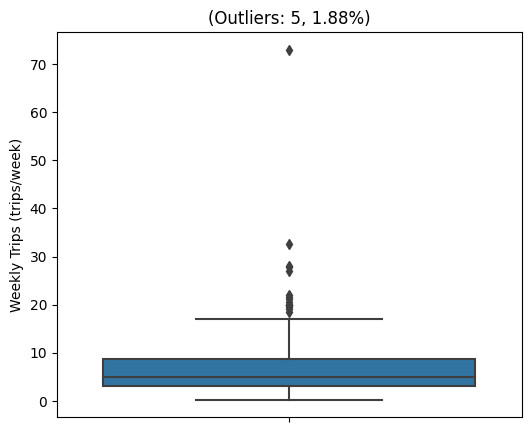

In [297]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Define your threshold for identifying outliers
threshold = 3  # Adjust the threshold as needed

# Create a separate subplot for 'Weekly Trips' column
plt.figure(figsize=(6, 5))  # Adjust the figure size as needed

# Calculate z-scores for 'Weekly Trips'
z_scores_weekly_trips = stats.zscore(numeric_fs_df['Weekly Trips (trips/week)'])

# Identify outliers based on the threshold for 'Weekly Trips'
is_outlier_weekly_trips = np.logical_xor(np.abs(z_scores_weekly_trips) > threshold, False)

# Store the outlier information in the outlier_df DataFrame for 'Weekly Trips'
outlier_df['Weekly Trips (trips/week)'] = is_outlier_weekly_trips

# Calculate the number of outliers for the 'Weekly Trips' column
num_outliers = outlier_df['Weekly Trips (trips/week)'].sum()

# Calculate the percentage of outliers
total_data_points = len(numeric_fs_df['Weekly Trips (trips/week)'])
percentage_outliers = (num_outliers / total_data_points) * 100

# Create a boxplot for 'Weekly Trips' column with outliers
sns.boxplot(y=numeric_fs_df['Weekly Trips (trips/week)'], showfliers=True)  # Use showfliers=True to display outliers
plt.title(f'(Outliers: {num_outliers}, {percentage_outliers:.2f}%)')

# Show the plot
plt.show()

In [ ]:
# Set your threshold for identifying outliers
threshold = 3  # Adjust the threshold as needed

# Create a DataFrame to store the outlier information for each column
outlier_df = pd.DataFrame(index=numeric_fs_df.index)

# Create subplots for each variable in a 3x2 grid
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# Flatten the axes array to access individual subplots
axes = axes.flatten()


# Loop through each column in numeric_fs_df
for column_name in numeric_fs_df.columns:
    # Calculate z-scores for the current column
    z_scores = stats.zscore(numeric_fs_df[column_name])
    
    # Identify outliers based on the threshold
    is_outlier = np.logical_xor(np.abs(z_scores) > threshold, False)
    
    # Store the outlier information in the outlier_df DataFrame
    outlier_df[column_name] = is_outlier

# Now, outlier_df contains True/False values indicating outliers for each column

# Calculate the number of outliers per column (column-wise sum)
outliers_per_column = outlier_df.sum(axis=0)

# Create a boxplot for each column with outlier count and percentage in title
for column in numeric_fs_df.columns:
    ax = sns.boxplot(y=numeric_fs_df[column])
    
    # Calculate the number of outliers for the current column
    num_outliers = outliers_per_column[column]
    
    # Calculate the percentage of outliers
    total_data_points = len(numeric_fs_df[column])
    percentage_outliers = (num_outliers / total_data_points) * 100
    
    # Create subplots for each variable in a 3x2 grid
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

    # Flatten the axes array to access individual subplots
    axes = axes.flatten()


    # Add outlier count and percentage to the title
    plt.title(f'Boxplot of {column} (Outliers: {num_outliers}, {percentage_outliers:.2f}%)')
    
    plt.show()


### Box plots general

In [ ]:
# Create a boxplot for each column
for column in numeric_fs_df.columns:
    sns.boxplot(y=numeric_fs_df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

* Histograms for each numeric data

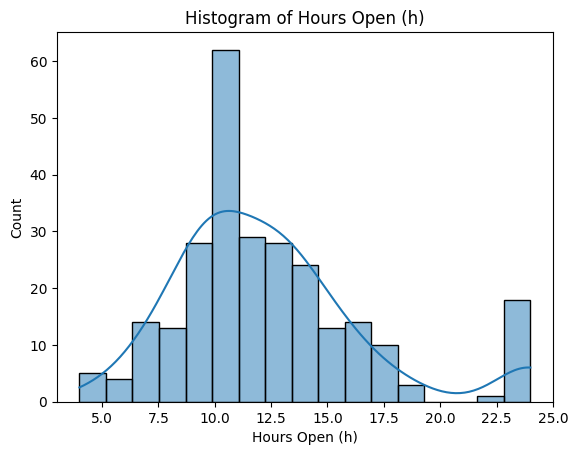

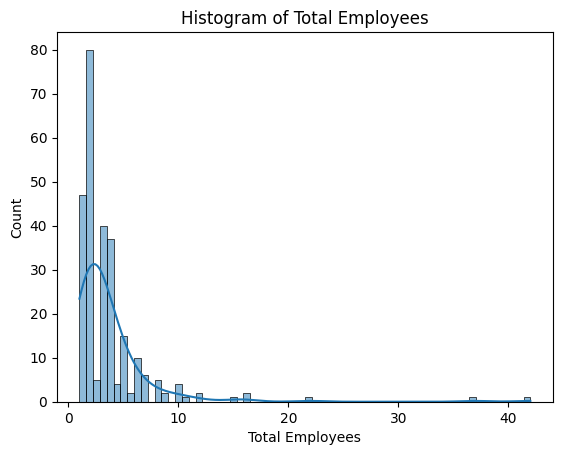

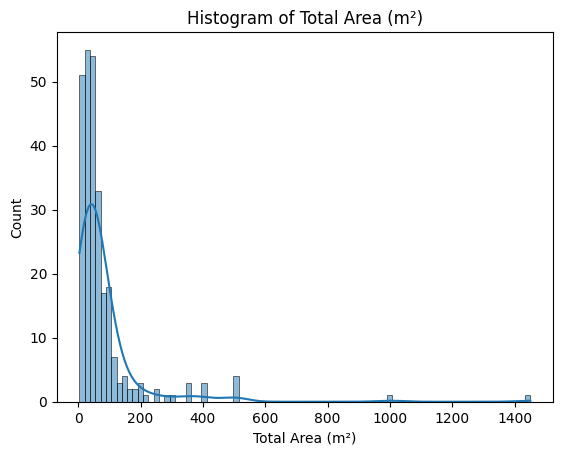

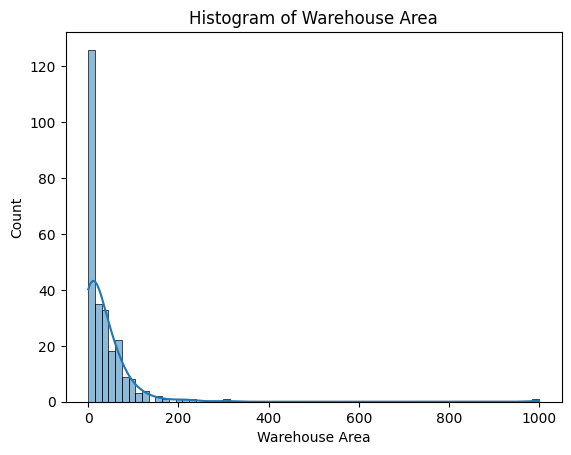

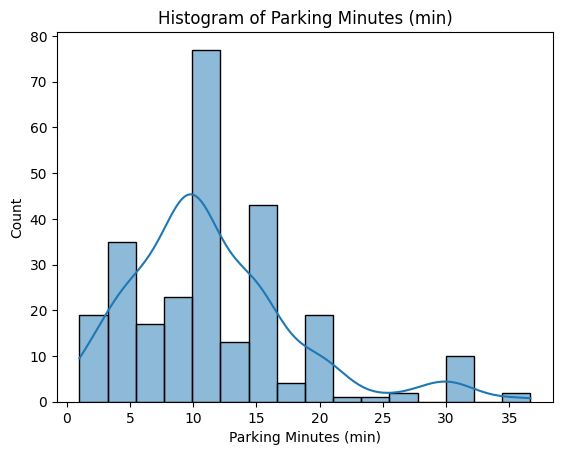

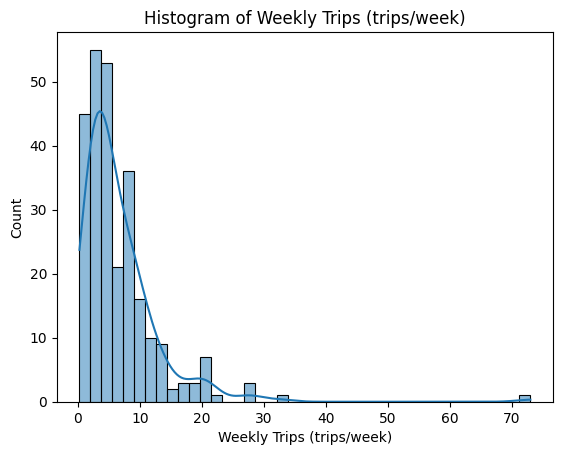

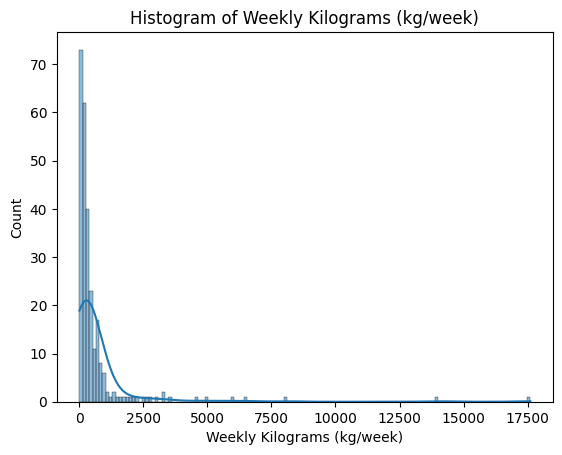

In [65]:
for column in numeric_fs_df.columns:
    sns.histplot(data=numeric_fs_df, x=column, kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

It corresponds a gamma distribution, so this analysis will be made like this

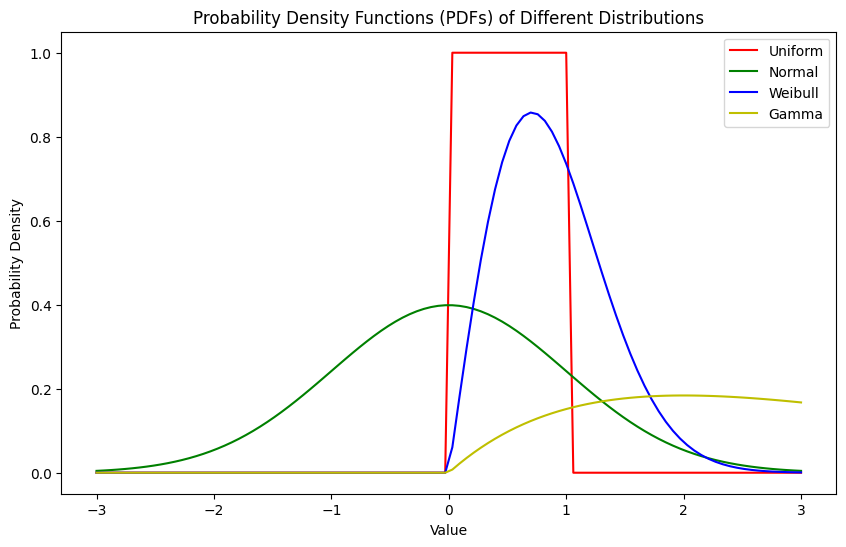

In [66]:
# Generate random data from different distributions
data_uniform = np.random.uniform(0, 1, 1000)
data_normal = np.random.normal(0, 1, 1000)
data_weibull = np.random.weibull(2, 1000)
data_gamma = np.random.gamma(2, 2, 1000)

# Define the range of x values for the plots
x = np.linspace(-3, 3, 100)

# Calculate the PDFs for each distribution
pdf_uniform = stats.uniform.pdf(x, loc=0, scale=1)
pdf_normal = stats.norm.pdf(x, loc=0, scale=1)
pdf_weibull = stats.weibull_min.pdf(x, c=2)
pdf_gamma = stats.gamma.pdf(x, a=2, scale=2)

# Create a single plot for all PDFs
plt.figure(figsize=(10, 6))

# Plot the PDFs of each distribution
plt.plot(x, pdf_uniform, 'r-', label='Uniform')
plt.plot(x, pdf_normal, 'g-', label='Normal')
plt.plot(x, pdf_weibull, 'b-', label='Weibull')
plt.plot(x, pdf_gamma, 'y-', label='Gamma')

# Set labels and title
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Probability Density Functions (PDFs) of Different Distributions')

# Add a legend to identify each distribution
plt.legend()

# Show the plot
plt.show()

* Gamma distribution analysis

Mean for column 'Hours Open (h)': 12.387218045112782
Median for column 'Hours Open (h)': 12.0
Variance for column 'Hours Open (h)': 18.635776471253322
Skewness for column 'Hours Open (h)': 1.0998921542800069
Kurtosis for column 'Hours Open (h)': 1.26149289937426


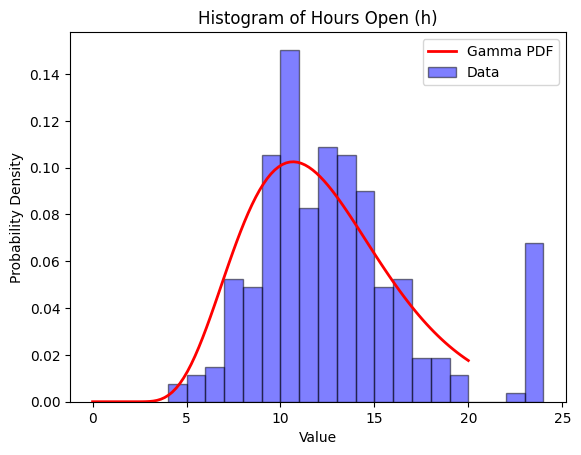

Mean for column 'Total Employees': 3.654135338345865
Median for column 'Total Employees': 3.0
Variance for column 'Total Employees': 17.192407711006837
Skewness for column 'Total Employees': 5.657709134990179
Kurtosis for column 'Total Employees': 42.794474504341544


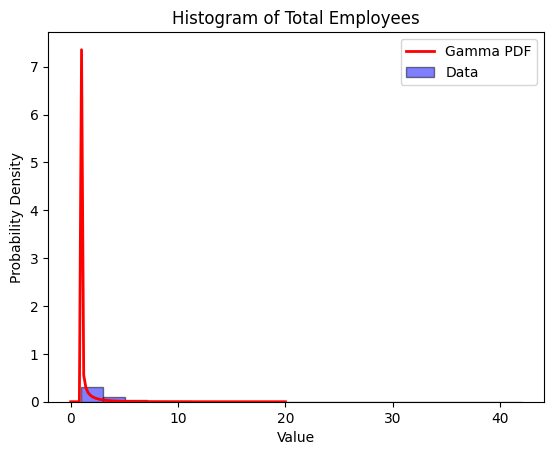

Mean for column 'Total Area (m²)': 79.28195488721805
Median for column 'Total Area (m²)': 45.0
Variance for column 'Total Area (m²)': 17608.67614053932
Skewness for column 'Total Area (m²)': 6.16368597166304
Kurtosis for column 'Total Area (m²)': 50.718061784626876


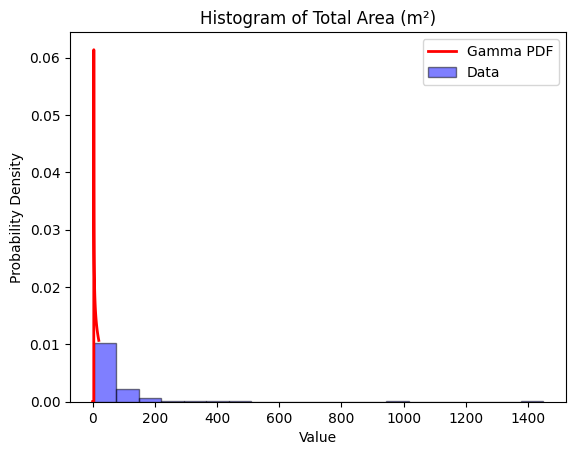

Mean for column 'Warehouse Area': 34.53671428571428
Median for column 'Warehouse Area': 16.001
Variance for column 'Warehouse Area': 5322.777859828141
Skewness for column 'Warehouse Area': 9.15595289110049
Kurtosis for column 'Warehouse Area': 113.57834373793594


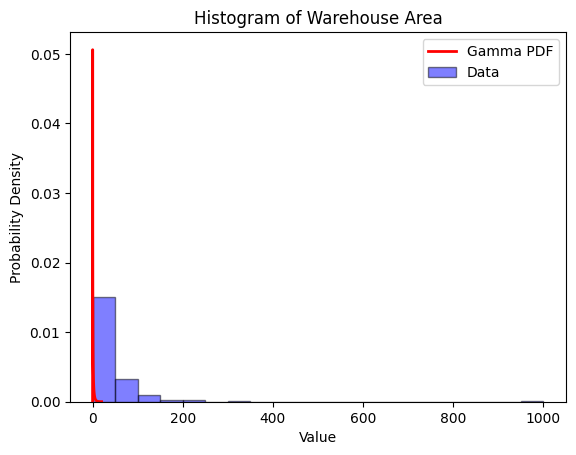

Mean for column 'Parking Minutes (min)': 11.506690111469679
Median for column 'Parking Minutes (min)': 10.0
Variance for column 'Parking Minutes (min)': 42.66409401791621
Skewness for column 'Parking Minutes (min)': 1.2214790800436948
Kurtosis for column 'Parking Minutes (min)': 1.9468969624040309


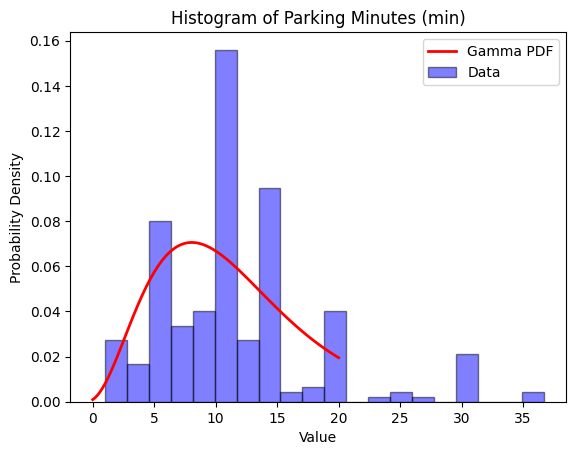

Mean for column 'Weekly Trips (trips/week)': 6.68796992481203
Median for column 'Weekly Trips (trips/week)': 5.0
Variance for column 'Weekly Trips (trips/week)': 45.32275001413309
Skewness for column 'Weekly Trips (trips/week)': 4.46025536843263
Kurtosis for column 'Weekly Trips (trips/week)': 35.15413456778183


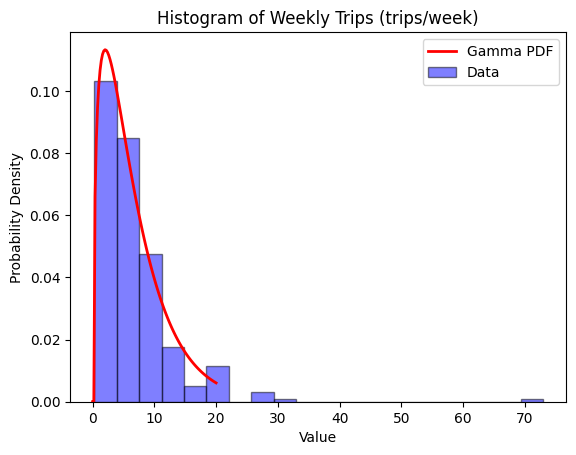

Mean for column 'Weekly Kilograms (kg/week)': 644.7763721804511
Median for column 'Weekly Kilograms (kg/week)': 255.89499999999998
Variance for column 'Weekly Kilograms (kg/week)': 2682646.6424378725
Skewness for column 'Weekly Kilograms (kg/week)': 7.057632102145575
Kurtosis for column 'Weekly Kilograms (kg/week)': 59.91643857942899


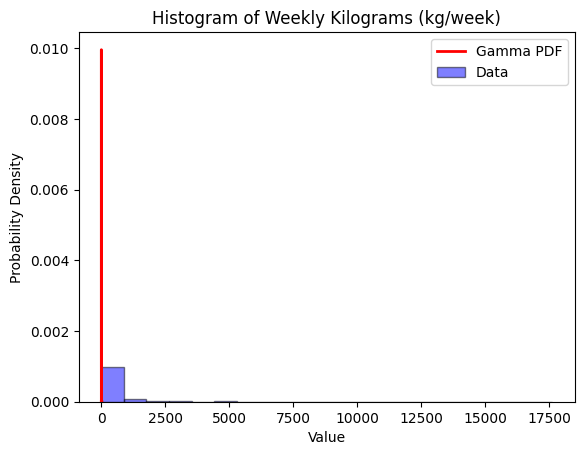

In [67]:
# Iterate through the columns
for column_name in numeric_fs_df.columns:
    # Extract the data from the column
    data = numeric_fs_df[column_name]

    # Check for and handle zero or negative values
    min_value = data.min()
    if min_value <= 0:
        data = data - min_value + 0.001  # Add a small constant to make data strictly positive


    # Step 1: Explore the data
    # Calculate summary statistics
    mean = np.mean(data)
    median = np.median(data)
    variance = np.var(data)
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)

    # Create a histogram
    plt.hist(data, bins=20, density=True, alpha=0.5, color='blue', edgecolor='black')
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.title(f'Histogram of {column_name}')

    # Step 2: Hypothesis Testing
    # Perform goodness-of-fit test (Kolmogorov-Smirnov test)
    ks_statistic, ks_p_value = stats.kstest(data, 'gamma', args=(2, 0, 2))
    if ks_p_value > 0.05:
        print(f"H0 (gamma distribution) is not rejected for column '{column_name}' (p-value =", ks_p_value, ")")

    # Step 3: Parameter Estimation
    shape_estimate, loc_estimate, scale_estimate = stats.gamma.fit(data)

    # Step 4: Descriptive Statistics
    print(f"Mean for column '{column_name}':", mean)
    print(f"Median for column '{column_name}':", median)
    print(f"Variance for column '{column_name}':", variance)
    print(f"Skewness for column '{column_name}':", skewness)
    print(f"Kurtosis for column '{column_name}':", kurtosis)

    # Step 5: Confidence Intervals (Optional)
    # Calculate confidence intervals for parameter estimates
    ci_shape = stats.gamma.fit(data, floc=0)[0:2]
    ci_scale = stats.gamma.fit(data, f0=shape_estimate)[2:4]

    # Step 6: Visualization
    # Create a PDF plot of the gamma distribution overlaid with the histogram
    x = np.linspace(0, 20, 100)
    pdf_gamma = stats.gamma.pdf(x, shape_estimate, loc_estimate, scale_estimate)
    plt.plot(x, pdf_gamma, 'r-', lw=2)

    # Step 7: Inferential Statistics (e.g., calculate probabilities, percentiles)

    # Step 8: Model Assessment (visual comparison of PDF and histogram)

    # Step 9: Residual Analysis (Optional)

    # Step 10: Reporting (document findings)

    # Show the plot
    plt.legend(['Gamma PDF', 'Data'])
    plt.show()

* Graphs of distributions

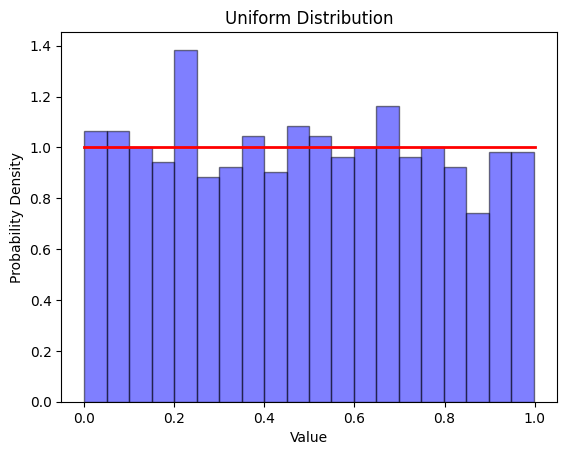

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate random data from a uniform distribution
data_uniform = np.random.uniform(0, 1, 1000)

# Create a histogram
plt.hist(data_uniform, bins=20, density=True, alpha=0.5, color='blue', edgecolor='black')

# Plot the PDF of the uniform distribution
x = np.linspace(0, 1, 100)
pdf_uniform = stats.uniform.pdf(x, loc=0, scale=1)
plt.plot(x, pdf_uniform, 'r-', lw=2)

plt.title('Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.show()


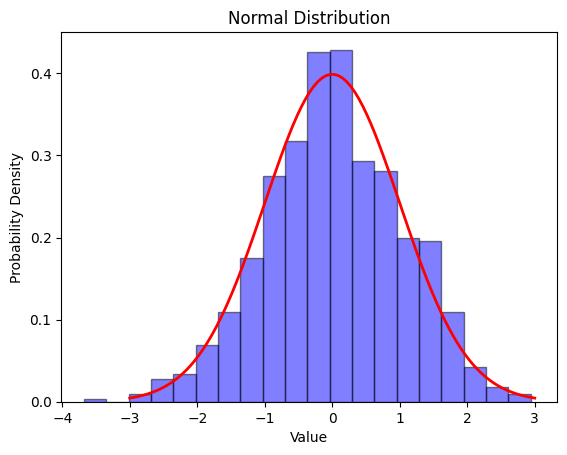

In [69]:
# Generate random data from a normal distribution
data_normal = np.random.normal(0, 1, 1000)

# Create a histogram
plt.hist(data_normal, bins=20, density=True, alpha=0.5, color='blue', edgecolor='black')

# Plot the PDF of the normal distribution
x = np.linspace(-3, 3, 100)
pdf_normal = stats.norm.pdf(x, loc=0, scale=1)
plt.plot(x, pdf_normal, 'r-', lw=2)

plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.show()

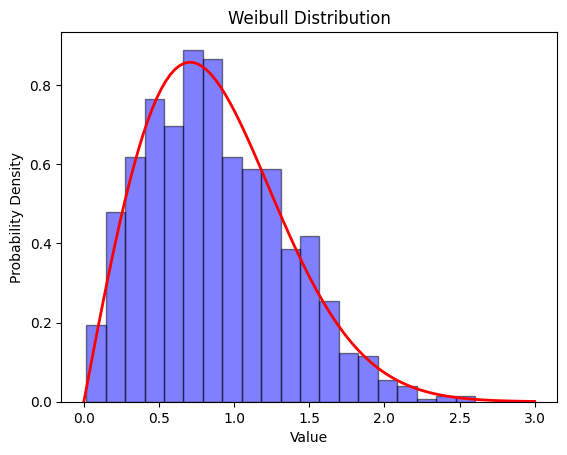

In [70]:
# Generate random data from a Weibull distribution
data_weibull = np.random.weibull(2, 1000)

# Create a histogram
plt.hist(data_weibull, bins=20, density=True, alpha=0.5, color='blue', edgecolor='black')

# Plot the PDF of the Weibull distribution
x = np.linspace(0, 3, 100)
pdf_weibull = stats.weibull_min.pdf(x, c=2)
plt.plot(x, pdf_weibull, 'r-', lw=2)

plt.title('Weibull Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.show()

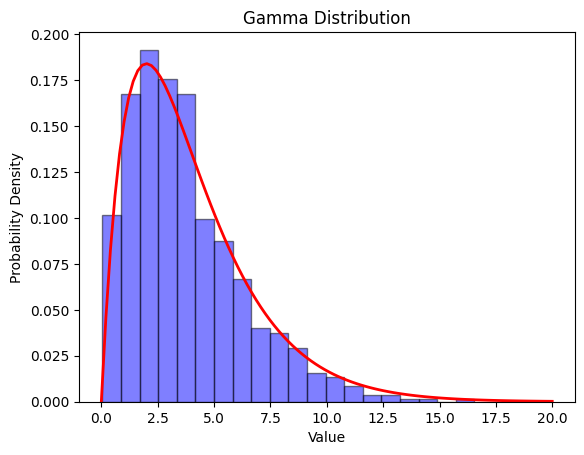

In [71]:
# Generate random data from a gamma distribution
data_gamma = np.random.gamma(2, 2, 1000)

# Create a histogram
plt.hist(data_gamma, bins=20, density=True, alpha=0.5, color='blue', edgecolor='black')

# Plot the PDF of the gamma distribution
x = np.linspace(0, 20, 100)
pdf_gamma = stats.gamma.pdf(x, a=2, scale=2)
plt.plot(x, pdf_gamma, 'r-', lw=2)

plt.title('Gamma Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.show()

## Data for Modeling

In [223]:
df.columns

Index(['Year', 'List Number', 'AMVA Zone', 'Mu', 'ISIC Description',
       'Division Group', 'Macrogroup', 'MG Description', 'Establishment Name',
       'Hours Open (h)', 'Total Employees', 'Establishment Size',
       'Total Area (m²)', 'Has Warehouse', 'Warehouse Area (m²)',
       'Has Parking', 'Parking Minutes (min)', 'Weekly Trips (trips/week)',
       'Weekly Kilograms (kg/week)'],
      dtype='object')

* Df with all the  variables

In [224]:
model_columns=['Weekly Trips (trips/week)','Hours Open (h)', 'Total Employees', 'Establishment Size', 
               'Total Area (m²)',  'Has Warehouse', 'Warehouse Area (m²)',
                 'Has Parking', 'Parking Minutes (min)'
               , 'Weekly Kilograms (kg/week)']
model_df=fs_df[model_columns]

# Convert all data to numeric, replacing non-convertible values with NaN
model_df = model_df.apply(pd.to_numeric, errors='coerce')

# Now, df contains only numeric data, and non-convertible values are NaN
model_df['Establishment Size'] = fs_df['Establishment Size'].astype(str)
model_df
model_df.describe().round(2)

Weekly Trips (trips/week)  Hours Open (h)  Total Employees  \
count                     266.00          266.00           266.00   
mean                        6.69           12.39             3.65   
std                         6.74            4.33             4.15   
min                         0.25            4.00             1.00   
25%                         3.00           10.00             2.00   
50%                         5.00           12.00             3.00   
75%                         8.75           14.00             4.00   
max                        73.00           24.00            42.00   

       Total Area (m²)  Has Warehouse  Warehouse Area (m²)  Has Parking  \
count           266.00         266.00               266.00       266.00   
mean             79.28           0.66                34.54         0.35   
std             132.95           0.47                73.09         0.48   
min               4.00           0.00                 0.00         0.00   
25%              25.00           0.00                 0.00         0.00   
50%              45.00           1.00                16.00         0.00   
75%              80.00           1.00                48.00         1.00   
max            1450.00           1.00              1000.00         1.00   

       Parking Minutes (min)  Weekly Kilograms (kg/week)  
count                 266.00                      266.00  
mean                   11.51                      644.78  
std                     6.54                     1640.97  
min                     1.00                        1.10  
25%                     7.50                      117.75  
50%                    10.00                      255.90  
75%                    15.00                      532.69  
max                    36.67                    17610.00

In [74]:
# Function to check if a variable is continuous
def is_continuous(series):
    # Check if the data type is numeric (int or float)
    if pd.api.types.is_numeric_dtype(series):
        # Check if the number of unique values is large
        return len(series.unique()) > 10  # Adjust the threshold as needed
    return False

# Function to check if a variable is categorical
def is_categorical(series, valid_types=("object", "category")):
    # Check if the data type is in the list of valid types
    return series.dtype.name in valid_types

# Function to check if a variable is discrete (modified to consider any categorical variable as discrete)
def is_discrete(series):
    # Check if a variable is categorical
    return is_categorical(series)

# Function to check if a variable is binary
def is_binary(series):
    # Check if a variable has exactly 2 unique values
    return len(series.unique()) == 2

# Check each column's data type
for column_name in model_df.columns:
    column = model_df[column_name]
    if is_continuous(column):
        print(f"'{column_name}' is a continuous variable.")
    elif is_discrete(column):
        if is_categorical(column):
            print(f"'{column_name}' is a categorical variable.")
        else:
            print(f"'{column_name}' is a discrete variable.")
    elif is_binary(column):
        print(f"'{column_name}' is a binary variable.")
    else:
        print(f"'{column_name}' is not categorized as continuous, discrete, or binary.")


'Weekly Trips (trips/week)' is a continuous variable.
'Hours Open (h)' is a continuous variable.
'Total Employees' is a continuous variable.
'Establishment Size' is a categorical variable.
'Total Area (m²)' is a continuous variable.
'Has Warehouse' is a binary variable.
'Warehouse Area' is a continuous variable.
'Has Parking' is a binary variable.
'Parking Minutes (min)' is a continuous variable.
'Weekly Kilograms (kg/week)' is a continuous variable.


* Histogram for non numeric columns

* DF with Categorical variable

In [298]:
categorical_colums=['Establishment Size']
categorical_df=fs_df[categorical_colums]
categorical_df

Establishment Size
25                Micro
49                Micro
105               Micro
110               Micro
128               Micro
...                 ...
4223              Micro
4224              Micro
4227              Micro
4230              Micro
4354              Micro

[266 rows x 1 columns]

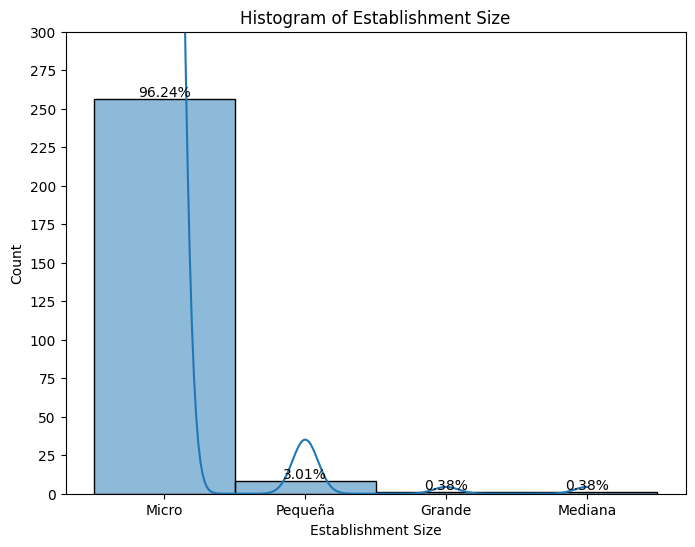

In [299]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create histograms for each column
for column in categorical_df.columns:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    
    ax = sns.histplot(data=categorical_df, x=column, kde=True)
    
    # Calculate the percentage of each bin and annotate
    total_data_points = len(categorical_df[column])
    for p in ax.patches:
        percentage = (p.get_height() / total_data_points) * 100
        ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    
    # Set the y-axis limits and ticks
    ax.set_ylim(0, 300)
    ax.set_yticks(range(0, 301, 25))
    
    plt.title(f'Histogram of {column}')
    plt.show()



* DF with Binary columns

In [300]:
binary_colums=['Has Warehouse', 'Has Parking']
binary_df=fs_df[binary_colums]
binary_df

Has Warehouse  Has Parking
25                1            0
49                1            0
105               1            0
110               1            1
128               1            0
...             ...          ...
4223              1            0
4224              1            0
4227              0            0
4230              1            1
4354              0            1

[266 rows x 2 columns]

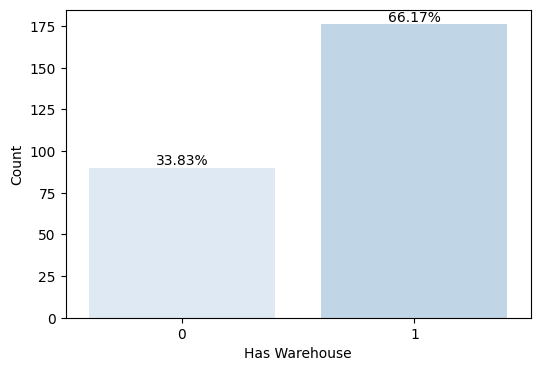

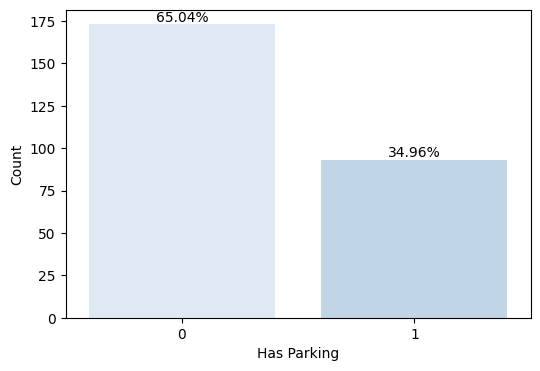

In [312]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a color palette with distinct colors (Set2 palette)
color_palette = sns.color_palette("Blues")

# Create countplots for each binary column
for column in binary_df.columns:
    plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
    
    ax = sns.countplot(data=binary_df, x=column, palette=color_palette)
    
    # Calculate and add percentages to the bars
    total = float(len(binary_df))
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height/total:.2%}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom')
    
    # Set labels and title
    ax.set_xlabel(column)
    ax.set_ylabel("Count")
    #plt.title(f'Countplot with Percentages of {column}')
    
    plt.show()



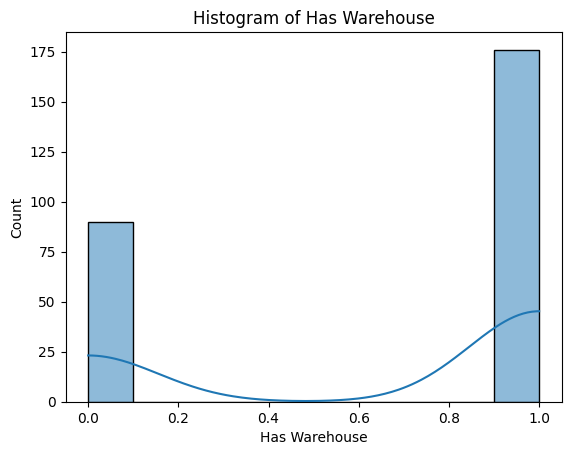

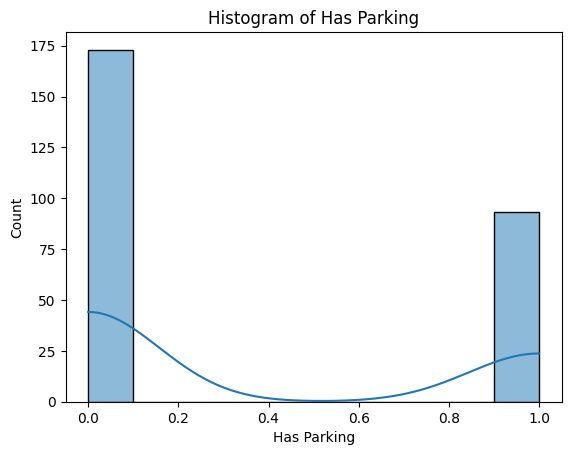

In [79]:
for column in binary_df.columns:
    sns.histplot(data=binary_df, x=column, kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

# Prepare data

Performing a regression analysis on a dataset like `model_df` involves several steps, and the approach you take depends on the types of variables (continuous, discrete, categorical) and the specific goals of your analysis. Here are the general steps for conducting a regression analysis, considering the classification of variables:

**Step 1: Data Preparation**
- Clean the data by handling missing values and outliers.
- Encode categorical variables if necessary (e.g., one-hot encoding or label encoding).
- Standardize or normalize continuous variables if required.

**Step 2: Define the Dependent and Independent Variables**
- Identify the dependent variable (the one you want to predict) and the independent variables (predictors or features).

**Step 3: Select the Appropriate Regression Model**
- Choose the most suitable regression model based on the nature of the dependent and independent variables.
  - Linear Regression: for predicting a continuous dependent variable.
  - Logistic Regression: for predicting binary outcomes (if you have binary dependent variables).
  - Multinomial or Ordinal Regression: for predicting categorical outcomes with more than two categories.
  - Poisson Regression: for count data.
  - Other specialized regression models as needed.

**Step 4: Split the Data**
- Split the dataset into a training set and a testing set to evaluate the model's performance.

**Step 5: Model Training**
- Train the chosen regression model using the training data.
- Use appropriate techniques for handling categorical variables (e.g., dummy variables for linear regression or specialized encodings for other models).
- Choose an appropriate method for handling multicollinearity among predictor variables.

**Step 6: Model Evaluation**
- Evaluate the model's performance using appropriate metrics (e.g., Mean Absolute Error, Mean Squared Error, R-squared for linear regression, or others depending on the regression type).
- Assess the assumptions of the regression model, such as linearity, homoscedasticity, and normality of residuals.
- Consider techniques like cross-validation to assess model robustness.

**Step 7: Interpretation**
- Interpret the coefficients or parameters of the regression model.
- Analyze the significance of predictors and their impact on the dependent variable.
- Identify any interactions or nonlinear relationships if applicable.

**Step 8: Predictions**
- Use the trained model to make predictions on new or test data.
- Assess the model's predictive accuracy and generalization to unseen data.

**Step 9: Communicate Results**
- Present your findings, including regression coefficients, statistical significance, and model performance, in a clear and understandable manner.

**Step 10: Further Analysis**
- Depending on the analysis goals, you may need to perform additional tests or analyses, such as hypothesis testing, sensitivity analysis, or model validation.

It's essential to adapt these steps based on the nature of your dataset and the specific regression analysis you are performing. Be mindful of the assumptions and requirements of the chosen regression model and make any necessary adjustments to meet those requirements. Additionally, consider consulting with a statistician or data scientist for more complex analyses or when dealing with specialized regression models.

## Process with outliers

In [313]:
import pandas as pd
import numpy as np
from scipy import stats

# Set your threshold for identifying outliers
threshold = 3  # Adjust the threshold as needed

# Create a DataFrame to store the outlier information for each column
outlier_df = pd.DataFrame(index=numeric_fs_df.index)

# Create dictionaries to store outlier counts and percentages
outliers_count = {'Column Name': [], 'Z-Score Outliers': [], 'IQR Outliers': []}
outliers_percentage = {'Column Name': [], 'Z-Score Outliers Percentage': [], 'IQR Outliers Percentage': []}

# Loop through each column in numeric_fs_df
for column_name in numeric_fs_df.columns:
    # Calculate z-scores for the current column
    z_scores = stats.zscore(numeric_fs_df[column_name])
    
    # Identify outliers based on the threshold (Z-Score method)
    is_outlier_zscore = np.logical_xor(np.abs(z_scores) > threshold, False)
    
    # Calculate the IQR for the current column
    Q1 = numeric_fs_df[column_name].quantile(0.25)
    Q3 = numeric_fs_df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers using IQR method
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    is_outlier_iqr = (numeric_fs_df[column_name] < lower_bound) | (numeric_fs_df[column_name] > upper_bound)
    
    # Store the outlier information in the outlier_df DataFrame
    outlier_df[column_name + ' (Z-Score)'] = is_outlier_zscore
    outlier_df[column_name + ' (IQR)'] = is_outlier_iqr

    # Count and calculate the percentage of outliers for each method
    count_zscore = is_outlier_zscore.sum()
    count_iqr = is_outlier_iqr.sum()
    total_rows = len(numeric_fs_df)
    percentage_zscore = (count_zscore / total_rows) * 100
    percentage_iqr = (count_iqr / total_rows) * 100

    # Append the results to the dictionaries
    outliers_count['Column Name'].append(column_name)
    outliers_count['Z-Score Outliers'].append(count_zscore)
    outliers_count['IQR Outliers'].append(count_iqr)
    outliers_percentage['Column Name'].append(column_name)
    outliers_percentage['Z-Score Outliers Percentage'].append(percentage_zscore)
    outliers_percentage['IQR Outliers Percentage'].append(percentage_iqr)

# Create DataFrames for the counts and percentages
outliers_count_df = pd.DataFrame(outliers_count)
outliers_percentage_df = pd.DataFrame(outliers_percentage)

# Display the number of outliers and percentage per column and method
print("Number of outliers per column and method:")
print(outliers_count_df)
print("\nPercentage of outliers per column and method:")
print(outliers_percentage_df)




Number of outliers per column and method:
                  Column Name  Z-Score Outliers  IQR Outliers
0              Hours Open (h)                 0            19
1             Total Employees                 3            20
2             Total Area (m²)                 6            23
3         Warehouse Area (m²)                 2            11
4       Parking Minutes (min)                 3            13
5   Weekly Trips (trips/week)                 5            16
6  Weekly Kilograms (kg/week)                 5            24

Percentage of outliers per column and method:
                  Column Name  Z-Score Outliers Percentage  \
0              Hours Open (h)                     0.000000   
1             Total Employees                     1.127820   
2             Total Area (m²)                     2.255639   
3         Warehouse Area (m²)                     0.751880   
4       Parking Minutes (min)                     1.127820   
5   Weekly Trips (trips/week)              

* **Data base to modelling:** replacing values of the outliers by IQR with trimming and winsorization

In [314]:
import pandas as pd
import numpy as np


# Define the lower and upper percentile thresholds for Windsorization
lower_percentile = 0.05  # 5th percentile
upper_percentile = 0.95  # 95th percentile

# Create a new DataFrame to store the results
numeric_fs_windsorized_df = pd.DataFrame()

# Iterate through each column of numeric_fs_df
for column_name in numeric_fs_df.columns:
    column_data = numeric_fs_df[column_name]
    
    # Calculate the lower and upper bounds using the IQR method
    q1 = column_data.quantile(lower_percentile)
    q3 = column_data.quantile(upper_percentile)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Apply Windsorization to replace outliers with the nearest bound
    column_data = np.where(column_data < lower_bound, lower_bound, column_data)
    column_data = np.where(column_data > upper_bound, upper_bound, column_data)
    
    # Add the processed column data to the new DataFrame
    numeric_fs_windsorized_df[column_name] = column_data

# Print the resulting DataFrame with Windsorized values
print(numeric_fs_windsorized_df)

# Assuming you have numeric_fs_windsorized_df DataFrame

# Move the 'Weekly Trips (trips/week)' column to the first position
columns = ['Weekly Trips (trips/week)'] + [col for col in numeric_fs_windsorized_df if col != 'Weekly Trips (trips/week)']
numeric_fs_windsorized_df = numeric_fs_windsorized_df[columns]

# Display the modified DataFrame
print(numeric_fs_windsorized_df)



     Hours Open (h)  Total Employees  Total Area (m²)  Warehouse Area (m²)  \
0              14.0              1.0            100.0              100.000   
1              18.0              2.0            170.0              170.000   
2              15.0              5.0            300.0              271.875   
3              12.0              4.5             40.0                5.000   
4              10.0              7.0            220.0              220.000   
..              ...              ...              ...                  ...   
261             8.0              3.0             70.0               70.000   
262             8.0              1.5             12.0                4.000   
263            11.0              2.0             10.0                0.000   
264            10.0              1.0             60.0               15.000   
265            12.0              3.0              9.0                0.000   

     Parking Minutes (min)  Weekly Trips (trips/week)  \
0     

* numeric_fs_windsorized_df

* Descriptive statistics without outliers

In [226]:
numeric_fs_windsorized_df.columns

Index(['Hours Open (h)', 'Total Employees', 'Total Area (m²)',
       'Warehouse Area (m²)', 'Parking Minutes (min)',
       'Weekly Trips (trips/week)', 'Weekly Kilograms (kg/week)'],
      dtype='object')

In [315]:
# Move 'Weekly Trips (trips/week)' to the first column
column_order = ['Weekly Trips (trips/week)'] + [col for col in numeric_fs_windsorized_df.columns if col != 'Weekly Trips (trips/week)']
numeric_fs_windsorized_df = numeric_fs_windsorized_df[column_order]

In [316]:
numeric_fs_windsorized_df.describe()

Weekly Trips (trips/week)  Hours Open (h)  Total Employees  \
count                 266.000000      266.000000       266.000000   
mean                    6.589991       12.387218         3.511278   
std                     5.916411        4.325055         3.102930   
min                     0.250000        4.000000         1.000000   
25%                     3.000000       10.000000         2.000000   
50%                     5.000000       12.000000         3.000000   
75%                     8.750000       14.000000         4.000000   
max                    46.937500       24.000000        21.000000   

       Total Area (m²)  Warehouse Area (m²)  Parking Minutes (min)  \
count       266.000000           266.000000             266.000000   
mean         75.080827            31.692669              11.506690   
std          99.843016            44.458000               6.544088   
min           4.000000             0.000000               1.000000   
25%          25.000000             0.000000               7.500000   
50%          45.000000            16.000000              10.000000   
75%          80.000000            48.000000              15.000000   
max         666.250000           271.875000              36.666667   

       Weekly Kilograms (kg/week)  
count                  266.000000  
mean                   562.387039  
std                   1016.709678  
min                      1.100000  
25%                    117.750000  
50%                    255.895000  
75%                    532.687500  
max                   6044.546875

In [317]:
import pandas as pd

# Assuming you have numeric_fs_windsorized_df already defined

# Set the desired format with a comma as the decimal separator
pd.options.display.float_format = '{:,.2f}'.format

# Generate and display the summary statistics table
summary_table = numeric_fs_windsorized_df.describe()
print(summary_table)

# Reset the formatting to the default
pd.options.display.float_format = None  # To reset to the default formatting


       Weekly Trips (trips/week)  Hours Open (h)  Total Employees  \
count                     266.00          266.00           266.00   
mean                        6.59           12.39             3.51   
std                         5.92            4.33             3.10   
min                         0.25            4.00             1.00   
25%                         3.00           10.00             2.00   
50%                         5.00           12.00             3.00   
75%                         8.75           14.00             4.00   
max                        46.94           24.00            21.00   

       Total Area (m²)  Warehouse Area (m²)  Parking Minutes (min)  \
count           266.00               266.00                 266.00   
mean             75.08                31.69                  11.51   
std              99.84                44.46                   6.54   
min               4.00                 0.00                   1.00   
25%              25.00      

* correlation matrix

Correlation Matrix:
                            Weekly Trips (trips/week)  Hours Open (h)  \
Weekly Trips (trips/week)                    1.000000        0.092664   
Hours Open (h)                               0.092664        1.000000   
Total Employees                              0.130336        0.265392   
Total Area (m²)                              0.097478        0.301638   
Warehouse Area (m²)                          0.087678        0.005505   
Parking Minutes (min)                       -0.146050        0.120719   
Weekly Kilograms (kg/week)                   0.067291        0.078507   

                            Total Employees  Total Area (m²)  \
Weekly Trips (trips/week)          0.130336         0.097478   
Hours Open (h)                     0.265392         0.301638   
Total Employees                    1.000000         0.519732   
Total Area (m²)                    0.519732         1.000000   
Warehouse Area (m²)                0.108610         0.196591   
Parking Min

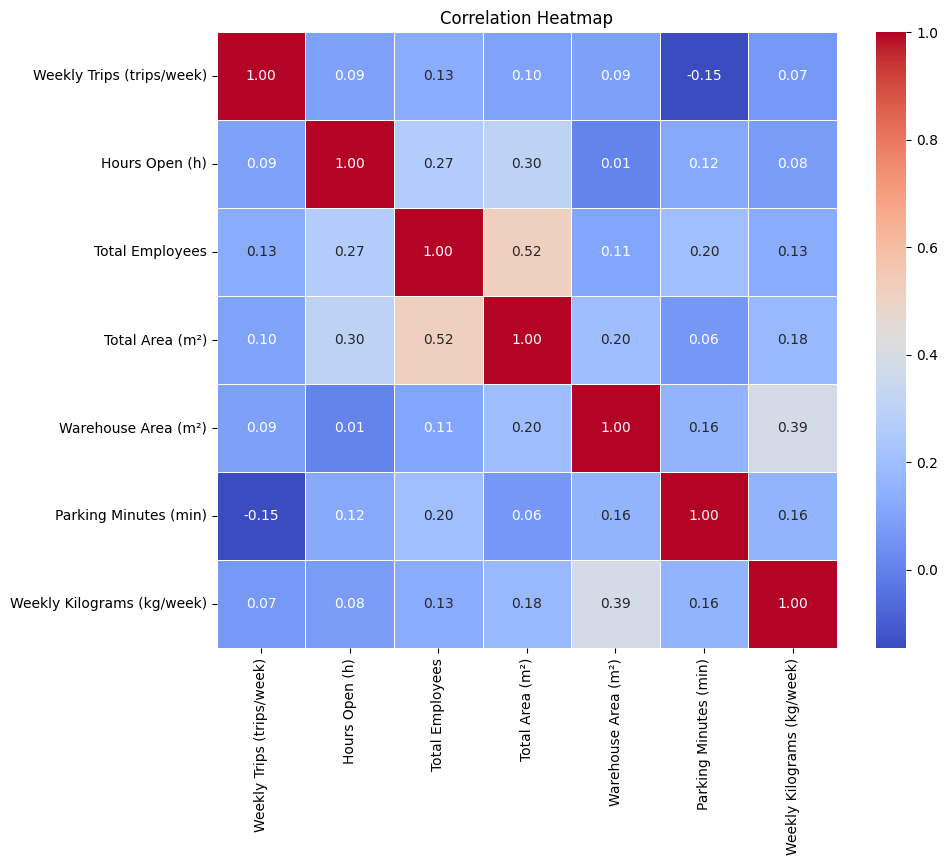

In [318]:
import pandas as pd

# Calculate the correlation matrix
correlation_matrix = numeric_fs_windsorized_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


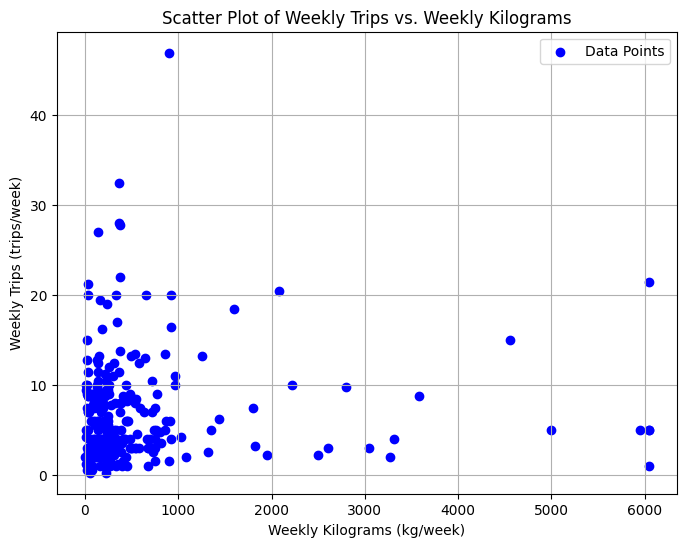

In [323]:
import matplotlib.pyplot as plt

# Extract the variables from numeric_fs_windsorized_df (replace column names as needed)
weekly_trips = numeric_fs_windsorized_df['Weekly Trips (trips/week)']
weekly_kilograms = numeric_fs_windsorized_df['Weekly Kilograms (kg/week)']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(weekly_kilograms,weekly_trips, c='blue', marker='o', label='Data Points')

# Set axis labels and a title
plt.xlabel('Weekly Kilograms (kg/week)')
plt.ylabel('Weekly Trips (trips/week)')
plt.title('Scatter Plot of Weekly Trips vs. Weekly Kilograms')

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


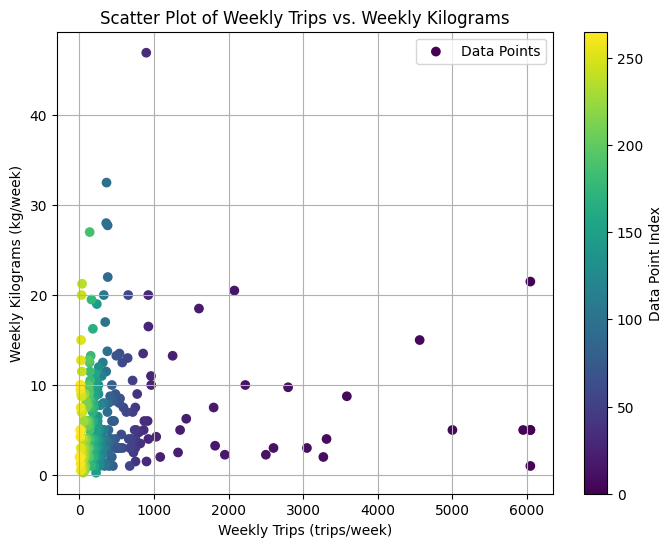

In [324]:
# Define a colormap for distinct colors
colors = np.arange(len(weekly_trips))

# Create a scatter plot with different colors for each data point
plt.figure(figsize=(8, 6))
plt.scatter(weekly_kilograms,
    weekly_trips
    ,
    c=colors,  # Use the colors variable to assign colors
    cmap='viridis',  # You can choose any colormap you like
    marker='o',
    label='Data Points'
)

# Set axis labels and a title
plt.xlabel('Weekly Trips (trips/week)')
plt.ylabel('Weekly Kilograms (kg/week)')
plt.title('Scatter Plot of Weekly Trips vs. Weekly Kilograms')

# Add a colorbar to show the mapping of colors to values
cbar = plt.colorbar()
cbar.set_label('Data Point Index')

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

In [108]:
numeric_fs_windsorized_df.columns

Index(['Hours Open (h)', 'Total Employees', 'Total Area (m²)',
       'Warehouse Area (m²)', 'Parking Minutes (min)',
       'Weekly Trips (trips/week)', 'Weekly Kilograms (kg/week)'],
      dtype='object')

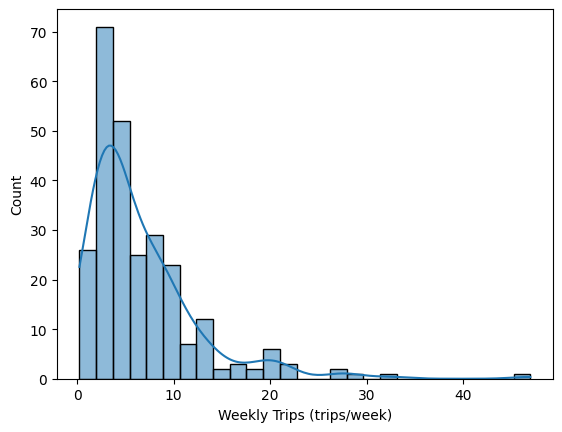

In [325]:
sns.histplot(data=numeric_fs_windsorized_df, x='Weekly Trips (trips/week)', kde=True)
plt.show()

* Raincloud plot

In [ ]:
import seaborn as sns
import ptitprince as pt

# Sample data
data = sns.load_dataset("iris")

# Create a raincloud plot
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
f, ax = plt.subplots(figsize=(7, 5))

# Plot the raincloud
ax = pt.RainCloud(x="species", y="sepal_length", data=data, ax=ax)

# Customize labels and title
ax.set_xlabel("Species")
ax.set_ylabel("Sepal Length")
ax.set_title("Raincloud Plot of Sepal Length by Species")

# Show the plot
plt.show()


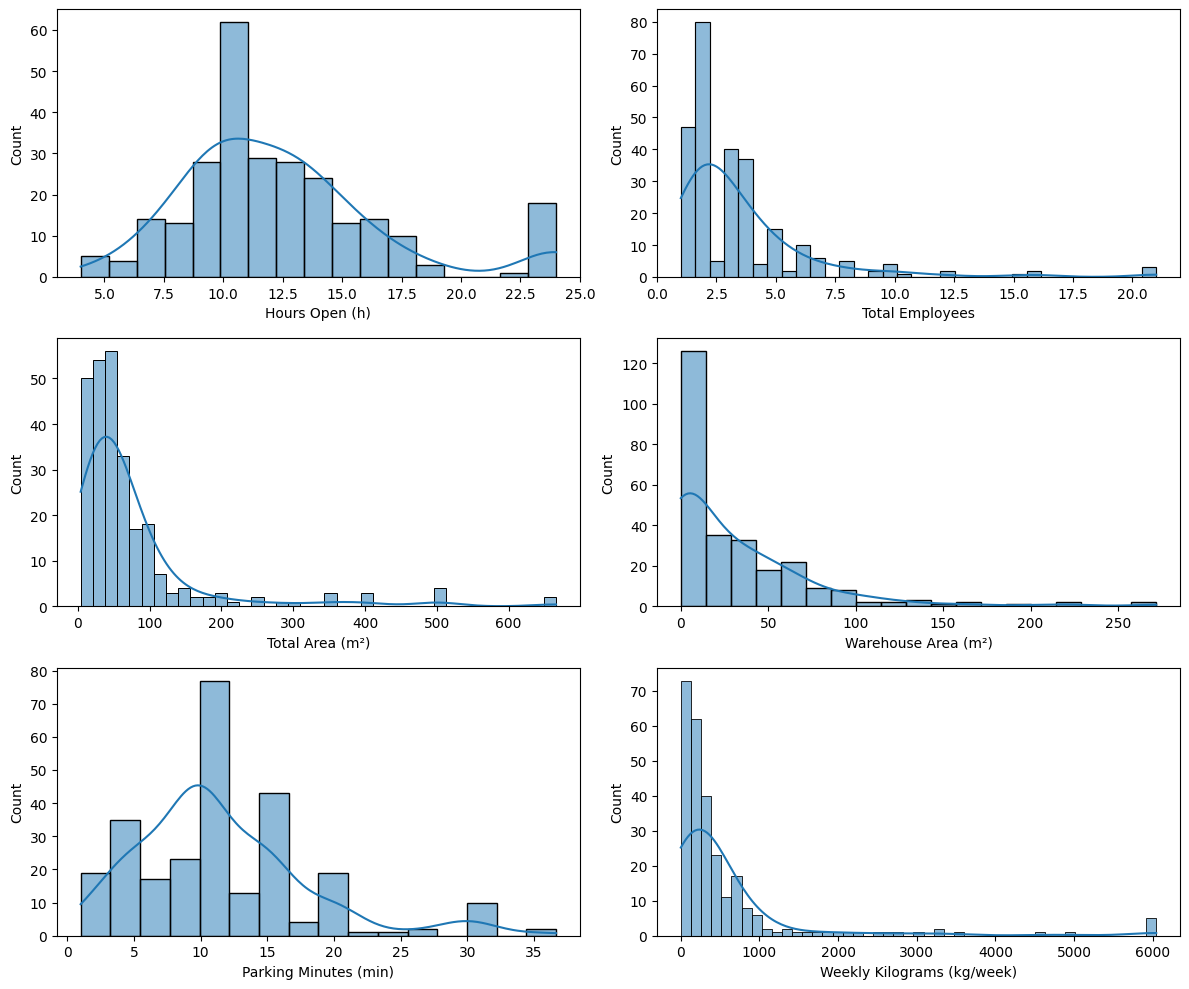

In [26]:

# Create subplots for each variable (excluding 'Weekly Trips') in a 3x2 grid
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# Flatten the axes array to access individual subplots
axes = axes.flatten()

# Create a list to store the columns to be plotted
columns_to_plot = [col for col in numeric_fs_windsorized_df.columns if col != 'Weekly Trips (trips/week)']

for i, column_name in enumerate(columns_to_plot):
    sns.histplot(data=numeric_fs_windsorized_df, x=column_name, kde=True, ax=axes[i])
    

# Adjust subplot layout
plt.tight_layout()

# Show the subplots
plt.show()

In [16]:
# Export the DataFrames to CSV files
outliers_count_df.to_csv('outliers_count.csv', index=False)
outliers_percentage_df.to_csv('outliers_percentage.csv', index=False)

# Modeling

In [45]:
numeric_fs_windsorized_df.columns

Index(['Hours Open (h)', 'Total Employees', 'Total Area (m²)',
       'Warehouse Area (m²)', 'Parking Minutes (min)',
       'Weekly Trips (trips/week)', 'Weekly Kilograms (kg/week)'],
      dtype='object')

In [326]:
numeric_fs_windsorized_df

Weekly Trips (trips/week)  Hours Open (h)  Total Employees  \
0                         5.00            14.0              1.0   
1                         5.00            18.0              2.0   
2                        21.50            15.0              5.0   
3                         1.00            12.0              4.5   
4                         5.00            10.0              7.0   
..                         ...             ...              ...   
261                       4.25             8.0              3.0   
262                       2.00             8.0              1.5   
263                      10.00            11.0              2.0   
264                       5.00            10.0              1.0   
265                       2.00            12.0              3.0   

     Total Area (m²)  Warehouse Area (m²)  Parking Minutes (min)  \
0              100.0              100.000              15.000000   
1              170.0              170.000               5.000000   
2              300.0              271.875              10.000000   
3               40.0                5.000               7.500000   
4              220.0              220.000              30.000000   
..               ...                  ...                    ...   
261             70.0               70.000               2.000000   
262             12.0                4.000              10.000000   
263             10.0                0.000               6.666667   
264             60.0               15.000               6.833333   
265              9.0                0.000               3.000000   

     Weekly Kilograms (kg/week)  
0                   6044.546875  
1                   6044.546875  
2                   6044.546875  
3                   6044.546875  
4                   5948.000000  
..                          ...  
261                   12.500000  
262                   12.000000  
263                   10.750000  
264                    9.500000  
265                    1.100000  

[266 rows x 7 columns]

## Models Lin-Lin

* Model total employees (lin-lin)

                                    OLS Regression Results                                    
Dep. Variable:     Weekly Trips (trips/week)   R-squared (uncentered):                   0.380
Model:                                   OLS   Adj. R-squared (uncentered):              0.377
Method:                        Least Squares   F-statistic:                              162.1
Date:                       Thu, 05 Oct 2023   Prob (F-statistic):                    2.71e-29
Time:                               21:34:49   Log-Likelihood:                         -893.91
No. Observations:                        266   AIC:                                      1790.
Df Residuals:                            265   BIC:                                      1793.
Df Model:                                  1                                                  
Covariance Type:                   nonrobust                                                  
                      coef    std err          t  

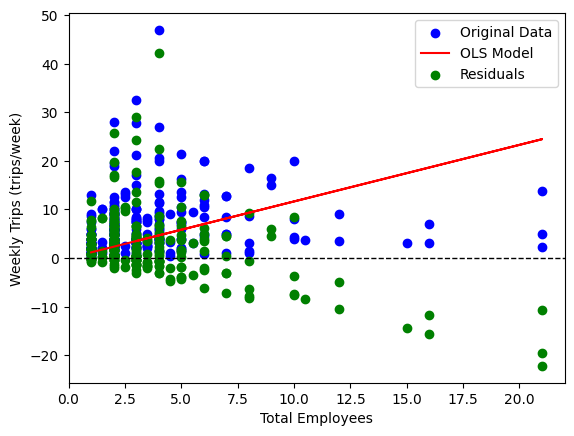

In [118]:
# Define your dependent variable (target) and independent variables (features)
y = numeric_fs_windsorized_df['Weekly Trips (trips/week)']
X = numeric_fs_windsorized_df[['Total Employees']]

# Add a constant term (intercept) to the independent variables
#X = sm.add_constant(X)

# Fit the OLS model
model_1 = sm.OLS(y, X).fit()
print(model_1.summary())
# Make predictions
y_pred = model_1.predict(X)

# Calculate the residuals
residuals = y - y_pred

# Calculate mean squared error (MSE)
mse = np.mean(residuals**2)

# Calculate RMSE
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Create a scatter plot of the original values
plt.scatter(X['Total Employees'], y, label='Original Data', color='blue')  # Change the variable here

# Create a line plot for the predicted values (model)
plt.plot(X['Total Employees'], y_pred, label='OLS Model', color='red')  # Change the variable here

# Create a scatter plot of the residuals
plt.scatter(X['Total Employees'], residuals, label='Residuals', color='green')  # Change the variable here

# Add a horizontal line at y=0 to indicate the zero residual line
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Add legends
plt.legend()

# Set plot labels
plt.xlabel('Total Employees')  # Change the variable here
plt.ylabel('Weekly Trips (trips/week)')

# Set plot title
#plt.title('Original Data, OLS Model, and Residuals')

# Show the plot
plt.show()

In [51]:
numeric_fs_windsorized_df.columns

Index(['Hours Open (h)', 'Total Employees', 'Total Area (m²)',
       'Warehouse Area (m²)', 'Parking Minutes (min)',
       'Weekly Trips (trips/week)', 'Weekly Kilograms (kg/week)'],
      dtype='object')

* Model total are (lin-Lin)

In [59]:
# Define your dependent variable (target) and independent variables (features)
y = numeric_fs_windsorized_df['Weekly Trips (trips/week)']
X = numeric_fs_windsorized_df[['Total Area (m²)']]

# Add a constant term (intercept) to the independent variables
#X = sm.add_constant(X)

# Fit the OLS model
model_2 = sm.OLS(y, X).fit()
print(model_2.summary())

# Make predictions
y_pred = model_2.predict(X)

# Calculate the residuals
residuals = y - y_pred

# Calculate mean squared error (MSE)
mse = np.mean(residuals**2)

# Calculate RMSE
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

                                    OLS Regression Results                                    
Dep. Variable:     Weekly Trips (trips/week)   R-squared (uncentered):                   0.250
Model:                                   OLS   Adj. R-squared (uncentered):              0.247
Method:                        Least Squares   F-statistic:                              88.38
Date:                       Thu, 05 Oct 2023   Prob (F-statistic):                    2.66e-18
Time:                               11:17:19   Log-Likelihood:                         -919.11
No. Observations:                        266   AIC:                                      1840.
Df Residuals:                            265   BIC:                                      1844.
Df Model:                                  1                                                  
Covariance Type:                   nonrobust                                                  
                      coef    std err          t  

* Model kilograms

In [62]:
#Using Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Define your dependent variable (target) and independent variables (features)
y = numeric_fs_windsorized_df['Weekly Trips (trips/week)']
X = numeric_fs_windsorized_df[['Weekly Kilograms (kg/week)']]

# Create and fit the OLS model
model = LinearRegression()
model.fit(X, y)
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)



# Make predictions
y_pred = model.predict(X)

# Calculate the residuals
residuals = y - y_pred

# Calculate mean squared error (MSE)
mse = mean_squared_error(y, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Intercept: 6.369770623662069
Coefficients: [0.00039158]
Root Mean Squared Error (RMSE): 5.89


In [67]:
# Define your dependent variable (target) and independent variables (features)
y = numeric_fs_windsorized_df['Weekly Trips (trips/week)']
X = numeric_fs_windsorized_df[['Weekly Kilograms (kg/week)']]

# Add a constant term (intercept) to the independent variables
#X = sm.add_constant(X)

# Fit the OLS model
model_3 = sm.OLS(y, X).fit()

print(model_3.summary())
# Make predictions
y_pred = model_3.predict(X)

# Calculate the residuals
residuals = y - y_pred

# Calculate mean squared error (MSE)
mse = np.mean(residuals**2)

# Calculate RMSE
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

                                    OLS Regression Results                                    
Dep. Variable:     Weekly Trips (trips/week)   R-squared (uncentered):                   0.160
Model:                                   OLS   Adj. R-squared (uncentered):              0.157
Method:                        Least Squares   F-statistic:                              50.56
Date:                       Thu, 05 Oct 2023   Prob (F-statistic):                    1.07e-11
Time:                               13:36:33   Log-Likelihood:                         -934.17
No. Observations:                        266   AIC:                                      1870.
Df Residuals:                            265   BIC:                                      1874.
Df Model:                                  1                                                  
Covariance Type:                   nonrobust                                                  
                                 coef    std err  

In [65]:
numeric_fs_windsorized_df.columns

Index(['Hours Open (h)', 'Total Employees', 'Total Area (m²)',
       'Warehouse Area (m²)', 'Parking Minutes (min)',
       'Weekly Trips (trips/week)', 'Weekly Kilograms (kg/week)'],
      dtype='object')

* Model warehouse

                                OLS Regression Results                               
Dep. Variable:     Weekly Trips (trips/week)   R-squared:                       0.008
Model:                                   OLS   Adj. R-squared:                  0.004
Method:                        Least Squares   F-statistic:                     2.045
Date:                       Thu, 05 Oct 2023   Prob (F-statistic):              0.154
Time:                               14:11:50   Log-Likelihood:                -848.79
No. Observations:                        266   AIC:                             1702.
Df Residuals:                            264   BIC:                             1709.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

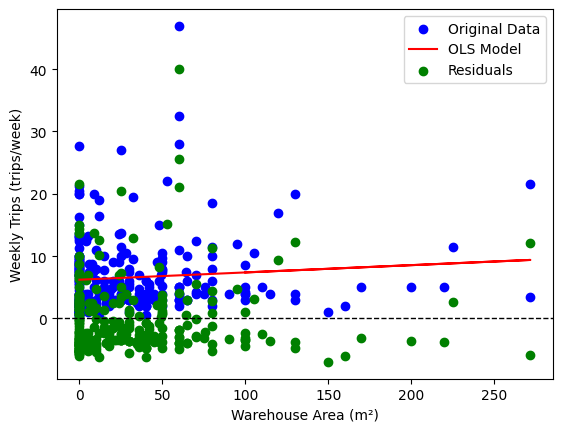

In [78]:
import matplotlib.pyplot as plt  # Import the matplotlib.pyplot module

# Define your dependent variable (target) and independent variables (features)
y = numeric_fs_windsorized_df['Weekly Trips (trips/week)']
X = numeric_fs_windsorized_df[['Warehouse Area (m²)']]

# Add a constant term (intercept) to the independent variables
X = sm.add_constant(X)

# Fit the OLS model
model_4 = sm.OLS(y, X).fit()

print(model_4.summary())

# Make predictions
y_pred = model_4.predict(X)

# Calculate the residuals
residuals = y - y_pred

# Calculate mean squared error (MSE)
mse = np.mean(residuals**2)

# Calculate RMSE
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Create a scatter plot of the original values
plt.scatter(X['Warehouse Area (m²)'], y, label='Original Data', color='blue')

# Create a line plot for the predicted values (model)
plt.plot(X['Warehouse Area (m²)'], y_pred, label='OLS Model', color='red')

# Create a scatter plot of the residuals
plt.scatter(X['Warehouse Area (m²)'], residuals, label='Residuals', color='green')
# Add a horizontal line at y=0 to indicate the zero residual line
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Add legends
plt.legend()

# Set plot labels
plt.xlabel('Warehouse Area (m²)')
plt.ylabel('Weekly Trips (trips/week)')

# Set plot title
#plt.title('Original Data, OLS Model, and Residuals')
# Show the plot
plt.show()




* Model parking minutes

In [79]:
numeric_fs_windsorized_df.columns

Index(['Hours Open (h)', 'Total Employees', 'Total Area (m²)',
       'Warehouse Area (m²)', 'Parking Minutes (min)',
       'Weekly Trips (trips/week)', 'Weekly Kilograms (kg/week)'],
      dtype='object')

                                OLS Regression Results                               
Dep. Variable:     Weekly Trips (trips/week)   R-squared:                       0.021
Model:                                   OLS   Adj. R-squared:                  0.018
Method:                        Least Squares   F-statistic:                     5.754
Date:                       Thu, 05 Oct 2023   Prob (F-statistic):             0.0171
Time:                               14:17:30   Log-Likelihood:                -846.95
No. Observations:                        266   AIC:                             1698.
Df Residuals:                            264   BIC:                             1705.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

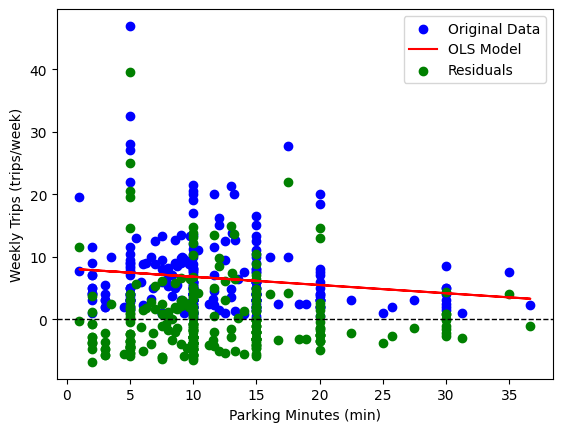

In [80]:
import matplotlib.pyplot as plt  # Import the matplotlib.pyplot module

# Define your dependent variable (target) and independent variables (features)
y = numeric_fs_windsorized_df['Weekly Trips (trips/week)']
X = numeric_fs_windsorized_df[['Parking Minutes (min)']]  # Change the variable here

# Add a constant term (intercept) to the independent variables
X = sm.add_constant(X)

# Fit the OLS model
model_5 = sm.OLS(y, X).fit()

print(model_5.summary())

# Make predictions
y_pred = model_5.predict(X)

# Calculate the residuals
residuals = y - y_pred

# Calculate mean squared error (MSE)
mse = np.mean(residuals**2)

# Calculate RMSE
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Create a scatter plot of the original values
plt.scatter(X['Parking Minutes (min)'], y, label='Original Data', color='blue')  # Change the variable here

# Create a line plot for the predicted values (model)
plt.plot(X['Parking Minutes (min)'], y_pred, label='OLS Model', color='red')  # Change the variable here

# Create a scatter plot of the residuals
plt.scatter(X['Parking Minutes (min)'], residuals, label='Residuals', color='green')  # Change the variable here

# Add a horizontal line at y=0 to indicate the zero residual line
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Add legends
plt.legend()

# Set plot labels
plt.xlabel('Parking Minutes (min)')  # Change the variable here
plt.ylabel('Weekly Trips (trips/week)')

# Set plot title
#plt.title('Original Data, OLS Model, and Residuals')

# Show the plot
plt.show()


* Model hours open

In [70]:
numeric_fs_windsorized_df.columns

Index(['Hours Open (h)', 'Total Employees', 'Total Area (m²)',
       'Warehouse Area (m²)', 'Parking Minutes (min)',
       'Weekly Trips (trips/week)', 'Weekly Kilograms (kg/week)'],
      dtype='object')

                                    OLS Regression Results                                    
Dep. Variable:     Weekly Trips (trips/week)   R-squared (uncentered):                   0.524
Model:                                   OLS   Adj. R-squared (uncentered):              0.522
Method:                        Least Squares   F-statistic:                              291.3
Date:                       Thu, 05 Oct 2023   Prob (F-statistic):                    1.44e-44
Time:                               14:28:08   Log-Likelihood:                         -858.77
No. Observations:                        266   AIC:                                      1720.
Df Residuals:                            265   BIC:                                      1723.
Df Model:                                  1                                                  
Covariance Type:                   nonrobust                                                  
                     coef    std err          t   

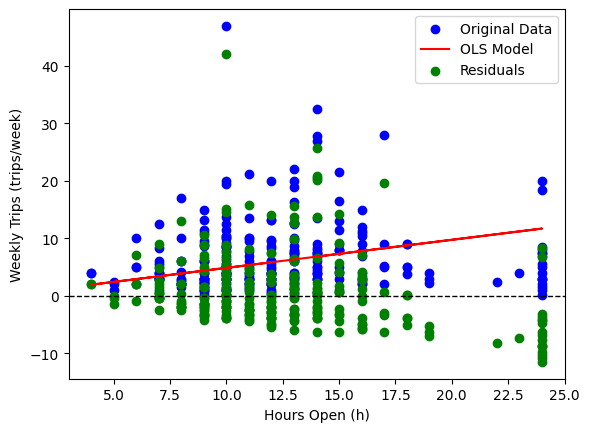

In [83]:
import matplotlib.pyplot as plt  # Import the matplotlib.pyplot module

# Define your dependent variable (target) and independent variables (features)
y = numeric_fs_windsorized_df['Weekly Trips (trips/week)']
X = numeric_fs_windsorized_df[['Hours Open (h)']]  # Change the variable here

# Add a constant term (intercept) to the independent variables
#X = sm.add_constant(X)

# Fit the OLS model
model_6 = sm.OLS(y, X).fit()

print(model_6.summary())

# Make predictions
y_pred = model_6.predict(X)

# Calculate the residuals
residuals = y - y_pred

# Calculate mean squared error (MSE)
mse = np.mean(residuals**2)

# Calculate RMSE
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Create a scatter plot of the original values
plt.scatter(X['Hours Open (h)'], y, label='Original Data', color='blue')  # Change the variable here

# Create a line plot for the predicted values (model)
plt.plot(X['Hours Open (h)'], y_pred, label='OLS Model', color='red')  # Change the variable here

# Create a scatter plot of the residuals
plt.scatter(X['Hours Open (h)'], residuals, label='Residuals', color='green')  # Change the variable here

# Add a horizontal line at y=0 to indicate the zero residual line
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Add legends
plt.legend()

# Set plot labels
plt.xlabel('Hours Open (h)')  # Change the variable here
plt.ylabel('Weekly Trips (trips/week)')

# Set plot title
#plt.title('Original Data, OLS Model, and Residuals')

# Show the plot
plt.show()


### Lin-Lin Employees based


In [327]:
numeric_fs_windsorized_df.columns

Index(['Weekly Trips (trips/week)', 'Hours Open (h)', 'Total Employees',
       'Total Area (m²)', 'Warehouse Area (m²)', 'Parking Minutes (min)',
       'Weekly Kilograms (kg/week)'],
      dtype='object')

* Made by combinatory

In [328]:
#with RMSE
import statsmodels.api as sm
import itertools
import numpy as np
import pandas as pd

# Define your dependent variable (target)
y = numeric_fs_windsorized_df['Weekly Trips (trips/week)']

# Define the list of independent variables
independent_variables = [
    'Hours Open (h)',
    'Total Employees',
    'Warehouse Area (m²)',
    'Parking Minutes (min)',
    'Weekly Kilograms (kg/week)'
]

# Create a list to store RMSE and model summaries
model_info_lin_lin_employee = []

# Generate models for all possible combinations of independent variables
for i in range(1, len(independent_variables) + 1):
    # Generate all combinations of independent variables
    combinations = itertools.combinations(independent_variables, i)
    
    for combo in combinations:
        # Select the subset of independent variables
        X = numeric_fs_windsorized_df[list(combo)]
        
        # Check if 'Hours Open (h)' and 'Total Employees' are in the model
        if 'Hours Open (h)' not in combo and 'Total Employees' not in combo:
            # Add a constant term (intercept) to the independent variables
            X = sm.add_constant(X)
        
        # Fit the OLS model
        model = sm.OLS(y, X).fit()
        
        # Check if all t-values are greater than 1.96 in absolute value
        if all(abs(model.tvalues) > 1.96):
            # Calculate RMSE
            predicted_values = model.predict(X)
            rmse = np.sqrt(np.mean((y - predicted_values) ** 2))
            
            # Append RMSE and model summary to the list
            model_info_lin_lin_employee.append((combo, rmse, model.summary(),model.fvalue))
        
# Sort the models by F-statistics in descending order
model_info_lin_lin_employee.sort(key=lambda x: x[3], reverse=True)

# Print the summaries for selected models
for combo, rmse, summary, f_value in model_info_lin_lin_employee:
    print(f"Independent Variables: {combo}")
    print(f"RMSE: {rmse}")
    print(f"F-statistics: {f_value}")
    print(summary)
    print("-" * 80)


Independent Variables: ('Hours Open (h)',)
RMSE: 6.10752205963949
F-statistics: 291.2617436339868
                                    OLS Regression Results                                    
Dep. Variable:     Weekly Trips (trips/week)   R-squared (uncentered):                   0.524
Model:                                   OLS   Adj. R-squared (uncentered):              0.522
Method:                        Least Squares   F-statistic:                              291.3
Date:                       Sat, 07 Oct 2023   Prob (F-statistic):                    1.44e-44
Time:                               15:48:53   Log-Likelihood:                         -858.77
No. Observations:                        266   AIC:                                      1720.
Df Residuals:                            265   BIC:                                      1723.
Df Model:                                  1                                                  
Covariance Type:                   nonrobust   

                                OLS Regression Results                               
Dep. Variable:     Weekly Trips (trips/week)   R-squared:                       0.021
Model:                                   OLS   Adj. R-squared:                  0.013
Method:                        Least Squares   F-statistic:                     2.768
Date:                       Thu, 05 Oct 2023   Prob (F-statistic):             0.0646
Time:                               15:56:12   Log-Likelihood:                -847.04
No. Observations:                        266   AIC:                             1700.
Df Residuals:                            263   BIC:                             1711.
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

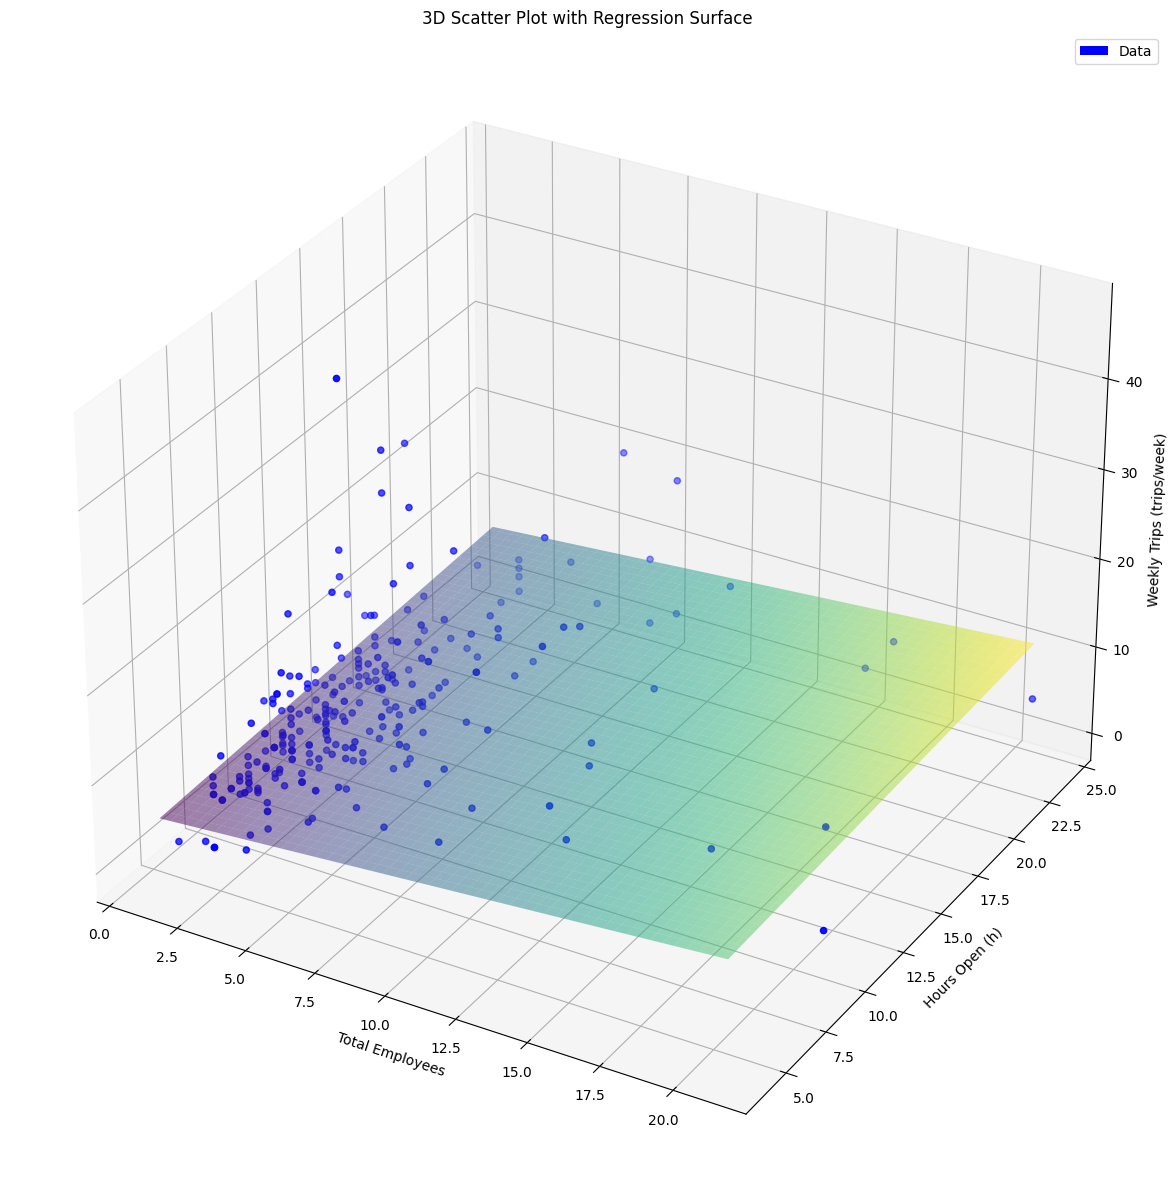

In [95]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Define your dependent variable (target) and independent variables (features)
y = numeric_fs_windsorized_df['Weekly Trips (trips/week)']
X = numeric_fs_windsorized_df[['Total Employees', 'Hours Open (h)']]  # Change the variables here

# Fit the OLS model
model_7 = sm.OLS(y, sm.add_constant(X)).fit()

print(model_7.summary())

# Make predictions
y_pred = model_7.predict(sm.add_constant(X))

# Calculate the residuals
residuals = y - y_pred

# Calculate mean squared error (MSE)
mse = np.mean(residuals**2)

# Calculate RMSE
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Create a meshgrid for the independent variables
x1 = np.linspace(X['Total Employees'].min(), X['Total Employees'].max(), 100)
x2 = np.linspace(X['Hours Open (h)'].min(), X['Hours Open (h)'].max(), 100)
X1, X2 = np.meshgrid(x1, x2)
X_mesh = sm.add_constant(np.column_stack((X1.ravel(), X2.ravel())))
Y_pred = model_7.predict(X_mesh)

# Create a 3D scatter plot
fig = plt.figure(figsize=(20, 15))  # Adjust the figure size here
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
scatter = ax.scatter(X['Total Employees'], X['Hours Open (h)'], y, label='Data', c='blue')

# Create a proxy artist for the legend
proxy = plt.Rectangle((0, 0), 1, 1, fc="b")

# Add the proxy artist to the legend manually
ax.legend([proxy], ["Data"])

# Plot the regression surface
surf = ax.plot_surface(X1, X2, Y_pred.reshape(X1.shape), alpha=0.5, cmap='viridis')

# Set axis labels
ax.set_xlabel('Total Employees')
ax.set_ylabel('Hours Open (h)')
ax.set_zlabel('Weekly Trips (trips/week)')

# Set plot title
plt.title('3D Scatter Plot with Regression Surface')

plt.show()


* Model employee and weekly kg

In [96]:
numeric_fs_windsorized_df.columns

Index(['Hours Open (h)', 'Total Employees', 'Total Area (m²)',
       'Warehouse Area (m²)', 'Parking Minutes (min)',
       'Weekly Trips (trips/week)', 'Weekly Kilograms (kg/week)'],
      dtype='object')

                                OLS Regression Results                               
Dep. Variable:     Weekly Trips (trips/week)   R-squared:                       0.020
Model:                                   OLS   Adj. R-squared:                  0.012
Method:                        Least Squares   F-statistic:                     2.624
Date:                       Thu, 05 Oct 2023   Prob (F-statistic):             0.0744
Time:                               16:03:34   Log-Likelihood:                -847.18
No. Observations:                        266   AIC:                             1700.
Df Residuals:                            263   BIC:                             1711.
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

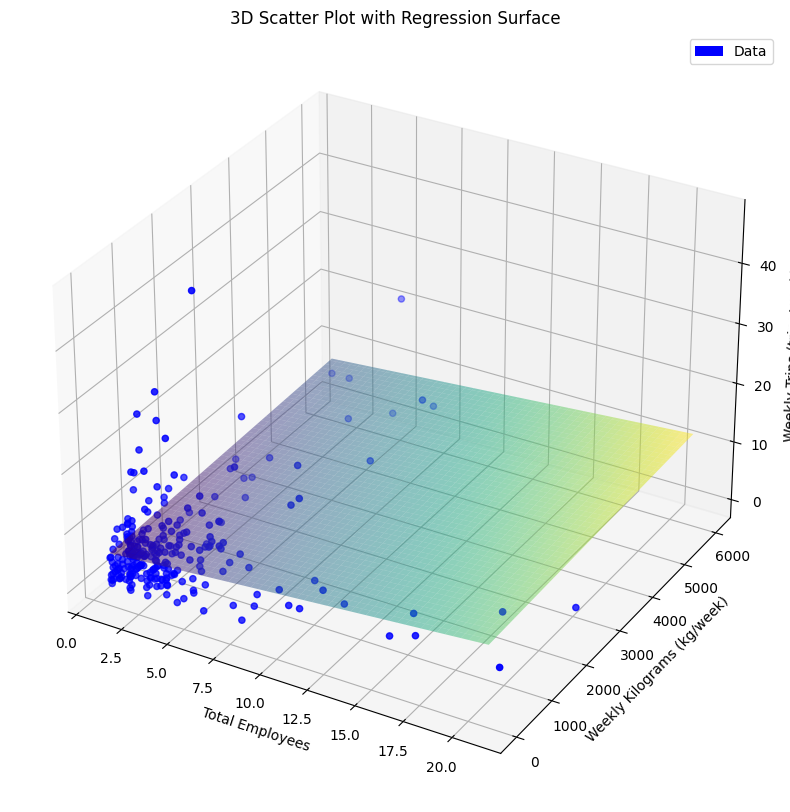

In [97]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Define your dependent variable (target) and independent variables (features)
y = numeric_fs_windsorized_df['Weekly Trips (trips/week)']
X = numeric_fs_windsorized_df[['Total Employees', 'Weekly Kilograms (kg/week)']]  # Change the variables here

# Fit the OLS model
model_8 = sm.OLS(y, sm.add_constant(X)).fit()

print(model_8.summary())

# Make predictions
y_pred = model_8.predict(sm.add_constant(X))

# Calculate the residuals
residuals = y - y_pred

# Calculate mean squared error (MSE)
mse = np.mean(residuals**2)

# Calculate RMSE
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Create a meshgrid for the independent variables
x1 = np.linspace(X['Total Employees'].min(), X['Total Employees'].max(), 100)
x2 = np.linspace(X['Weekly Kilograms (kg/week)'].min(), X['Weekly Kilograms (kg/week)'].max(), 100)
X1, X2 = np.meshgrid(x1, x2)
X_mesh = sm.add_constant(np.column_stack((X1.ravel(), X2.ravel())))
Y_pred = model_8.predict(X_mesh)

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 10))  # Adjust the figure size here
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
scatter = ax.scatter(X['Total Employees'], X['Weekly Kilograms (kg/week)'], y, label='Data', c='blue')

# Create a proxy artist for the legend
proxy = plt.Rectangle((0, 0), 1, 1, fc="b")

# Add the proxy artist to the legend manually
ax.legend([proxy], ["Data"])

# Plot the regression surface
surf = ax.plot_surface(X1, X2, Y_pred.reshape(X1.shape), alpha=0.5, cmap='viridis')

# Set axis labels
ax.set_xlabel('Total Employees')
ax.set_ylabel('Weekly Kilograms (kg/week)')
ax.set_zlabel('Weekly Trips (trips/week)')

# Set plot title
plt.title('3D Scatter Plot with Regression Surface')

plt.show()


* Model employees and total wahrehouse area

In [98]:
numeric_fs_windsorized_df.columns

Index(['Hours Open (h)', 'Total Employees', 'Total Area (m²)',
       'Warehouse Area (m²)', 'Parking Minutes (min)',
       'Weekly Trips (trips/week)', 'Weekly Kilograms (kg/week)'],
      dtype='object')

                                OLS Regression Results                               
Dep. Variable:     Weekly Trips (trips/week)   R-squared:                       0.022
Model:                                   OLS   Adj. R-squared:                  0.015
Method:                        Least Squares   F-statistic:                     3.021
Date:                       Thu, 05 Oct 2023   Prob (F-statistic):             0.0504
Time:                               16:11:43   Log-Likelihood:                -846.79
No. Observations:                        266   AIC:                             1700.
Df Residuals:                            263   BIC:                             1710.
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

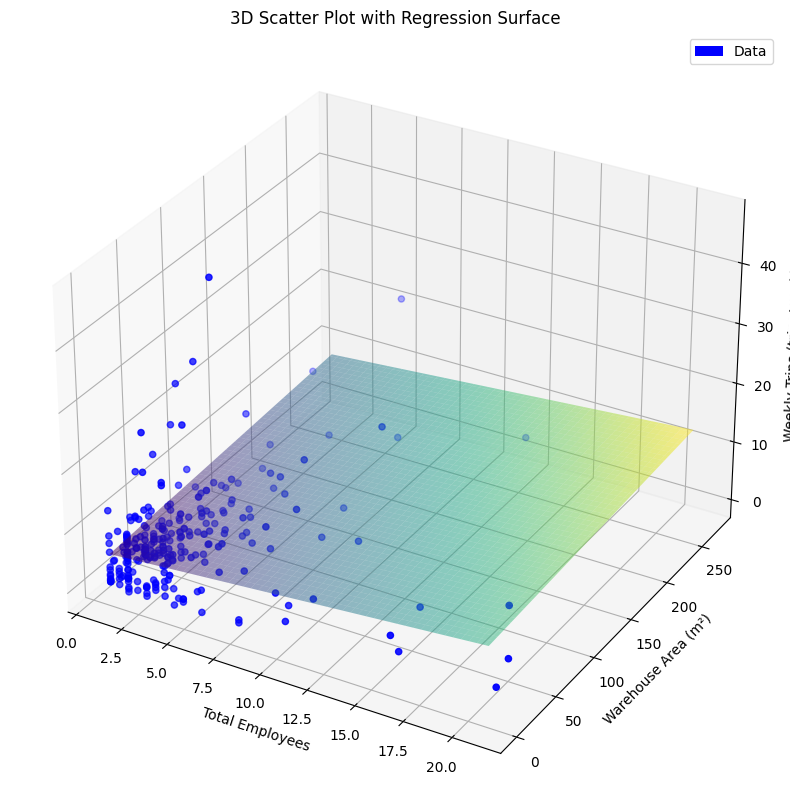

In [99]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Define your dependent variable (target) and independent variables (features)
y = numeric_fs_windsorized_df['Weekly Trips (trips/week)']
X = numeric_fs_windsorized_df[['Total Employees', 'Warehouse Area (m²)']]  # Change the variable here

# Fit the OLS model
model_9 = sm.OLS(y, sm.add_constant(X)).fit()

print(model_9.summary())

# Make predictions
y_pred = model_9.predict(sm.add_constant(X))

# Calculate the residuals
residuals = y - y_pred

# Calculate mean squared error (MSE)
mse = np.mean(residuals**2)

# Calculate RMSE
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Create a meshgrid for the independent variables
x1 = np.linspace(X['Total Employees'].min(), X['Total Employees'].max(), 100)
x2 = np.linspace(X['Warehouse Area (m²)'].min(), X['Warehouse Area (m²)'].max(), 100)
X1, X2 = np.meshgrid(x1, x2)
X_mesh = sm.add_constant(np.column_stack((X1.ravel(), X2.ravel())))
Y_pred = model_9.predict(X_mesh)

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 10))  # Adjust the figure size here
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
scatter = ax.scatter(X['Total Employees'], X['Warehouse Area (m²)'], y, label='Data', c='blue')

# Create a proxy artist for the legend
proxy = plt.Rectangle((0, 0), 1, 1, fc="b")

# Add the proxy artist to the legend manually
ax.legend([proxy], ["Data"])

# Plot the regression surface
surf = ax.plot_surface(X1, X2, Y_pred.reshape(X1.shape), alpha=0.5, cmap='viridis')

# Set axis labels
ax.set_xlabel('Total Employees')
ax.set_ylabel('Warehouse Area (m²)')
ax.set_zlabel('Weekly Trips (trips/week)')

# Set plot title
#plt.title('3D Scatter Plot with Regression Surface')

plt.show()


* Model employees and parking minutes

                                OLS Regression Results                               
Dep. Variable:     Weekly Trips (trips/week)   R-squared:                       0.048
Model:                                   OLS   Adj. R-squared:                  0.041
Method:                        Least Squares   F-statistic:                     6.630
Date:                       Thu, 05 Oct 2023   Prob (F-statistic):            0.00155
Time:                               16:16:30   Log-Likelihood:                -843.27
No. Observations:                        266   AIC:                             1693.
Df Residuals:                            263   BIC:                             1703.
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

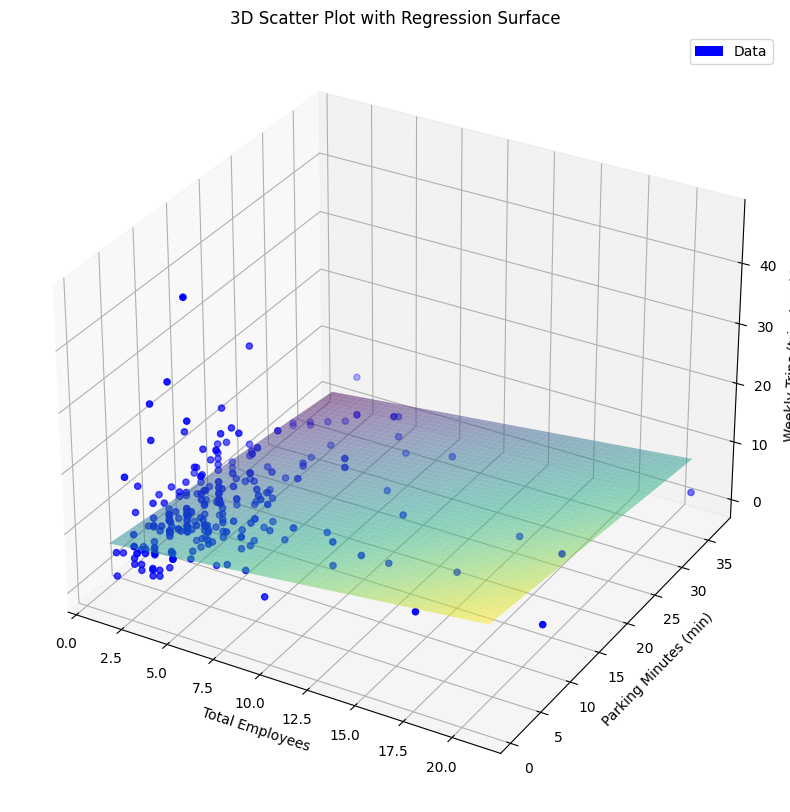

In [100]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Define your dependent variable (target) and independent variables (features)
y = numeric_fs_windsorized_df['Weekly Trips (trips/week)']
X = numeric_fs_windsorized_df[['Total Employees', 'Parking Minutes (min)']]  # Change the variable here

# Fit the OLS model
model_10 = sm.OLS(y, sm.add_constant(X)).fit()

print(model_10.summary())

# Make predictions
y_pred = model_10.predict(sm.add_constant(X))

# Calculate the residuals
residuals = y - y_pred

# Calculate mean squared error (MSE)
mse = np.mean(residuals**2)

# Calculate RMSE
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Create a meshgrid for the independent variables
x1 = np.linspace(X['Total Employees'].min(), X['Total Employees'].max(), 100)
x2 = np.linspace(X['Parking Minutes (min)'].min(), X['Parking Minutes (min)'].max(), 100)
X1, X2 = np.meshgrid(x1, x2)
X_mesh = sm.add_constant(np.column_stack((X1.ravel(), X2.ravel())))
Y_pred = model_10.predict(X_mesh)

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 10))  # Adjust the figure size here
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
scatter = ax.scatter(X['Total Employees'], X['Parking Minutes (min)'], y, label='Data', c='blue')

# Create a proxy artist for the legend
proxy = plt.Rectangle((0, 0), 1, 1, fc="b")

# Add the proxy artist to the legend manually
ax.legend([proxy], ["Data"])

# Plot the regression surface
surf = ax.plot_surface(X1, X2, Y_pred.reshape(X1.shape), alpha=0.5, cmap='viridis')

# Set axis labels
ax.set_xlabel('Total Employees')
ax.set_ylabel('Parking Minutes (min)')
ax.set_zlabel('Weekly Trips (trips/week)')

# Set plot title
plt.title('3D Scatter Plot with Regression Surface')

plt.show()


* Model employees + wha+weeek kg

In [101]:
numeric_fs_windsorized_df.columns

Index(['Hours Open (h)', 'Total Employees', 'Total Area (m²)',
       'Warehouse Area (m²)', 'Parking Minutes (min)',
       'Weekly Trips (trips/week)', 'Weekly Kilograms (kg/week)'],
      dtype='object')

In [102]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Define your dependent variable (target) and independent variables (features)
y = numeric_fs_windsorized_df['Weekly Trips (trips/week)']
X = numeric_fs_windsorized_df[['Total Employees', 'Weekly Kilograms (kg/week)',
                               'Warehouse Area (m²)']]  # Change the variable here

# Fit the OLS model
model_11 = sm.OLS(y, sm.add_constant(X)).fit()

print(model_11.summary())

# Make predictions
y_pred = model_11.predict(sm.add_constant(X))

# Calculate the residuals
residuals = y - y_pred

# Calculate mean squared error (MSE)
mse = np.mean(residuals**2)

# Calculate RMSE
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


                                OLS Regression Results                               
Dep. Variable:     Weekly Trips (trips/week)   R-squared:                       0.023
Model:                                   OLS   Adj. R-squared:                  0.012
Method:                        Least Squares   F-statistic:                     2.062
Date:                       Thu, 05 Oct 2023   Prob (F-statistic):              0.106
Time:                               16:21:46   Log-Likelihood:                -846.71
No. Observations:                        266   AIC:                             1701.
Df Residuals:                            262   BIC:                             1716.
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

* Cobinatory of the modelling (normal)

In [106]:
import statsmodels.api as sm
import itertools  # Import the itertools module

# Define your dependent variable (target)
y = numeric_fs_windsorized_df['Weekly Trips (trips/week)']

# Define the list of independent variables
independent_variables = [
    'Hours Open (h)',
    'Total Employees',
    'Warehouse Area (m²)',
    'Parking Minutes (min)',
    'Weekly Kilograms (kg/week)'
]

# Create a list to store model summaries
model_summaries = []

# Create a count variable to keep track of the number of models
model_count = 0

# Generate models for all possible combinations of independent variables
for i in range(1, len(independent_variables) + 1):
    # Generate all combinations of independent variables
    combinations = itertools.combinations(independent_variables, i)
    
    for combo in combinations:
        # Select the subset of independent variables
        X = numeric_fs_windsorized_df[list(combo)]
        
        # Check if 'Hours Open (h)' and 'Total Employees' are in the model
        if 'Hours Open (h)' not in combo and 'Total Employees' not in combo:
            # Add a constant term (intercept) to the independent variables
            X = sm.add_constant(X)
        
        # Fit the OLS model
        model = sm.OLS(y, X).fit()
        
        # Append the model summary to the list
        model_summaries.append((combo, model.summary()))
        
        # Increment the model count
        model_count += 1

# Print the total number of models generated
print(f"Total Number of Models: {model_count}")

# Print the summaries for all models
for combo, summary in model_summaries:
    print(f"Independent Variables: {combo}")
    print(summary)
    print("-" * 80)




Total Number of Models: 31
Independent Variables: ('Hours Open (h)',)
                                    OLS Regression Results                                    
Dep. Variable:     Weekly Trips (trips/week)   R-squared (uncentered):                   0.524
Model:                                   OLS   Adj. R-squared (uncentered):              0.522
Method:                        Least Squares   F-statistic:                              291.3
Date:                       Thu, 05 Oct 2023   Prob (F-statistic):                    1.44e-44
Time:                               16:32:49   Log-Likelihood:                         -858.77
No. Observations:                        266   AIC:                                      1720.
Df Residuals:                            265   BIC:                                      1723.
Df Model:                                  1                                                  
Covariance Type:                   nonrobust                               

* #models with only t values greather than 1.96

In [114]:
#models with only t values greather than 1.96

import statsmodels.api as sm
import itertools  # Import the itertools module

# Define your dependent variable (target)
y = numeric_fs_windsorized_df['Weekly Trips (trips/week)']

# Define the list of independent variables
independent_variables = [
    'Hours Open (h)',
    'Total Employees',
    'Warehouse Area (m²)',
    'Parking Minutes (min)',
    'Weekly Kilograms (kg/week)'
]

# Create a list to store model summaries
model_summaries = []

# Create a count variable to keep track of the number of models
model_count = 0

# Generate models for all possible combinations of independent variables
for i in range(1, len(independent_variables) + 1):
    # Generate all combinations of independent variables
    combinations = itertools.combinations(independent_variables, i)
    
    for combo in combinations:
        # Select the subset of independent variables
        X = numeric_fs_windsorized_df[list(combo)]
        
        # Check if 'Hours Open (h)' and 'Total Employees' are in the model
        if 'Hours Open (h)' not in combo and 'Total Employees' not in combo:
            # Add a constant term (intercept) to the independent variables
            X = sm.add_constant(X)
        
        # Fit the OLS model
        model = sm.OLS(y, X).fit()
        
        # Check if all t-values are greater than 1.96 in absolute value
        if all(abs(model.tvalues) > 1.96):
            # Append the model summary to the list
            model_summaries.append((combo, model.summary()))
        
        # Increment the model count
        model_count += 1

# Print the total number of models generated
print(f"Total Number of Models: {model_summaries}")

# Print the summaries for selected models
for combo, summary in model_summaries:
    print(f"Independent Variables: {combo}")
    print(summary)
    print("-" * 80)



Total Number of Models: 31
Independent Variables: ('Hours Open (h)',)
                                    OLS Regression Results                                    
Dep. Variable:     Weekly Trips (trips/week)   R-squared (uncentered):                   0.524
Model:                                   OLS   Adj. R-squared (uncentered):              0.522
Method:                        Least Squares   F-statistic:                              291.3
Date:                       Thu, 05 Oct 2023   Prob (F-statistic):                    1.44e-44
Time:                               20:38:21   Log-Likelihood:                         -858.77
No. Observations:                        266   AIC:                                      1720.
Df Residuals:                            265   BIC:                                      1723.
Df Model:                                  1                                                  
Covariance Type:                   nonrobust                               

* With RMSE

In [117]:
#with RMSE
import statsmodels.api as sm
import itertools
import numpy as np
import pandas as pd

# Define your dependent variable (target)
y = numeric_fs_windsorized_df['Weekly Trips (trips/week)']

# Create a list to store RMSE and model summaries
model_info = []

# Generate models for all possible combinations of independent variables
for i in range(1, len(independent_variables) + 1):
    # Generate all combinations of independent variables
    combinations = itertools.combinations(independent_variables, i)
    
    for combo in combinations:
        # Select the subset of independent variables
        X = numeric_fs_windsorized_df[list(combo)]
        
        # Check if 'Hours Open (h)' and 'Total Employees' are in the model
        if 'Hours Open (h)' not in combo and 'Total Employees' not in combo:
            # Add a constant term (intercept) to the independent variables
            X = sm.add_constant(X)
        
        # Fit the OLS model
        model = sm.OLS(y, X).fit()
        
        # Check if all t-values are greater than 1.96 in absolute value
        if all(abs(model.tvalues) > 1.96):
            # Calculate RMSE
            predicted_values = model.predict(X)
            rmse = np.sqrt(np.mean((y - predicted_values) ** 2))
            
            # Append RMSE and model summary to the list
            model_info.append((combo, rmse, model.summary()))
        
# Print the summaries for selected models
for combo, rmse, summary in model_info:
    print(f"Independent Variables: {combo}")
    print(f"RMSE: {rmse}")
    print(summary)
    print("-" * 80)


Independent Variables: ('Hours Open (h)',)
RMSE: 6.10752205963949
                                    OLS Regression Results                                    
Dep. Variable:     Weekly Trips (trips/week)   R-squared (uncentered):                   0.524
Model:                                   OLS   Adj. R-squared (uncentered):              0.522
Method:                        Least Squares   F-statistic:                              291.3
Date:                       Thu, 05 Oct 2023   Prob (F-statistic):                    1.44e-44
Time:                               21:19:48   Log-Likelihood:                         -858.77
No. Observations:                        266   AIC:                                      1720.
Df Residuals:                            265   BIC:                                      1723.
Df Model:                                  1                                                  
Covariance Type:                   nonrobust                                   

In [119]:
numeric_fs_windsorized_df.columns

Index(['Hours Open (h)', 'Total Employees', 'Total Area (m²)',
       'Warehouse Area (m²)', 'Parking Minutes (min)',
       'Weekly Trips (trips/week)', 'Weekly Kilograms (kg/week)'],
      dtype='object')

* Combinatory with robust methods

In [107]:
#Robust method
import statsmodels.api as sm
import itertools  # Import the itertools module

# Define your dependent variable (target)
y = numeric_fs_windsorized_df['Weekly Trips (trips/week)']

# Define the list of independent variables
independent_variables = [
    'Hours Open (h)',
    'Total Employees',
    'Warehouse Area (m²)',
    'Parking Minutes (min)',
    'Weekly Kilograms (kg/week)'
]

# Create a list to store model summaries
model_summaries = []

# Create a count variable to keep track of the number of models
model_count = 0

# Generate models for all possible combinations of independent variables
for i in range(1, len(independent_variables) + 1):
    # Generate all combinations of independent variables
    combinations = itertools.combinations(independent_variables, i)
    
    for combo in combinations:
        # Select the subset of independent variables
        X = numeric_fs_windsorized_df[list(combo)]
        
        # Check if 'Hours Open (h)' and 'Total Employees' are in the model
        if 'Hours Open (h)' not in combo and 'Total Employees' not in combo:
            # Add a constant term (intercept) to the independent variables
            X = sm.add_constant(X)
        
        # Fit the robust OLS model
        model = sm.RLM(y, X).fit()
        
        # Append the model summary to the list
        model_summaries.append((combo, model.summary()))
        
        # Increment the model count
        model_count += 1

# Print the total number of models generated
print(f"Total Number of Models: {model_count}")

# Print the summaries for all models
for combo, summary in model_summaries:
    print(f"Independent Variables: {combo}")
    print(summary)
    print("-" * 80)




Total Number of Models: 31
Independent Variables: ('Hours Open (h)',)
                        Robust linear Model Regression Results                       
Dep. Variable:     Weekly Trips (trips/week)   No. Observations:                  266
Model:                                   RLM   Df Residuals:                      265
Method:                                 IRLS   Df Model:                            0
Norm:                                 HuberT                                         
Scale Est.:                              mad                                         
Cov Type:                                 H1                                         
Date:                       Thu, 05 Oct 2023                                         
Time:                               16:54:30                                         
No. Iterations:                           17                                         
                     coef    std err          z      P>|z|      [0.025

* End models

### Lin-lin Area Based

In [111]:
numeric_fs_windsorized_df.columns

Index(['Hours Open (h)', 'Total Employees', 'Total Area (m²)',
       'Warehouse Area (m²)', 'Parking Minutes (min)',
       'Weekly Trips (trips/week)', 'Weekly Kilograms (kg/week)'],
      dtype='object')

* Lin-Lin Area based models

In [331]:
#with RMSE
import statsmodels.api as sm
import itertools
import numpy as np
import pandas as pd

# Define your dependent variable (target)
y = numeric_fs_windsorized_df['Weekly Trips (trips/week)']

# Define the list of independent variables
independent_variables = [
    'Hours Open (h)',
    'Total Area (m²)',
    'Warehouse Area (m²)',
    'Parking Minutes (min)',
    'Weekly Kilograms (kg/week)'
]

# Create a list to store RMSE and model summaries
model_info_lin_lin_area = []

# Generate models for all possible combinations of independent variables
for i in range(1, len(independent_variables) + 1):
    # Generate all combinations of independent variables
    combinations = itertools.combinations(independent_variables, i)
    
    for combo in combinations:
        # Select the subset of independent variables
        X = numeric_fs_windsorized_df[list(combo)]
        
        # Check if 'Hours Open (h)' and 'Total Employees' are in the model
        if 'Hours Open (h)' not in combo and 'Total Area (m²)' not in combo:
            # Add a constant term (intercept) to the independent variables
            X = sm.add_constant(X)
        
        # Fit the OLS model
        model = sm.OLS(y, X).fit()
        
        # Check if all t-values are greater than 1.96 in absolute value
        if all(abs(model.tvalues) > 1.96):
            # Calculate RMSE
            predicted_values = model.predict(X)
            rmse = np.sqrt(np.mean((y - predicted_values) ** 2))
            
            # Append RMSE and model summary to the list
            model_info_lin_lin_area.append((combo, rmse, model.summary(),model.fvalue))
        
# Sort the models by F-statistics in descending order
model_info_lin_lin_area.sort(key=lambda x: x[3], reverse=True)

# Print the summaries for selected models
for combo, rmse, summary, f_value in model_info_lin_lin_area:
    print(f"Independent Variables: {combo}")
    print(f"RMSE: {rmse}")
    print(f"F-statistics: {f_value}")
    print(summary)
    print("-" * 80)

Independent Variables: ('Hours Open (h)',)
RMSE: 6.10752205963949
F-statistics: 291.2617436339868
                                    OLS Regression Results                                    
Dep. Variable:     Weekly Trips (trips/week)   R-squared (uncentered):                   0.524
Model:                                   OLS   Adj. R-squared (uncentered):              0.522
Method:                        Least Squares   F-statistic:                              291.3
Date:                       Sat, 07 Oct 2023   Prob (F-statistic):                    1.44e-44
Time:                               16:03:31   Log-Likelihood:                         -858.77
No. Observations:                        266   AIC:                                      1720.
Df Residuals:                            265   BIC:                                      1723.
Df Model:                                  1                                                  
Covariance Type:                   nonrobust   

* Combinatory with robust methods

* End of the models

## Models Lin-Log

In [126]:
numeric_fs_windsorized_df.columns

Index(['Weekly Trips (trips/week)', 'Hours Open (h)', 'Total Employees',
       'Total Area (m²)', 'Warehouse Area (m²)', 'Parking Minutes (min)',
       'Weekly Kilograms (kg/week)'],
      dtype='object')

In [332]:

numeric_fs_windsorized_df.head()

Weekly Trips (trips/week)  Hours Open (h)  Total Employees  \
0                        5.0            14.0              1.0   
1                        5.0            18.0              2.0   
2                       21.5            15.0              5.0   
3                        1.0            12.0              4.5   
4                        5.0            10.0              7.0   

   Total Area (m²)  Warehouse Area (m²)  Parking Minutes (min)  \
0            100.0              100.000                   15.0   
1            170.0              170.000                    5.0   
2            300.0              271.875                   10.0   
3             40.0                5.000                    7.5   
4            220.0              220.000                   30.0   

   Weekly Kilograms (kg/week)  
0                 6044.546875  
1                 6044.546875  
2                 6044.546875  
3                 6044.546875  
4                 5948.000000

* Df converted

In [333]:
import pandas as pd
import numpy as np

# Assuming 'numeric_fs_windsorized_df' contains your original DataFrame
lin_ln_df = pd.DataFrame()

# Copy the first column ('Weekly Trips (trips/week)') to the new DataFrame
lin_ln_df['Weekly Trips (trips/week)'] = numeric_fs_windsorized_df['Weekly Trips (trips/week)']

# Apply the natural logarithm transformation to all other columns
for column in numeric_fs_windsorized_df.columns[1:]:
    lin_ln_df[column] = np.log(numeric_fs_windsorized_df[column])

    # Columns to which you want to add 'ln' as a prefix
columns_to_prefix = ['Hours Open (h)', 'Total Employees', 'Total Area (m²)', 'Warehouse Area (m²)', 'Parking Minutes (min)', 'Weekly Kilograms (kg/week)']

# Add 'ln' prefix to selected column names
for column in columns_to_prefix:
    lin_ln_df.rename(columns={column: f'ln{column}'}, inplace=True)

# Print the updated DataFrame
print(lin_ln_df)


     Weekly Trips (trips/week)  lnHours Open (h)  lnTotal Employees  \
0                         5.00          2.639057           0.000000   
1                         5.00          2.890372           0.693147   
2                        21.50          2.708050           1.609438   
3                         1.00          2.484907           1.504077   
4                         5.00          2.302585           1.945910   
..                         ...               ...                ...   
261                       4.25          2.079442           1.098612   
262                       2.00          2.079442           0.405465   
263                      10.00          2.397895           0.693147   
264                       5.00          2.302585           0.000000   
265                       2.00          2.484907           1.098612   

     lnTotal Area (m²)  lnWarehouse Area (m²)  lnParking Minutes (min)  \
0             4.605170               4.605170                 2.708050   

c:\Users\Carlos Granada\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [334]:
lin_ln_df

Weekly Trips (trips/week)  lnHours Open (h)  lnTotal Employees  \
0                         5.00          2.639057           0.000000   
1                         5.00          2.890372           0.693147   
2                        21.50          2.708050           1.609438   
3                         1.00          2.484907           1.504077   
4                         5.00          2.302585           1.945910   
..                         ...               ...                ...   
261                       4.25          2.079442           1.098612   
262                       2.00          2.079442           0.405465   
263                      10.00          2.397895           0.693147   
264                       5.00          2.302585           0.000000   
265                       2.00          2.484907           1.098612   

     lnTotal Area (m²)  lnWarehouse Area (m²)  lnParking Minutes (min)  \
0             4.605170               4.605170                 2.708050   
1             5.135798               5.135798                 1.609438   
2             5.703782               5.605342                 2.302585   
3             3.688879               1.609438                 2.014903   
4             5.393628               5.393628                 3.401197   
..                 ...                    ...                      ...   
261           4.248495               4.248495                 0.693147   
262           2.484907               1.386294                 2.302585   
263           2.302585                   -inf                 1.897120   
264           4.094345               2.708050                 1.921813   
265           2.197225                   -inf                 1.098612   

     lnWeekly Kilograms (kg/week)  
0                        8.706912  
1                        8.706912  
2                        8.706912  
3                        8.706912  
4                        8.690810  
..                            ...  
261                      2.525729  
262                      2.484907  
263                      2.374906  
264                      2.251292  
265                      0.095310  

[266 rows x 7 columns]

* Dictionary creation with claening nan or -inf

In [335]:
import numpy as np

# Create dictionaries to store cleaned values and their original indices for each column
lin_log_dict = {}

# Iterate through columns
for col in lin_ln_df.columns:
    # Extract NaN and -inf values from the column
    nan_mask = np.isnan(lin_ln_df[col])
    neg_inf_mask = np.isneginf(lin_ln_df[col])
    
    # Get the values that are not NaN or -inf
    cleaned_col_values = lin_ln_df[col][~(nan_mask | neg_inf_mask)]
    
    # Get the original indices of the cleaned values
    original_indices = np.where(~(nan_mask | neg_inf_mask))[0]
    
    # Store the cleaned values and their original indices in a dictionary
    lin_log_dict[col] = {'values': cleaned_col_values, 'indices': original_indices}

# Print or use cleaned_values as needed


* lin_log_dict


In [244]:
lin_log_dict

{'Weekly Trips (trips/week)': {'values': 0       5.00
  1       5.00
  2      21.50
  3       1.00
  4       5.00
         ...  
  261     4.25
  262     2.00
  263    10.00
  264     5.00
  265     2.00
  Name: Weekly Trips (trips/week), Length: 266, dtype: float64,
  'indices': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
          13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
          26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
          39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
          52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
          65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
          78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
          91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
         104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
         117, 118, 119, 120, 121, 122, 123, 124, 125, 1

In [165]:
#Dictionary keys

'Weekly Trips (trips/week)'
'lnHours Open (h)'
'lnTotal Employees'
'lnTotal Area (m²)'
'lnWarehouse Area (m²)'
'lnParking Minutes (min)'
'lnWeekly Kilograms (kg/week)'

'lnWeekly Kilograms (kg/week)'

In [ ]:
# Example of Creating a dictionary
my_dict = {'name': 'John', 'age': 30, 'city': 'New York'}

# Accessing values
print(my_dict['name'])  # Output: 'John'

# Modifying values
my_dict['age'] = 31

# Adding a new key-value pair
my_dict['country'] = 'USA'

# Dictionary methods
print(my_dict.keys())    # Output: dict_keys(['name', 'age', 'city', 'country'])
print(my_dict.values())  # Output: dict_values(['John', 31, 'New York', 'USA'])

# Removing a key-value pair
del my_dict['city']

# Iterating through a dictionary
for key, value in my_dict.items():
    print(key, value)


### Employment based

In [341]:
lin_ln_df.columns

Index(['Weekly Trips (trips/week)', 'lnHours Open (h)', 'lnTotal Employees',
       'lnTotal Area (m²)', 'lnWarehouse Area (m²)', 'lnParking Minutes (min)',
       'lnWeekly Kilograms (kg/week)'],
      dtype='object')

In [340]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import itertools

# Function to extract matching values for a given combination
def extract_matching_values(keys, matching_indices, lin_log_dict):
    matching_values = {}
    for key in keys:
        values = [lin_log_dict[key]['values'][index] for index in matching_indices]
        matching_values[key] = values
    return matching_values

# Define the keys to combine
keys_to_combine = [
    'lnHours Open (h)','lnTotal Employees' , 'lnWarehouse Area (m²)',
    'lnParking Minutes (min)', 'lnWeekly Kilograms (kg/week)'
]

# Generate all possible combinations of keys including 'Weekly Trips (trips/week)'
matching_combinations = [keys for i in range(1, len(keys_to_combine) + 1) for keys in itertools.combinations(keys_to_combine, i)]
matching_combinations = [('Weekly Trips (trips/week)',) + combo for combo in matching_combinations]

# Create a list to store matching combinations and matching indices
matching_data_lin_log_employee = []

# Iterate through the combinations and check for matching indices
for i, combo in enumerate(matching_combinations):
    # Extract indices for each key in the combination
    indices_for_keys = [lin_log_dict[key]['indices'] for key in combo]

    # Find the intersection of indices to identify matching indices
    matching_indices = set(indices_for_keys[0]).intersection(*indices_for_keys)

    # Check if there are matching indices
    if matching_indices:
        matching_data_lin_log_employee.append((i + 1, combo, matching_indices))

# Create a DataFrame from the matching data
lin_ln_models_df_employee = pd.DataFrame(matching_data_lin_log_employee, columns=['Combination', 'Keys', 'Matching Indices'])

# Create a dictionary to store matching values for each key
matching_values_lin_log_dict_employee = {}

# Iterate through the matching combinations
for _, row in lin_ln_models_df_employee.iterrows():
    combination = row['Combination']
    keys_in_combination = row['Keys']
    matching_indices = row['Matching Indices']
    matching_values_lin_log_dict_employee[combination] = extract_matching_values(keys_in_combination, matching_indices, lin_log_dict)


# Create a list to store model information
model_lin_log_info_employee = []

# Iterate through the matching combinations and their values
for combination, values in matching_values_lin_log_dict_employee.items():
    # Define your dependent variable (target)
    y = values['Weekly Trips (trips/week)']

    # Create a DataFrame for independent variables (features)
    X = pd.DataFrame(values)

    # Drop the target variable from X
    X = X.drop(columns=['Weekly Trips (trips/week)'])

    # Check if 'lnHours Open (h)' and 'lnTotal Area (m²)' are in the model
    if 'lnHours Open (h)' not in keys_in_combination and 'lnTotal Employees' not in keys_in_combination:
        # Add a constant term (intercept) to the independent variables
        X = sm.add_constant(X)

    try:
        # Fit the OLS model
        model = sm.OLS(y, X).fit()

        # Check if all t-values are greater than 1.96 in absolute value
        if all(abs(model.tvalues) > 1.96):
            # Calculate RMSE
            predicted_values = model.predict(X)
            rmse = np.sqrt(np.mean((y - predicted_values) ** 2))

            # Append RMSE and model summary to the list
            model_lin_log_info_employee.append((combination, rmse, model.summary(),model.fvalue))
    except Exception as e:
        print(f"Error for combo {combination}: {str(e)}")

# Sort the models by F-statistics in descending order
model_lin_log_info_employee.sort(key=lambda x: x[3], reverse=True)

# Print the summaries for selected models
for combo, rmse, summary,f_value in model_lin_log_info_employee:
    print(f"Independent Variables: {combo}")
    print(f"RMSE: {rmse}")
    print(f"F-statistics: {f_value}")
    print(summary)
    print("-" * 80) 


Independent Variables: 1
RMSE: 5.85801175497918
F-statistics: 339.6566083379964
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.562
Model:                            OLS   Adj. R-squared (uncentered):              0.560
Method:                 Least Squares   F-statistic:                              339.7
Date:                Sat, 07 Oct 2023   Prob (F-statistic):                    2.21e-49
Time:                        16:25:13   Log-Likelihood:                         -847.68
No. Observations:                 266   AIC:                                      1697.
Df Residuals:                     265   BIC:                                      1701.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err  

### Area Based

In [342]:
lin_ln_df.columns

Index(['Weekly Trips (trips/week)', 'lnHours Open (h)', 'lnTotal Employees',
       'lnTotal Area (m²)', 'lnWarehouse Area (m²)', 'lnParking Minutes (min)',
       'lnWeekly Kilograms (kg/week)'],
      dtype='object')

In [343]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import itertools

# Function to extract matching values for a given combination
def extract_matching_values(keys, matching_indices, lin_log_dict):
    matching_values = {}
    for key in keys:
        values = [lin_log_dict[key]['values'][index] for index in matching_indices]
        matching_values[key] = values
    return matching_values

# Define the keys to combine
keys_to_combine = [
    'lnHours Open (h)','lnTotal Area (m²)' , 'lnWarehouse Area (m²)',
    'lnParking Minutes (min)', 'lnWeekly Kilograms (kg/week)'
]

# Generate all possible combinations of keys including 'Weekly Trips (trips/week)'
matching_combinations = [keys for i in range(1, len(keys_to_combine) + 1) for keys in itertools.combinations(keys_to_combine, i)]
matching_combinations = [('Weekly Trips (trips/week)',) + combo for combo in matching_combinations]

# Create a list to store matching combinations and matching indices
matching_data_lin_log_area = []

# Iterate through the combinations and check for matching indices
for i, combo in enumerate(matching_combinations):
    # Extract indices for each key in the combination
    indices_for_keys = [lin_log_dict[key]['indices'] for key in combo]

    # Find the intersection of indices to identify matching indices
    matching_indices = set(indices_for_keys[0]).intersection(*indices_for_keys)

    # Check if there are matching indices
    if matching_indices:
        matching_data_lin_log_area.append((i + 1, combo, matching_indices))

# Create a DataFrame from the matching data
lin_ln_models_df_employee = pd.DataFrame(matching_data_lin_log_area, columns=['Combination', 'Keys', 'Matching Indices'])

# Create a dictionary to store matching values for each key
matching_values_lin_log_dict_area = {}

# Iterate through the matching combinations
for _, row in lin_ln_models_df_employee.iterrows():
    combination = row['Combination']
    keys_in_combination = row['Keys']
    matching_indices = row['Matching Indices']
    matching_values_lin_log_dict_area[combination] = extract_matching_values(keys_in_combination, matching_indices, lin_log_dict)


# Create a list to store model information
model_lin_log_info_area = []

# Iterate through the matching combinations and their values
for combination, values in matching_values_lin_log_dict_area.items():
    # Define your dependent variable (target)
    y = values['Weekly Trips (trips/week)']

    # Create a DataFrame for independent variables (features)
    X = pd.DataFrame(values)

    # Drop the target variable from X
    X = X.drop(columns=['Weekly Trips (trips/week)'])

    # Check if 'lnHours Open (h)' and 'lnTotal Area (m²)' are in the model
    if 'lnHours Open (h)' not in keys_in_combination and'lnTotal Area (m²)' not in keys_in_combination:
        # Add a constant term (intercept) to the independent variables
        X = sm.add_constant(X)

    try:
        # Fit the OLS model
        model = sm.OLS(y, X).fit()

        # Check if all t-values are greater than 1.96 in absolute value
        if all(abs(model.tvalues) > 1.96):
            # Calculate RMSE
            predicted_values = model.predict(X)
            rmse = np.sqrt(np.mean((y - predicted_values) ** 2))

            # Append RMSE and model summary to the list
            model_lin_log_info_area.append((combination, rmse, model.summary(),model.fvalue))
    except Exception as e:
        print(f"Error for combo {combination}: {str(e)}")

# Sort the models by F-statistics in descending order
model_lin_log_info_area.sort(key=lambda x: x[3], reverse=True)

# Print the summaries for selected models
for combo, rmse, summary,f_value in model_lin_log_info_area:
    print(f"Independent Variables: {combo}")
    print(f"RMSE: {rmse}")
    print(f"F-statistics: {f_value}")
    print(summary)
    print("-" * 80) 


Independent Variables: 2
RMSE: 5.850600719330273
F-statistics: 341.1894320770025
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.563
Model:                            OLS   Adj. R-squared (uncentered):              0.561
Method:                 Least Squares   F-statistic:                              341.2
Date:                Sat, 07 Oct 2023   Prob (F-statistic):                    1.58e-49
Time:                        16:35:46   Log-Likelihood:                         -847.34
No. Observations:                 266   AIC:                                      1697.
Df Residuals:                     265   BIC:                                      1700.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err

* Create combinations

In [185]:
# Example of Extract indices from 'lnHours Open (h)' and 'lnWarehouse Area (m²)'
indices_hours_open = lin_log_dict['lnHours Open (h)']['indices']
indices_warehouse_area = lin_log_dict['lnWarehouse Area (m²)']['indices']

# Find matching indices
matching_indices = [index for index in indices_hours_open if index in indices_warehouse_area]

# Extract the matching values
matching_values_hours_open = [lin_log_dict['lnHours Open (h)']['values'][index] for index in matching_indices]
matching_values_warehouse_area = [lin_log_dict['lnWarehouse Area (m²)']['values'][index] for index in matching_indices]

# Print matching indices and values
print("Matching Indices:", matching_indices)
print("Matching Values (lnHours Open):", matching_values_hours_open)
print("Matching Values (lnWarehouse Area):", matching_values_warehouse_area)

# Check if the output lists have the same length
if len(matching_indices) == len(matching_values_hours_open) == len(matching_values_warehouse_area):
    print("Matching Indices and Values have the same length.")
else:
    print("Matching Indices and Values do not have the same length.")


Matching Indices: [0, 1, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 19, 20, 22, 25, 29, 32, 34, 35, 37, 38, 39, 40, 43, 44, 45, 47, 48, 49, 51, 52, 54, 58, 59, 63, 65, 66, 67, 68, 69, 71, 72, 73, 74, 76, 78, 80, 82, 84, 88, 90, 93, 94, 103, 104, 105, 106, 107, 109, 111, 112, 113, 114, 115, 116, 121, 123, 124, 126, 128, 130, 131, 133, 134, 138, 139, 141, 142, 143, 145, 147, 149, 152, 153, 156, 157, 158, 159, 160, 161, 163, 164, 165, 166, 167, 171, 172, 179, 181, 184, 185, 187, 189, 192, 194, 195, 198, 199, 203, 205, 208, 210, 212, 216, 219, 223, 224, 225, 226, 227, 228, 236, 237, 239, 246, 249, 250, 253, 254, 257, 261, 262, 264]
Matching Values (lnHours Open): [2.1972245773362196, 2.5649493574615367, 2.3978952727983707, 1.6094379124341003, 1.6094379124341003, 0.0, 2.0794415416798357, 2.1972245773362196, 2.1972245773362196, 0.8109302162163288, 1.9459101490553132, 2.0476928433652555, 0.0, 1.7047480922384253, 1.3217558399823195, 1.8718021769015913, 2.3749057545736716, 1.0986122886681098, 2.1400

* Index to combinations

In [246]:
import itertools

# Define the keys to combine
keys_to_combine = [
    'Weekly Trips (trips/week)',
    'lnHours Open (h)', 'lnTotal Area (m²)', 'lnWarehouse Area (m²)',
    'lnParking Minutes (min)', 'lnWeekly Kilograms (kg/week)'
]

# Generate all possible combinations of keys
matching_combinations = []

for i in range(2, len(keys_to_combine) + 1):  # Start from 2 to include 'Weekly Trips (trips/week)'
    combinations = itertools.combinations(keys_to_combine, i)
    matching_combinations.extend(combinations)

# Iterate through the combinations and check for matching indices
for combo in matching_combinations:
    # Extract indices for each key in the combination
    indices_for_keys = [lin_log_dict[key]['indices'] for key in combo]

    # Find the intersection of indices to identify matching indices
    matching_indices = set(indices_for_keys[0]).intersection(*indices_for_keys)

    # Check if there are matching indices
    if matching_indices:
        print(f"Matching Combination: {combo}")
        print(f"Matching Indices: {matching_indices}")


Matching Combination: ('Weekly Trips (trips/week)', 'lnHours Open (h)')
Matching Indices: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203,

* Dictionary to modelling

#dictionary to modelling. It gets combinations and extract the match of the indices and values pervariable

In [247]:
import pandas as pd
import itertools

# Function to extract matching values for a given combination
def extract_matching_values(keys, matching_indices, lin_log_dict):
    matching_values = {}
    for key in keys:
        values = [lin_log_dict[key]['values'][index] for index in matching_indices]
        matching_values[key] = values
    return matching_values

# Define the keys to combine
keys_to_combine = [
    'lnHours Open (h)', 'lnTotal Area (m²)', 'lnWarehouse Area (m²)',
    'lnParking Minutes (min)', 'lnWeekly Kilograms (kg/week)'
]

# Generate all possible combinations of keys including 'Weekly Trips (trips/week)'
matching_combinations = [keys for i in range(1, len(keys_to_combine) + 1) for keys in itertools.combinations(keys_to_combine, i)]
matching_combinations = [('Weekly Trips (trips/week)',) + combo for combo in matching_combinations]

# Create a list to store matching combinations and matching indices
matching_data = []

# Iterate through the combinations and check for matching indices
for i, combo in enumerate(matching_combinations):
    # Extract indices for each key in the combination
    indices_for_keys = [lin_log_dict[key]['indices'] for key in combo]

    # Find the intersection of indices to identify matching indices
    matching_indices = set(indices_for_keys[0]).intersection(*indices_for_keys)

    # Check if there are matching indices
    if matching_indices:
        matching_data.append((i + 1, combo, matching_indices))

# Create a DataFrame from the matching data
lin_ln_models_df = pd.DataFrame(matching_data, columns=['Combination', 'Keys', 'Matching Indices'])

# Create a dictionary to store matching values for each key
matching_values_dict = {}

# Iterate through the matching combinations
for _, row in lin_ln_models_df.iterrows():
    combination = row['Combination']
    keys_in_combination = row['Keys']
    matching_indices = row['Matching Indices']

    matching_values_dict[combination] = extract_matching_values(keys_in_combination, matching_indices, lin_log_dict)

# Print matching values for each combination
for combination, values in matching_values_dict.items():
    print(f"Combination {combination} Matching Values:")
    for key, value in values.items():
        print(f"{key}: {value}")

# Check if all matching values lists have the same length
matching_values_lengths = [len(values) for values in matching_values_dict.values()]
if all(length == matching_values_lengths[0] for length in matching_values_lengths):
    print("All matching values lists have the same length.")
else:
    print("Matching values lists do not have the same length.")


Combination 1 Matching Values:
Weekly Trips (trips/week): [5.0, 5.0, 21.5, 1.0, 5.0, 5.0, 15.0, 8.75, 4.0, 2.0, 3.0, 9.75, 3.0, 2.25, 10.0, 20.5, 2.25, 3.25, 7.5, 18.5, 6.25, 5.0, 2.5, 13.25, 2.0, 4.25, 10.0, 11.0, 16.5, 4.0, 20.0, 6.0, 1.5, 46.9375, 6.0, 5.0, 13.5, 3.5, 4.75, 9.0, 5.0, 1.5, 7.5, 3.0, 4.0, 5.0, 2.5, 7.0, 10.5, 3.0, 4.0, 3.0, 3.0, 1.0, 4.0, 20.0, 13.0, 7.0, 7.5, 3.0, 12.5, 4.5, 8.5, 3.0, 13.5, 3.0, 8.0, 8.5, 3.0, 3.0, 13.25, 3.0, 9.0, 4.0, 6.0, 8.25, 6.0, 1.0, 6.0, 10.0, 2.0, 4.0, 4.0, 8.75, 4.0, 1.5, 3.5, 1.0, 8.0, 2.5, 5.0, 22.0, 27.75, 8.0, 7.0, 13.75, 3.75, 32.5, 28.0, 11.5, 3.0, 1.25, 17.0, 4.0, 1.0, 3.0, 5.0, 4.0, 20.0, 8.0, 12.5, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 2.25, 11.0, 4.0, 4.0, 2.5, 3.25, 7.75, 5.0, 1.5, 1.0, 2.0, 5.0, 2.0, 12.0, 4.0, 9.0, 3.0, 3.75, 10.0, 5.5, 6.5, 6.0, 3.0, 9.5, 4.75, 4.0, 5.25, 19.0, 4.0, 2.0, 0.25, 10.5, 5.0, 9.5, 4.0, 3.0, 3.25, 11.25, 8.75, 2.25, 4.0, 1.0, 3.0, 2.0, 7.5, 8.0, 6.0, 3.0, 4.0, 4.0, 2.0, 16.25, 7.75, 7.0, 2.0, 4.0, 7.5, 19.5

* Code to modeling with the dictionary obtained

In [248]:
import statsmodels.api as sm
import numpy as np

# Create a list to store model information
model_info = []

# Iterate through the matching combinations and their values
for combination, values in matching_values_dict.items():
    # Define your dependent variable (target)
    y = values['Weekly Trips (trips/week)']

    # Create a DataFrame for independent variables (features)
    X = pd.DataFrame(values)

    # Drop the target variable from X
    X = X.drop(columns=['Weekly Trips (trips/week)'])

    # Check if 'lnHours Open (h)' and 'lnTotal Area (m²)' are in the model
    if 'lnHours Open (h)' not in keys_in_combination and 'lnTotal Area (m²)' not in keys_in_combination:
        # Add a constant term (intercept) to the independent variables
        X = sm.add_constant(X)

    try:
        # Fit the OLS model
        model = sm.OLS(y, X).fit()

        # Check if all t-values are greater than 1.96 in absolute value
        if all(abs(model.tvalues) > 1.96):
            # Calculate RMSE
            predicted_values = model.predict(X)
            rmse = np.sqrt(np.mean((y - predicted_values) ** 2))

            # Append RMSE and model summary to the list
            model_info.append((combination, rmse, model.summary()))
    except Exception as e:
        print(f"Error for combo {combination}: {str(e)}")

# Print the summaries for selected models
for combo, rmse, summary in model_info:
    print(f"Independent Variables: {combo}")
    print(f"RMSE: {rmse}")
    print(summary)
    print("-" * 80) 


Independent Variables: 1
RMSE: 5.85801175497918
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.562
Model:                            OLS   Adj. R-squared (uncentered):              0.560
Method:                 Least Squares   F-statistic:                              339.7
Date:                Fri, 06 Oct 2023   Prob (F-statistic):                    2.21e-49
Time:                        15:27:56   Log-Likelihood:                         -847.68
No. Observations:                 266   AIC:                                      1697.
Df Residuals:                     265   BIC:                                      1701.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025

* End of the models

# Models Log-Log

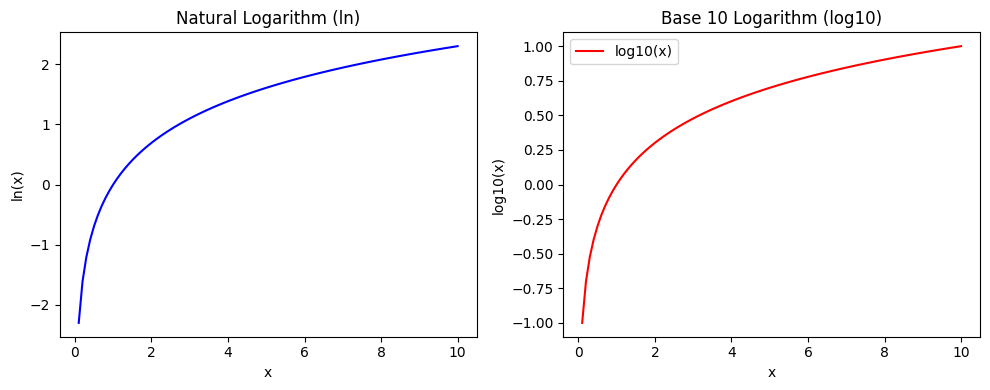

In [214]:
import numpy as np
import matplotlib.pyplot as plt

# Create a range of x values
x = np.linspace(0.1, 10, 100)  # Adjust the range as needed

# Calculate the natural logarithm (ln) and base 10 logarithm (log10) of x
ln_x = np.log(x)
log10_x = np.log10(x)

# Create a figure and subplots
plt.figure(figsize=(10, 4))

# Plot the natural logarithm (ln) graph
plt.subplot(1, 2, 1)
plt.plot(x, ln_x, label='ln(x)', color='blue')
plt.xlabel('x')
plt.ylabel('ln(x)')
plt.title('Natural Logarithm (ln)')

# Plot the base 10 logarithm (log10) graph
plt.subplot(1, 2, 2)
plt.plot(x, log10_x, label='log10(x)', color='red')
plt.xlabel('x')
plt.ylabel('log10(x)')
plt.title('Base 10 Logarithm (log10)')

# Show a legend for each subplot
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()


In [239]:
import math

try:
    result = math.log(7)
    print(result)
except ValueError as e:
    print("Error:", e)


1.9459101490553132


* DF Log-Log


In [231]:
numeric_fs_windsorized_df.columns


Index(['Weekly Trips (trips/week)', 'Hours Open (h)', 'Total Employees',
       'Total Area (m²)', 'Warehouse Area (m²)', 'Parking Minutes (min)',
       'Weekly Kilograms (kg/week)'],
      dtype='object')

In [344]:
numeric_fs_windsorized_df

Weekly Trips (trips/week)  Hours Open (h)  Total Employees  \
0                         5.00            14.0              1.0   
1                         5.00            18.0              2.0   
2                        21.50            15.0              5.0   
3                         1.00            12.0              4.5   
4                         5.00            10.0              7.0   
..                         ...             ...              ...   
261                       4.25             8.0              3.0   
262                       2.00             8.0              1.5   
263                      10.00            11.0              2.0   
264                       5.00            10.0              1.0   
265                       2.00            12.0              3.0   

     Total Area (m²)  Warehouse Area (m²)  Parking Minutes (min)  \
0              100.0              100.000              15.000000   
1              170.0              170.000               5.000000   
2              300.0              271.875              10.000000   
3               40.0                5.000               7.500000   
4              220.0              220.000              30.000000   
..               ...                  ...                    ...   
261             70.0               70.000               2.000000   
262             12.0                4.000              10.000000   
263             10.0                0.000               6.666667   
264             60.0               15.000               6.833333   
265              9.0                0.000               3.000000   

     Weekly Kilograms (kg/week)  
0                   6044.546875  
1                   6044.546875  
2                   6044.546875  
3                   6044.546875  
4                   5948.000000  
..                          ...  
261                   12.500000  
262                   12.000000  
263                   10.750000  
264                    9.500000  
265                    1.100000  

[266 rows x 7 columns]

* Be careful, only iterate once

In [377]:
#be careful, only iterate once

import pandas as pd
import numpy as np  # Import numpy for handling NaN values

# Assuming you have numeric_fs_windsorized_df DataFrame

# Define a function to apply the natural logarithm
def apply_ln(x):
    try:
        return np.log(x)
    except ValueError:
        return np.nan  # Handle NaN values for non-positive numbers

# Apply the natural logarithm to all numeric columns
log_log_df = numeric_fs_windsorized_df.applymap(apply_ln)






C:\Users\Carlos Granada\AppData\Local\Temp\ipykernel_37720\1111299198.py:11: RuntimeWarning: divide by zero encountered in log
  return np.log(x)


In [378]:
# Add 'ln' prefix to all columns in the DataFrame
log_log_df.columns = ['ln' + column for column in log_log_df.columns]


In [379]:
log_log_df.columns


Index(['lnWeekly Trips (trips/week)', 'lnHours Open (h)', 'lnTotal Employees',
       'lnTotal Area (m²)', 'lnWarehouse Area (m²)', 'lnParking Minutes (min)',
       'lnWeekly Kilograms (kg/week)'],
      dtype='object')

In [380]:
log_log_df

lnWeekly Trips (trips/week)  lnHours Open (h)  lnTotal Employees  \
0                       1.609438          2.639057           0.000000   
1                       1.609438          2.890372           0.693147   
2                       3.068053          2.708050           1.609438   
3                       0.000000          2.484907           1.504077   
4                       1.609438          2.302585           1.945910   
..                           ...               ...                ...   
261                     1.446919          2.079442           1.098612   
262                     0.693147          2.079442           0.405465   
263                     2.302585          2.397895           0.693147   
264                     1.609438          2.302585           0.000000   
265                     0.693147          2.484907           1.098612   

     lnTotal Area (m²)  lnWarehouse Area (m²)  lnParking Minutes (min)  \
0             4.605170               4.605170                 2.708050   
1             5.135798               5.135798                 1.609438   
2             5.703782               5.605342                 2.302585   
3             3.688879               1.609438                 2.014903   
4             5.393628               5.393628                 3.401197   
..                 ...                    ...                      ...   
261           4.248495               4.248495                 0.693147   
262           2.484907               1.386294                 2.302585   
263           2.302585                   -inf                 1.897120   
264           4.094345               2.708050                 1.921813   
265           2.197225                   -inf                 1.098612   

     lnWeekly Kilograms (kg/week)  
0                        8.706912  
1                        8.706912  
2                        8.706912  
3                        8.706912  
4                        8.690810  
..                            ...  
261                      2.525729  
262                      2.484907  
263                      2.374906  
264                      2.251292  
265                      0.095310  

[266 rows x 7 columns]

* Cleaned values

In [349]:
import numpy as np

# Create a dictionary to store cleaned values and their original indices for each column
log_log_dict = {}

# Iterate through columns
for col in log_log_df.columns:
    # Extract NaN and -inf values from the column
    nan_mask = np.isnan(log_log_df[col])
    neg_inf_mask = np.isneginf(log_log_df[col])

    # Get the values that are not NaN or -inf
    cleaned_col_values = log_log_df[col][~(nan_mask | neg_inf_mask)]

    # Get the original indices of the cleaned values
    original_indices = np.where(~(nan_mask | neg_inf_mask))[0]

    # Store the cleaned values and their original indices in a dictionary
    log_log_dict[col] = {'values': cleaned_col_values, 'indices': original_indices}


* Log-Log dict to model

In [350]:
log_log_dict

{'lnWeekly Trips (trips/week)': {'values': 0      1.609438
  1      1.609438
  2      3.068053
  3      0.000000
  4      1.609438
           ...   
  261    1.446919
  262    0.693147
  263    2.302585
  264    1.609438
  265    0.693147
  Name: lnWeekly Trips (trips/week), Length: 266, dtype: float64,
  'indices': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
          13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
          26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
          39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
          52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
          65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
          78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
          91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
         104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
         117, 118,

## Employement based

* Sorting by F-Statistic

In [351]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import itertools

# Function to extract matching values for a given combination
def extract_matching_values(keys, matching_indices, log_log_dict):
    matching_values = {}
    for key in keys:
        values = [log_log_dict[key]['values'][index] for index in matching_indices]
        matching_values[key] = values
    return matching_values

# Define the keys to combine
keys_to_combine = [
    'lnHours Open (h)', 'lnTotal Employees', 'lnWarehouse Area (m²)',
    'lnParking Minutes (min)', 'lnWeekly Kilograms (kg/week)'
]

# Generate all possible combinations of keys including 'Weekly Trips (trips/week)'
matching_combinations = [keys for i in range(1, len(keys_to_combine) + 1) for keys in itertools.combinations(keys_to_combine, i)]
matching_combinations = [('lnWeekly Trips (trips/week)',) + combo for combo in matching_combinations]

# Create a list to store matching combinations and matching indices
matching_data_log_log_employee = []

# Iterate through the combinations and check for matching indices
for i, combo in enumerate(matching_combinations):
    # Extract indices for each key in the combination
    indices_for_keys = [log_log_dict[key]['indices'] for key in combo]

    # Find the intersection of indices to identify matching indices
    matching_indices = set(indices_for_keys[0]).intersection(*indices_for_keys)

    # Check if there are matching indices
    if matching_indices:
        matching_data_log_log_employee.append((i + 1, combo, matching_indices))

# Create a DataFrame from the matching data
ln_ln_models_df_employee = pd.DataFrame(matching_data_log_log_employee, columns=['Combination', 'Keys', 'Matching Indices'])

# Create a dictionary to store matching values for each key
matching_values_log_log_dict_employee = {}

# Iterate through the matching combinations
for _, row in ln_ln_models_df_employee.iterrows():
    combination = row['Combination']
    keys_in_combination = row['Keys']
    matching_indices = row['Matching Indices']
    matching_values_log_log_dict_employee[combination] = extract_matching_values(keys_in_combination, matching_indices, log_log_dict)

# Create a list to store model information
model_ln_ln_info_employee = []

# Iterate through the matching combinations and their values
for combination, values in matching_values_log_log_dict_employee.items():

    # Define your dependent variable (target)
    y = values['lnWeekly Trips (trips/week)']

    # Create a DataFrame for independent variables (features)
    X = pd.DataFrame(values)

    # Drop the target variable from X
    X = X.drop(columns=['lnWeekly Trips (trips/week)'])

    # Check if 'lnHours Open (h)' and 'lnTotal Employees' are in the model
    if 'lnHours Open (h)' not in keys_in_combination and 'lnTotal Employees' not in keys_in_combination:
        # Add a constant term (intercept) to the independent variables
        X = sm.add_constant(X)

    try:
        # Fit the OLS model
        model = sm.OLS(y, X).fit()

        # Check if all t-values are greater than 1.96 in absolute value
        if all(abs(model.tvalues) > 1.96):
            # Calculate RMSE
            predicted_values = model.predict(X)
            rmse = np.sqrt(np.mean((y - predicted_values) ** 2))

            # Append RMSE, model summary, and F-statistics to the list
            model_ln_ln_info_employee.append((combination, rmse, model.summary(), model.fvalue))
    except Exception as e:
        print(f"Error for combo {combination}: {str(e)}")

# Sort the models by F-statistics in descending order
model_ln_ln_info_employee.sort(key=lambda x: x[3], reverse=True)

# Print the summaries for selected models
for combo, rmse, summary, f_value in model_ln_ln_info_employee:
    print(f"Independent Variables: {combo}")
    print(f"RMSE: {rmse}")
    print(f"F-statistics: {f_value}")
    print(summary)
    print("-" * 80)

Independent Variables: 1
RMSE: 0.8555144953508029
F-statistics: 868.8822650707704
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.766
Model:                            OLS   Adj. R-squared (uncentered):              0.765
Method:                 Least Squares   F-statistic:                              868.9
Date:                Sat, 07 Oct 2023   Prob (F-statistic):                    1.25e-85
Time:                        16:43:27   Log-Likelihood:                         -335.93
No. Observations:                 266   AIC:                                      673.9
Df Residuals:                     265   BIC:                                      677.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err

# Process to consolidate the models selected

* Hours open + Total Area

In [408]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Define your dependent variable (target) and independent variables (features)
y = log_log_df['lnWeekly Trips (trips/week)']
X = log_log_df[['lnHours Open (h)', 'lnTotal Area (m²)']]  # Change the variable here

# Fit the OLS model
model_3 = sm.OLS(y, X).fit()

print(model_3.summary())

# Make predictions
y_pred = model_3.predict(X)

# Calculate the residuals
residuals_3 = y - y_pred

# Perform the Shapiro-Wilk test
statistic, p_value = shapiro(residuals_3)
# Interpret the results
alpha = 0.05  # Set your significance level (e.g., 0.05)

if p_value > alpha:
    print("Residuals appear to be normally distributed (fail to reject null hypothesis)")

    # Calculate the Mean Squared Error (MSE)
    squared_residuals = residuals_3**2
    mse = np.mean(squared_residuals)
    print(f"Mean Squared Error (MSE): {mse:.6f}")
else:
    print("Residuals do not appear to be normally distributed (reject null hypothesis)")

    # Calculate the mean of the residuals
    mean_residuals = np.mean(residuals_3)
    print(f"Mean of Residuals: {mean_residuals:.6f}")


                                     OLS Regression Results                                     
Dep. Variable:     lnWeekly Trips (trips/week)   R-squared (uncentered):                   0.774
Model:                                     OLS   Adj. R-squared (uncentered):              0.772
Method:                          Least Squares   F-statistic:                              451.9
Date:                         Sat, 07 Oct 2023   Prob (F-statistic):                    5.76e-86
Time:                                 22:18:43   Log-Likelihood:                         -331.51
No. Observations:                          266   AIC:                                      667.0
Df Residuals:                              264   BIC:                                      674.2
Df Model:                                    2                                                  
Covariance Type:                     nonrobust                                                  
                        coef  

                                     OLS Regression Results                                     
Dep. Variable:     lnWeekly Trips (trips/week)   R-squared (uncentered):                   0.774
Model:                                     OLS   Adj. R-squared (uncentered):              0.772
Method:                          Least Squares   F-statistic:                              451.9
Date:                         Sat, 07 Oct 2023   Prob (F-statistic):                    5.76e-86
Time:                                 22:19:39   Log-Likelihood:                         -331.51
No. Observations:                          266   AIC:                                      667.0
Df Residuals:                              264   BIC:                                      674.2
Df Model:                                    2                                                  
Covariance Type:                     nonrobust                                                  
                        coef  

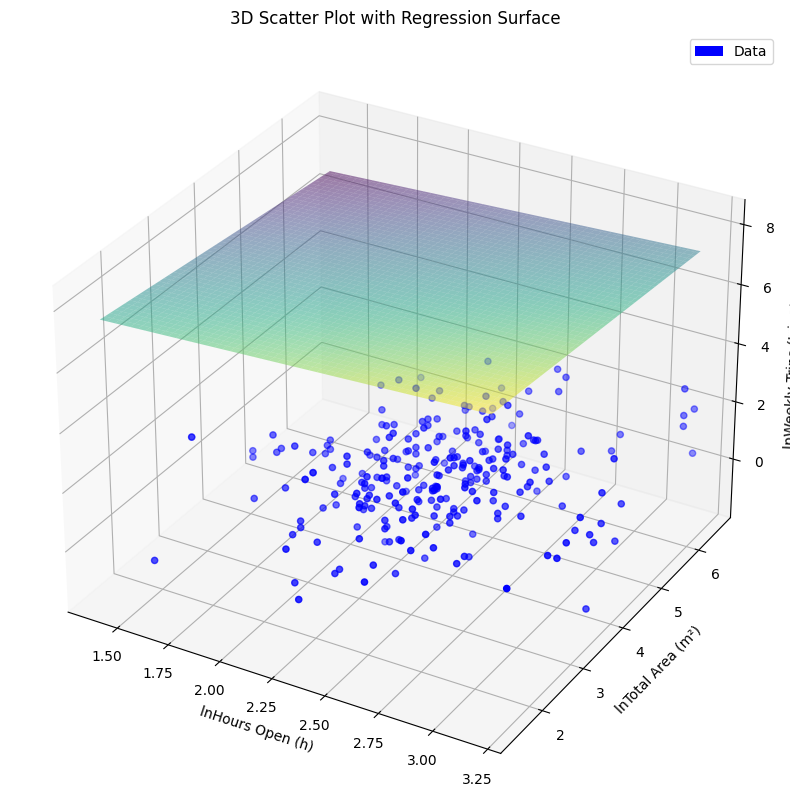

In [410]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Define your dependent variable (target) and independent variables (features)
y = log_log_df['lnWeekly Trips (trips/week)']
X = log_log_df[['lnHours Open (h)', 'lnTotal Area (m²)']]  # Change the variable here

# Fit the OLS model
model_3 = sm.OLS(y, X).fit()

print(model_3.summary())

# Make predictions
y_pred = model_3.predict(X)

# Calculate the residuals
residuals_3 = y - y_pred

# Perform the Shapiro-Wilk test
statistic, p_value = shapiro(residuals_3)
# Interpret the results
alpha = 0.05  # Set your significance level (e.g., 0.05)

if p_value > alpha:
    print("Residuals appear to be normally distributed (fail to reject null hypothesis)")

    # Calculate the Mean Squared Error (MSE)
    squared_residuals = residuals_3**2
    mse = np.mean(squared_residuals)
    print(f"Mean Squared Error (MSE): {mse:.6f}")
else:
    print("Residuals do not appear to be normally distributed (reject null hypothesis)")

    # Calculate the mean of the residuals
    mean_residuals = np.mean(residuals_3)
    print(f"Mean of Residuals: {mean_residuals:.6f}")


# Create a meshgrid for the independent variables
x1 = np.linspace(X['lnHours Open (h)'].min(), X['lnHours Open (h)'].max(), 100)
x2 = np.linspace(X['lnTotal Area (m²)'].min(), X['lnTotal Area (m²)'].max(), 100)
X1, X2 = np.meshgrid(x1, x2)
X_mesh = sm.add_constant(np.column_stack((X1.ravel(), X2.ravel())))
Y_pred = model_10.predict(X_mesh)

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 10))  # Adjust the figure size here
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
scatter = ax.scatter(X['lnHours Open (h)'], X['lnTotal Area (m²)'], y, label='Data', c='blue')

# Create a proxy artist for the legend
proxy = plt.Rectangle((0, 0), 1, 1, fc="b")

# Add the proxy artist to the legend manually
ax.legend([proxy], ["Data"])

# Plot the regression surface
surf = ax.plot_surface(X1, X2, Y_pred.reshape(X1.shape), alpha=0.5, cmap='viridis')

# Set axis labels
ax.set_xlabel('lnHours Open (h)')
ax.set_ylabel('lnTotal Area (m²)')
ax.set_zlabel('lnWeekly Trips (trips/week)')

# Set plot title
plt.title('3D Scatter Plot with Regression Surface')

plt.show()




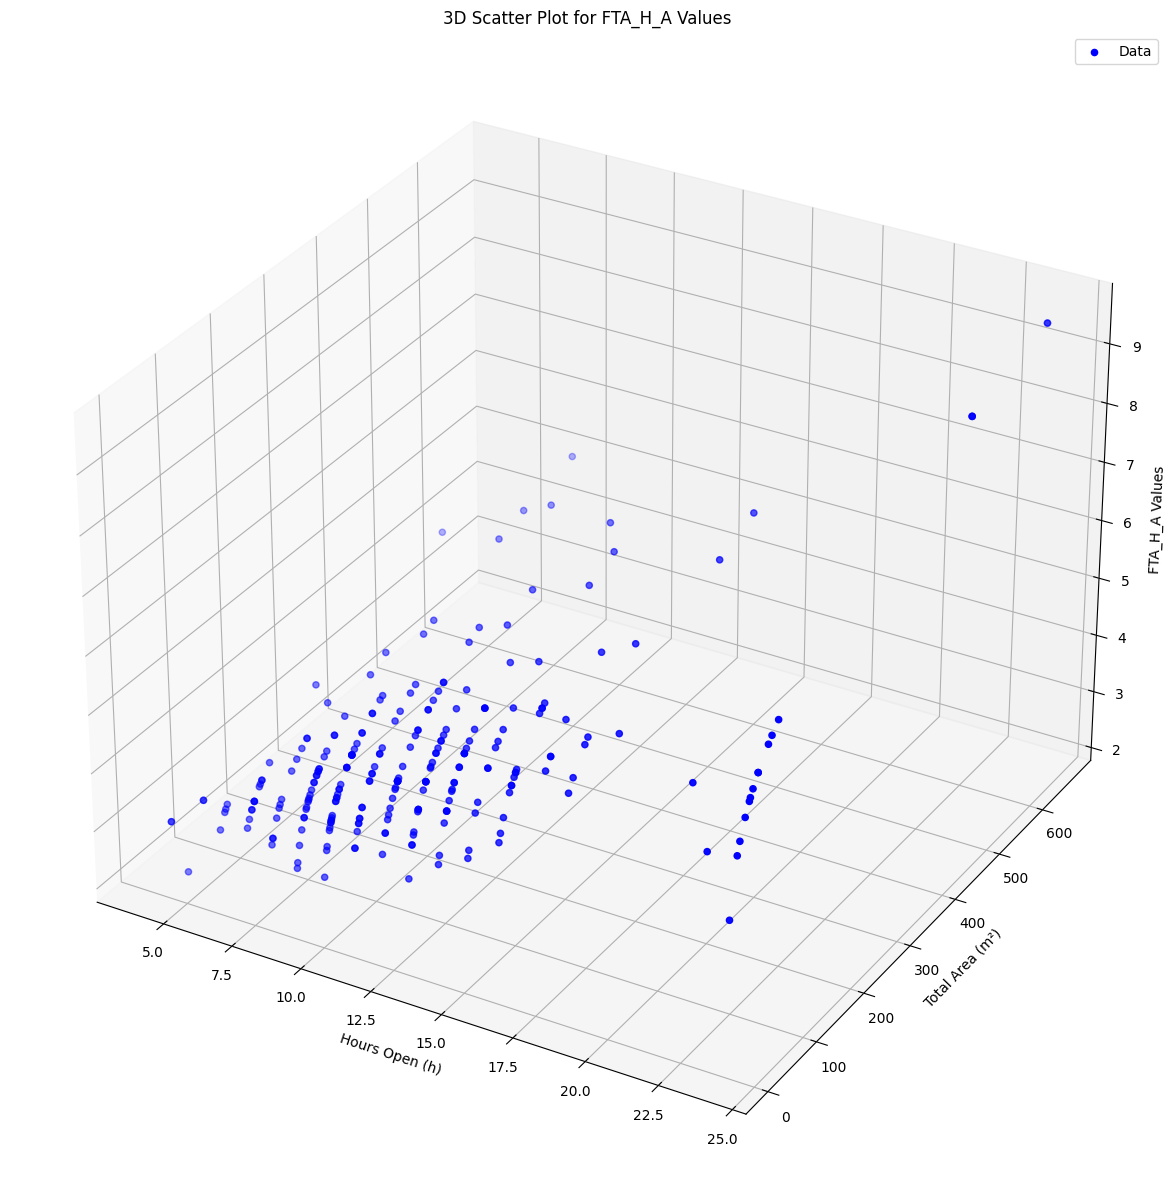

In [415]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import Axes3D for 3D plotting
import numpy as np
import math

# Define the new FTA function
def FTA_H_A(hours_open, total_area):
    coefficient_1 = 0.370
    coefficient_2 = 0.164
    exponent = 0.007
    return (hours_open ** coefficient_1) * (total_area ** coefficient_2) * math.exp(exponent)

# Calculate FTA_H_A values for 'Hours Open (h)' and 'Total Area (m²)'
model_3_df = numeric_fs_windsorized_df.copy()  # Create a copy of the DataFrame

# Add 'FTA_H_A' column to the DataFrame using the new function
model_3_df['FTA_H_A'] = model_3_df.apply(lambda row: FTA_H_A(row['Hours Open (h)'], row['Total Area (m²)']), axis=1)

# Create a 3D scatter plot
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
scatter = ax.scatter(model_3_df['Hours Open (h)'], model_3_df['Total Area (m²)'], model_3_df['FTA_H_A'],
                     label='Data', c='blue')

# Set axis labels
ax.set_xlabel('Hours Open (h)')
ax.set_ylabel('Total Area (m²)')
ax.set_zlabel('FTA_H_A Values')

# Set plot title
plt.title('3D Scatter Plot for FTA_H_A Values')
plt.legend()
plt.grid(True)

plt.show()


* Model ln total area

Residuals do not appear to be normally distributed (reject null hypothesis)
Mean of Residuals: 0.05
Root Mean Squared Error (RMSE): 0.87


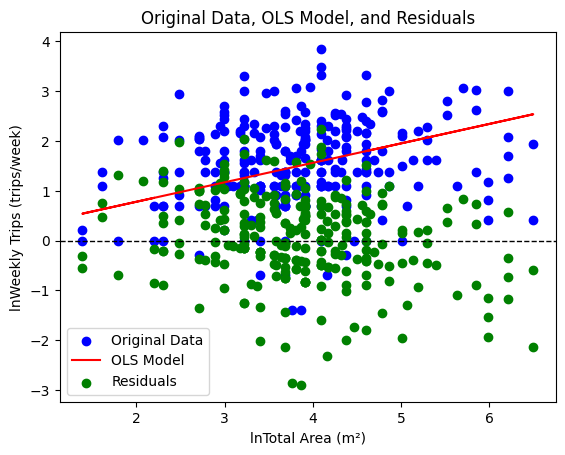

In [394]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt  # Import the matplotlib.pyplot module

# Define your dependent variable (target) and independent variables (features)
y = log_log_df['lnWeekly Trips (trips/week)']
X = log_log_df[['lnTotal Area (m²)']]  # Change the variable here

# Fit the OLS model
model_2 = sm.OLS(y, X).fit()

# Make predictions
y_pred = model_2.predict(X)

# Calculate the residuals
residuals_2 = y - y_pred

# Perform the Shapiro-Wilk test
statistic, p_value = shapiro(residuals_2)

# Interpret the results
alpha = 0.05  # Set your significance level (e.g., 0.05)

if p_value > alpha:
    print("Residuals appear to be normally distributed (fail to reject null hypothesis)")

    # Calculate the Mean Squared Error (MSE)
    squared_residuals = residuals_2**2
    mse = np.mean(squared_residuals)
    print(f"Mean Squared Error (MSE): {mse:.2f}")
else:
    print("Residuals do not appear to be normally distributed (reject null hypothesis)")

    # Calculate the mean of the residuals
    mean_residuals = np.mean(residuals_2)
    print(f"Mean of Residuals: {mean_residuals:.2f}")

# Calculate RMSE
rmse = np.sqrt(np.mean((y - y_pred) ** 2))
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Create a scatter plot of the original values
plt.scatter(X['lnTotal Area (m²)'], y, label='Original Data', color='blue')  # Change the variable here

# Create a line plot for the predicted values (model)
plt.plot(X['lnTotal Area (m²)'], y_pred, label='OLS Model', color='red')  # Change the variable here

# Create a scatter plot of the residuals
plt.scatter(X['lnTotal Area (m²)'], residuals_2, label='Residuals', color='green')  # Change the variable here

# Add a horizontal line at y=0 to indicate the zero residual line
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Add legends
plt.legend()

# Set plot labels
plt.xlabel('lnTotal Area (m²)')  # Change the variable here
plt.ylabel('lnWeekly Trips (trips/week)')

# Set plot title
plt.title('Original Data, OLS Model, and Residuals')

# Show the plot
plt.show()

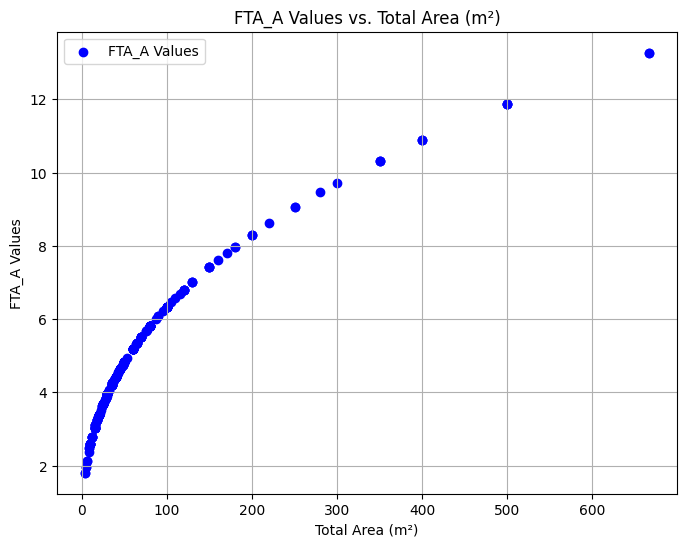

In [396]:
import matplotlib.pyplot as plt
import math
import numpy as np

# Define the new FTA function
def FTA_A(total_area):
    coefficient = 0.390
    exponent = 0.05
    return (total_area ** coefficient) * math.exp(exponent)

# Calculate FTA values for 'Total Area (m²)'
model_2_df = numeric_fs_windsorized_df.copy()  # Create a copy of the DataFrame

# Add 'FTA' column to the DataFrame
model_2_df['FTA_A'] = model_2_df['Total Area (m²)'].apply(FTA_A)

# Create a scatter plot of 'FTA' values only in blue
plt.figure(figsize=(8, 6))
plt.scatter(model_2_df['Total Area (m²)'], model_2_df['FTA_A'], label='FTA_A Values', color='blue', marker='o')
plt.xlabel('Total Area (m²)')
plt.ylabel('FTA_A Values')
plt.legend()
plt.title('FTA_A Values vs. Total Area (m²)')
plt.grid(True)
plt.show()


* Model lnhours open

Residuals do not appear to be normally distributed (reject null hypothesis)
Mean of Residuals: 0.01
Root Mean Squared Error (RMSE): 0.86


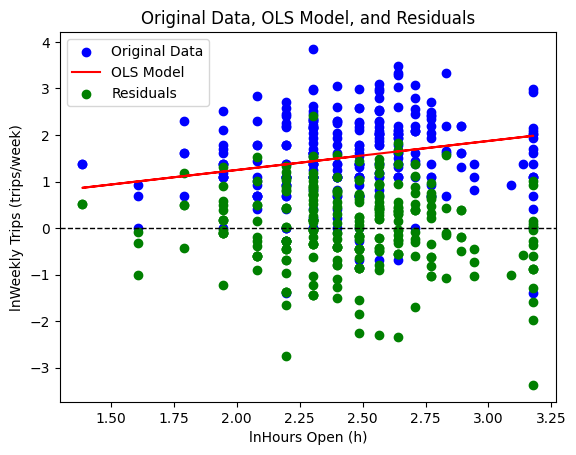

In [387]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt  # Import the matplotlib.pyplot module

# Define your dependent variable (target) and independent variables (features)
y = log_log_df['lnWeekly Trips (trips/week)']
X = log_log_df[['lnHours Open (h)']]  # Change the variable here

# Fit the OLS model
model_1 = sm.OLS(y, X).fit()

# Make predictions
y_pred = model_1.predict(X)

# Calculate the residuals
residuals_1 = y - y_pred

# Perform the Shapiro-Wilk test
statistic, p_value = shapiro(residuals_1)

# Interpret the results
alpha = 0.05  # Set your significance level (e.g., 0.05)

if p_value > alpha:
    print("Residuals appear to be normally distributed (fail to reject null hypothesis)")

    # Calculate the Mean Squared Error (MSE)
    squared_residuals = residuals_1**2
    mse = np.mean(squared_residuals)
    print(f"Mean Squared Error (MSE): {mse:.2f}")
else:
    print("Residuals do not appear to be normally distributed (reject null hypothesis)")

    # Calculate the mean of the residuals
    mean_residuals = np.mean(residuals_1)
    print(f"Mean of Residuals: {mean_residuals:.2f}")

# Calculate RMSE
rmse = np.sqrt(np.mean((y - y_pred) ** 2))
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Create a scatter plot of the original values
plt.scatter(X['lnHours Open (h)'], y, label='Original Data', color='blue')  # Change the variable here

# Create a line plot for the predicted values (model)
plt.plot(X['lnHours Open (h)'], y_pred, label='OLS Model', color='red')  # Change the variable here

# Create a scatter plot of the residuals
plt.scatter(X['lnHours Open (h)'], residuals_1, label='Residuals', color='green')  # Change the variable here

# Add a horizontal line at y=0 to indicate the zero residual line
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Add legends
plt.legend()

# Set plot labels
plt.xlabel('lnHours Open (h)')  # Change the variable here
plt.ylabel('lnWeekly Trips (trips/week)')

# Set plot title
plt.title('Original Data, OLS Model, and Residuals')

# Show the plot
plt.show()


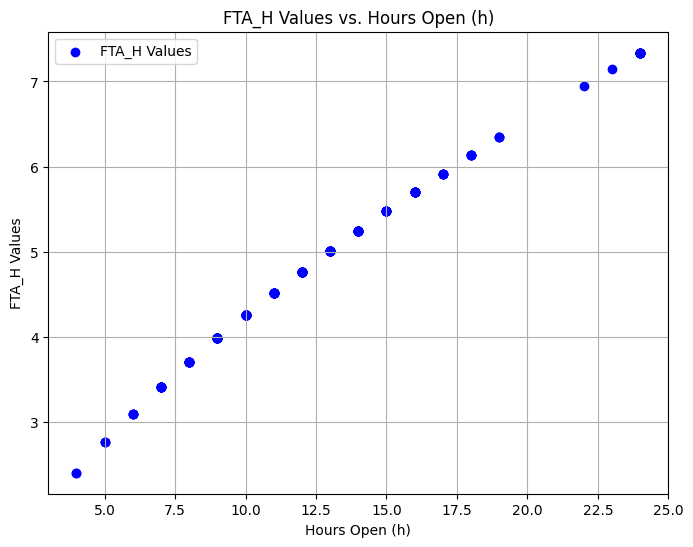

In [397]:
import matplotlib.pyplot as plt
import math
import numpy as np

# Define the FTA function
def FTA_H(hours_open):
    coefficient = 0.624
    exponent = 0.01
    return (hours_open ** coefficient) * math.exp(exponent)

# Calculate FTA values for 'Hours Open (h)'
model_1_df = numeric_fs_windsorized_df.copy()  # Create a copy of the DataFrame

# Add 'FTA' column to the DataFrame
model_1_df['FTA_H'] = model_1_df['Hours Open (h)'].apply(FTA_H)

# Create a scatter plot of 'FTA' values only in blue
plt.figure(figsize=(8, 6))
plt.scatter(model_1_df['Hours Open (h)'], model_1_df['FTA_H'], label='FTA_H Values', color='blue', marker='o')
plt.xlabel('Hours Open (h)')
plt.ylabel('FTA_H Values')
plt.legend()
plt.title('FTA_H Values vs. Hours Open (h)')
plt.grid(True)
plt.show()


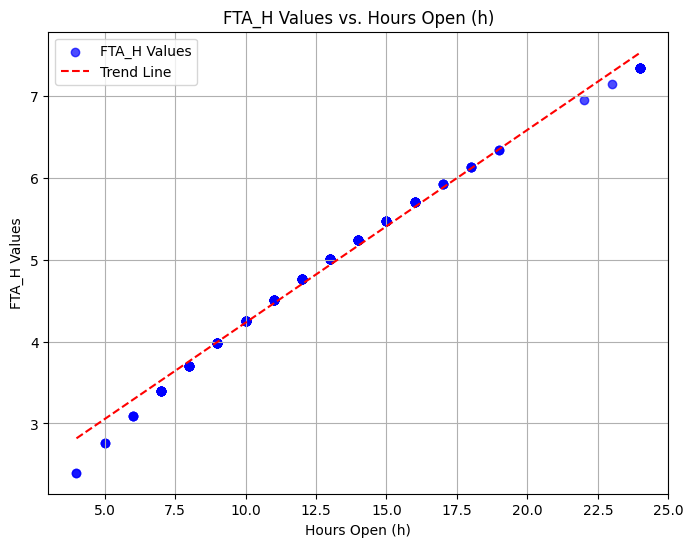

In [398]:
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.stats import linregress

# Define the FTA function
def FTA_H(hours_open):
    coefficient = 0.624
    exponent = 0.01
    return (hours_open ** coefficient) * math.exp(exponent)

# Calculate FTA values for 'Hours Open (h)'
model_1_df = numeric_fs_windsorized_df.copy()  # Create a copy of the DataFrame

# Add 'FTA' column to the DataFrame
model_1_df['FTA_H'] = model_1_df['Hours Open (h)'].apply(FTA_H)

# Create a scatter plot of 'FTA' values only in blue
plt.figure(figsize=(8, 6))
plt.scatter(model_1_df['Hours Open (h)'], model_1_df['FTA_H'], label='FTA_H Values', color='blue', marker='o', alpha=0.7)
plt.xlabel('Hours Open (h)')
plt.ylabel('FTA_H Values')
plt.legend()

# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = linregress(model_1_df['Hours Open (h)'], model_1_df['FTA_H'])
x_range = np.array([min(model_1_df['Hours Open (h)']), max(model_1_df['Hours Open (h)'])])
y_range = intercept + slope * x_range

# Plot the regression line in red
plt.plot(x_range, y_range, color='red', linestyle='--', label='Trend Line')

plt.title('FTA_H Values vs. Hours Open (h)')
plt.grid(True)
plt.legend()
plt.show()


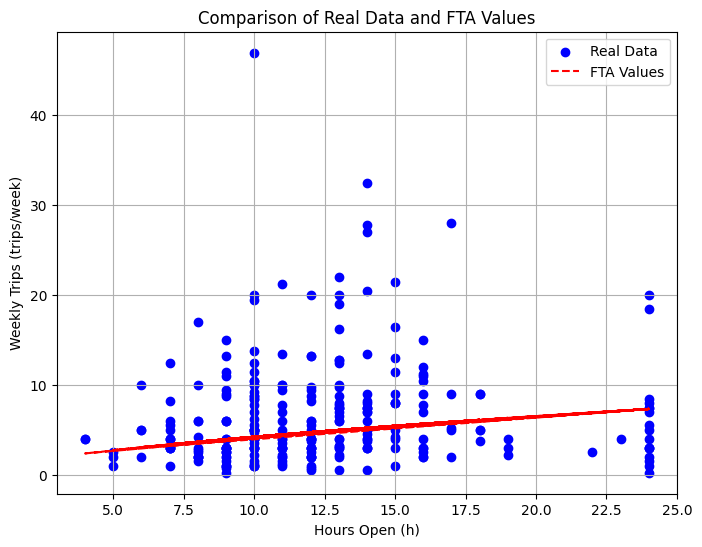

In [391]:
import matplotlib.pyplot as plt
import math
import numpy as np

# Define the FTA function
def FTA(hours_open):
    coefficient = 0.624
    exponent = 0.01
    return (hours_open ** coefficient) * math.exp(exponent)

# Calculate FTA values for 'Hours Open (h)'
model_1_df = numeric_fs_windsorized_df.copy()  # Create a copy of the DataFrame

# Add 'FTA' column to the DataFrame
model_1_df['FTA'] = model_1_df['Hours Open (h)'].apply(FTA)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(model_1_df['Hours Open (h)'], model_1_df['Weekly Trips (trips/week)'],
            label='Real Data', color='blue')
plt.plot(model_1_df['Hours Open (h)'], model_1_df['FTA'],
         label='FTA Values', color='red', linestyle='--')
plt.xlabel('Hours Open (h)')
plt.ylabel('Weekly Trips (trips/week)')
plt.legend()
plt.title('Comparison of Real Data and FTA Values')
plt.grid(True)
plt.show()


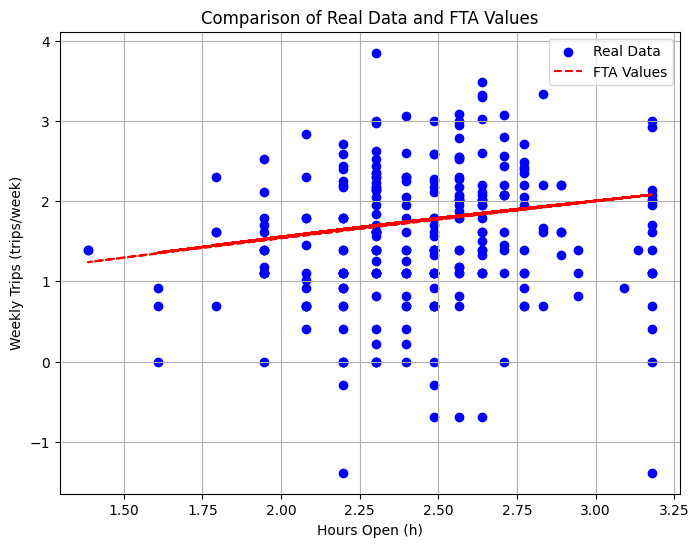

In [392]:

import matplotlib.pyplot as plt
import math
import numpy as np

# Define the FTA function
def FTA(hours_open):
    coefficient = 0.624
    exponent = 0.01
    return (hours_open ** coefficient) * math.exp(exponent)

# Calculate FTA values for 'Hours Open (h)'
model_1_df = log_log_df.copy()  # Create a copy of the DataFrame

# Add 'FTA' column to the DataFrame
model_1_df['FTA'] = model_1_df['lnHours Open (h)'].apply(FTA)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(model_1_df['lnHours Open (h)'], model_1_df['lnWeekly Trips (trips/week)'],
            label='Real Data', color='blue')
plt.plot(model_1_df['lnHours Open (h)'], model_1_df['FTA'],
         label='FTA Values', color='red', linestyle='--')
plt.xlabel('Hours Open (h)')
plt.ylabel('Weekly Trips (trips/week)')
plt.legend()
plt.title('Comparison of Real Data and FTA Values')
plt.grid(True)
plt.show()

In [ ]:
import math

def FTA(hours_open):
    coefficient = 0.624
    exponent = 0.01
    return (hours_open ** coefficient) * math.exp(exponent)

# Example usage:
hours_open = 10  # Replace with the actual value
result = FTA(hours_open)
print(result)


* Shapiro-wilk test to normality of the residuals in models selected

In [ ]:
from scipy.stats import shapiro

model_ln_ln_info_employee

independent_variable='lnHours Open (h)'
dependent_variable='lnWeekly Trips (trips/week)'


# Calculate the residuals
residuals = y_actual - y_pred  # Replace y_actual and y_pred with your actual and predicted values

# Perform the Shapiro-Wilk test
statistic, p_value = shapiro(residuals)

# Interpret the results
alpha = 0.05  # Set your significance level (e.g., 0.05)
if p_value > alpha:
    print("Residuals appear to be normally distributed (fail to reject null hypothesis)")
else:
    print("Residuals do not appear to be normally distributed (reject null hypothesis)")


* If residual data are normally distributed

In [ ]:
# Square each residual value
squared_residuals = residuals**2

# Calculate the Mean Squared Error (MSE)
mse = np.mean(squared_residuals)

print(f"Mean Squared Error (MSE): {mse:.2f}")


* If data are not normally distributed

In [ ]:
# Calculate the mean of the residuals
mean_residuals = np.mean(residuals)

print(f"Mean of Residuals: {mean_residuals:.2f}")


* Calculate error term of the model

In [ ]:
from scipy.stats import shapiro

# Calculate the residuals
residuals = y_actual - y_pred  # Replace y_actual and y_pred with your actual and predicted values

# Perform the Shapiro-Wilk test
statistic, p_value = shapiro(residuals)

# Interpret the results
alpha = 0.05  # Set your significance level (e.g., 0.05)

if p_value > alpha:
    print("Residuals appear to be normally distributed (fail to reject null hypothesis)")

    # Calculate the Mean Squared Error (MSE)
    squared_residuals = residuals**2
    mse = np.mean(squared_residuals)
    print(f"Mean Squared Error (MSE): {mse:.2f}")
else:
    print("Residuals do not appear to be normally distributed (reject null hypothesis)")

    # Calculate the mean of the residuals
    mean_residuals = np.mean(residuals)
    print(f"Mean of Residuals: {mean_residuals:.2f}")


* Bias correction to the model selected

In [388]:
import math

exponent = 0.01
result = math.exp(exponent)
print(result)  # Output: 20.085536923187668


1.010050167084168


In [286]:
import math

exponent = 0
result = math.exp(exponent)
print(result)  # Output: 20.085536923187668



# Apply constant adjustment (subtracting the average bias)
corrected_predictions = y_pred + average_bias

# Now, corrected_predictions contain the bias-corrected predictions


1.0


NameError: name 'average_bias' is not defined

* Some graphs

Root Mean Squared Error (RMSE): 0.88


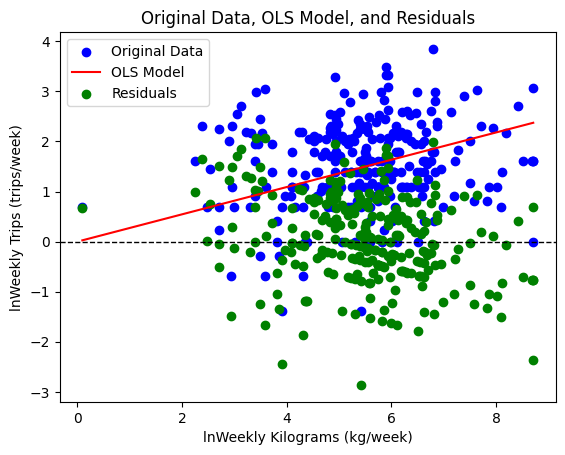

In [279]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Define your dependent variable (target) and independent variables (features)
y = log_log_df['lnWeekly Trips (trips/week)']
X = log_log_df[['lnWeekly Kilograms (kg/week)']]  # Adjust the variable name here

# Fit the OLS model
model_log_log_plot = sm.OLS(y, X).fit()

# Make predictions
y_pred = model_log_log_plot.predict(X)

# Calculate the residuals
residuals = y - y_pred

# Calculate mean squared error (MSE)
mse = np.mean(residuals**2)

# Calculate RMSE
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Create a scatter plot of the original values
plt.scatter(X['lnWeekly Kilograms (kg/week)'], y, label='Original Data', color='blue')  # Adjust the variable name here

# Create a line plot for the predicted values (model)
plt.plot(X['lnWeekly Kilograms (kg/week)'], y_pred, label='OLS Model', color='red')  # Adjust the variable name here

# Create a scatter plot of the residuals
plt.scatter(X['lnWeekly Kilograms (kg/week)'], residuals, label='Residuals', color='green')  # Adjust the variable name here

# Add a horizontal line at y=0 to indicate the zero residual line
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Add legends
plt.legend()

# Set plot labels
plt.xlabel('lnWeekly Kilograms (kg/week)')  # Adjust the variable name here
plt.ylabel('lnWeekly Trips (trips/week)')

# Set plot title
plt.title('Original Data, OLS Model, and Residuals')

# Show the plot
plt.show()


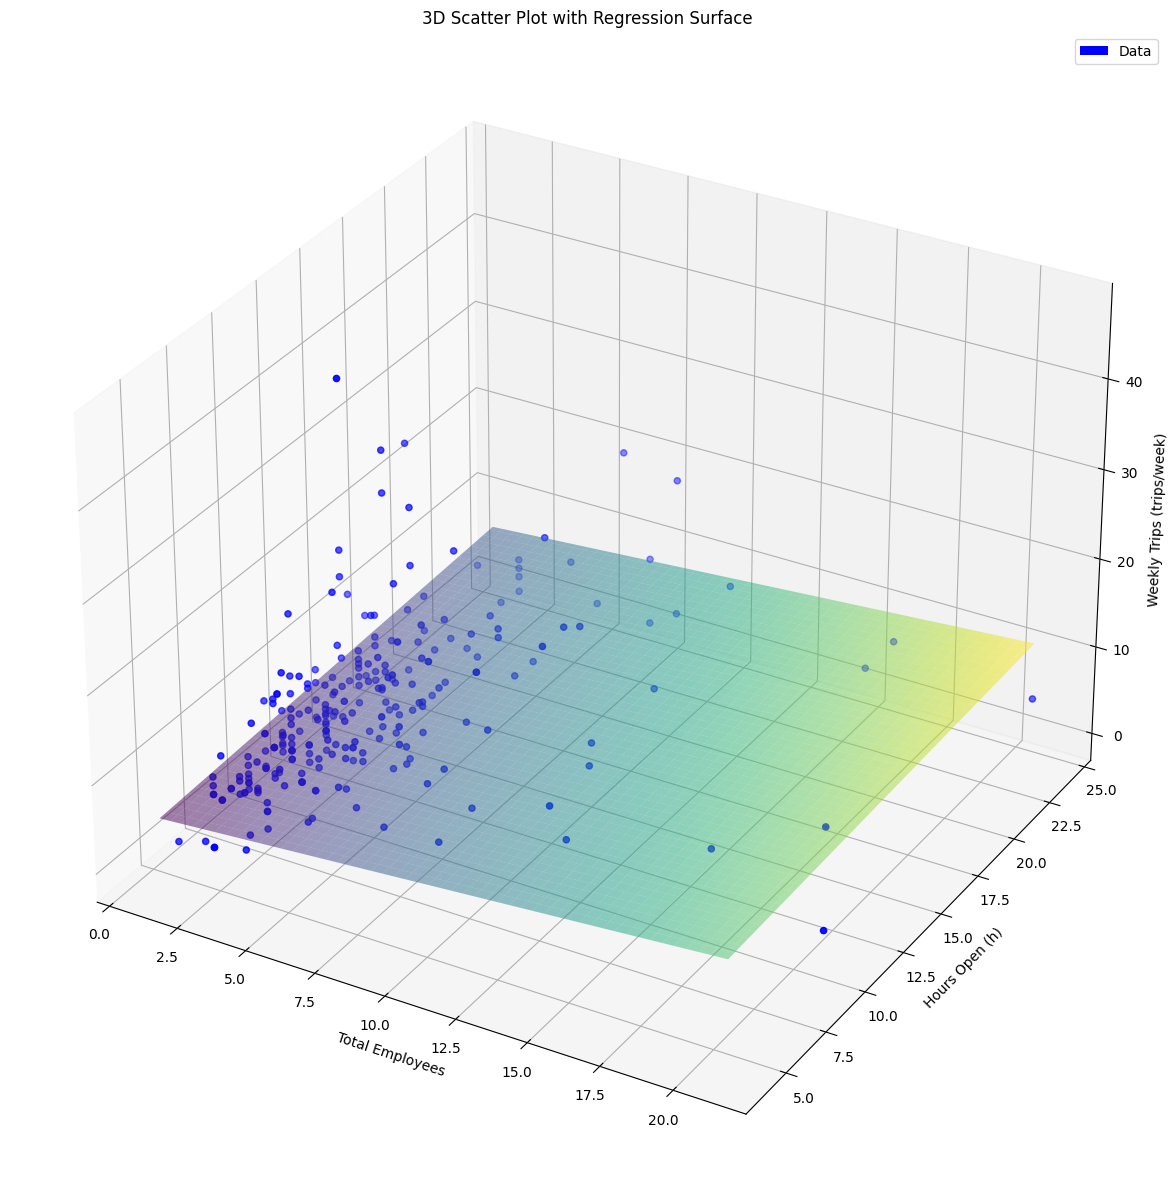

In [329]:
# Create a meshgrid for the independent variables
x1 = np.linspace(X['Total Employees'].min(), X['Total Employees'].max(), 100)
x2 = np.linspace(X['Hours Open (h)'].min(), X['Hours Open (h)'].max(), 100)
X1, X2 = np.meshgrid(x1, x2)
X_mesh = sm.add_constant(np.column_stack((X1.ravel(), X2.ravel())))
Y_pred = model_7.predict(X_mesh)

# Create a 3D scatter plot
fig = plt.figure(figsize=(20, 15))  # Adjust the figure size here
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
scatter = ax.scatter(X['Total Employees'], X['Hours Open (h)'], y, label='Data', c='blue')

# Create a proxy artist for the legend
proxy = plt.Rectangle((0, 0), 1, 1, fc="b")

# Add the proxy artist to the legend manually
ax.legend([proxy], ["Data"])

# Plot the regression surface
surf = ax.plot_surface(X1, X2, Y_pred.reshape(X1.shape), alpha=0.5, cmap='viridis')

# Set axis labels
ax.set_xlabel('Total Employees')
ax.set_ylabel('Hours Open (h)')
ax.set_zlabel('Weekly Trips (trips/week)')

# Set plot title
plt.title('3D Scatter Plot with Regression Surface')

plt.show()

Root Mean Squared Error (RMSE): 1.07


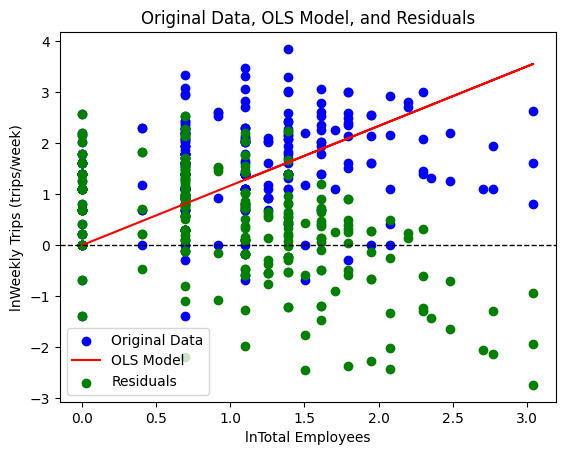

In [281]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Define your dependent variable (target) and independent variables (features)
y = log_log_df['lnWeekly Trips (trips/week)']
X = log_log_df[['lnTotal Employees']]  # Adjust the variable name here

# Fit the OLS model
model_log_log_plot = sm.OLS(y, X).fit()

# Make predictions
y_pred = model_log_log_plot.predict(X)

# Calculate the residuals
residuals = y - y_pred

# Calculate mean squared error (MSE)
mse = np.mean(residuals**2)

# Calculate RMSE
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Create a scatter plot of the original values
plt.scatter(X['lnTotal Employees'], y, label='Original Data', color='blue')  # Adjust the variable name here

# Create a line plot for the predicted values (model)
plt.plot(X['lnTotal Employees'], y_pred, label='OLS Model', color='red')  # Adjust the variable name here

# Create a scatter plot of the residuals
plt.scatter(X['lnTotal Employees'], residuals, label='Residuals', color='green')  # Adjust the variable name here

# Add a horizontal line at y=0 to indicate the zero residual line
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Add legends
plt.legend()

# Set plot labels
plt.xlabel('lnTotal Employees')  # Adjust the variable name here
plt.ylabel('lnWeekly Trips (trips/week)')

# Set plot title
plt.title('Original Data, OLS Model, and Residuals')

# Show the plot
plt.show()

# Area based

In [282]:
log_log_df.columns

Index(['lnWeekly Trips (trips/week)', 'lnHours Open (h)', 'lnTotal Employees',
       'lnTotal Area (m²)', 'lnWarehouse Area (m²)', 'lnParking Minutes (min)',
       'lnWeekly Kilograms (kg/week)'],
      dtype='object')

In [353]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import itertools

# Function to extract matching values for a given combination
def extract_matching_values(keys, matching_indices, log_log_dict):
    matching_values = {}
    for key in keys:
        values = [log_log_dict[key]['values'][index] for index in matching_indices]
        matching_values[key] = values
    return matching_values

# Define the keys to combine
keys_to_combine = [    'lnHours Open (h)',  'lnTotal Area (m²)', 'lnWarehouse Area (m²)',
    'lnParking Minutes (min)', 'lnWeekly Kilograms (kg/week)']

# Generate all possible combinations of keys including 'Weekly Trips (trips/week)'
matching_combinations = [keys for i in range(1, len(keys_to_combine) + 1) for keys in itertools.combinations(keys_to_combine, i)]
matching_combinations = [('lnWeekly Trips (trips/week)',) + combo for combo in matching_combinations]

# Create a list to store matching combinations and matching indices
matching_data_log_log_area = []

# Iterate through the combinations and check for matching indices
for i, combo in enumerate(matching_combinations):
    # Extract indices for each key in the combination
    indices_for_keys = [log_log_dict[key]['indices'] for key in combo]

    # Find the intersection of indices to identify matching indices
    matching_indices = set(indices_for_keys[0]).intersection(*indices_for_keys)

    # Check if there are matching indices
    if matching_indices:
        matching_data_log_log_area.append((i + 1, combo, matching_indices))

# Create a DataFrame from the matching data
ln_ln_models_df_area = pd.DataFrame(matching_data_log_log_area, columns=['Combination', 'Keys', 'Matching Indices'])

# Create a dictionary to store matching values for each key
matching_values_log_log_dict_area = {}

# Iterate through the matching combinations
for _, row in ln_ln_models_df_area.iterrows():
    combination = row['Combination']
    keys_in_combination = row['Keys']
    matching_indices = row['Matching Indices']

    matching_values_log_log_dict_area[combination] = extract_matching_values(keys_in_combination, matching_indices, log_log_dict)

# Create a list to store model information
model_ln_ln_info_area = []

# Iterate through the matching combinations and their values
for combination, values in matching_values_log_log_dict_area.items():

    # Define your dependent variable (target)
    y = values['lnWeekly Trips (trips/week)']

    # Create a DataFrame for independent variables (features)
    X = pd.DataFrame(values)

    # Drop the target variable from X
    X = X.drop(columns=['lnWeekly Trips (trips/week)'])

    # Check if 'lnHours Open (h)' and 'lnTotal Employees' are in the model
    if 'lnHours Open (h)' not in keys_in_combination and 'lnTotal Area (m²)' not in keys_in_combination:
        # Add a constant term (intercept) to the independent variables
        X = sm.add_constant(X)

    try:
        # Fit the OLS model
        model = sm.OLS(y, X).fit()

        # Check if all t-values are greater than 1.96 in absolute value
        if all(abs(model.tvalues) > 1.96):
            # Calculate RMSE
            predicted_values = model.predict(X)
            rmse = np.sqrt(np.mean((y - predicted_values) ** 2))

            # Append RMSE, model summary, and F-statistics to the list
            model_ln_ln_info_area.append((combination, rmse, model.summary(), model.fvalue))
    except Exception as e:
        print(f"Error for combo {combination}: {str(e)}")

# Sort the models by F-statistics in descending order
model_ln_ln_info_area.sort(key=lambda x: x[3], reverse=True)

# Print the summaries for selected models
for combo, rmse, summary, f_value in model_ln_ln_info_area:
    print(f"Independent Variables: {combo}")
    print(f"RMSE: {rmse}")
    print(f"F-statistics: {f_value}")
    print(summary)
    print("-" * 80)

Independent Variables: 1
RMSE: 0.8555144953508029
F-statistics: 868.8822650707704
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.766
Model:                            OLS   Adj. R-squared (uncentered):              0.765
Method:                 Least Squares   F-statistic:                              868.9
Date:                Sat, 07 Oct 2023   Prob (F-statistic):                    1.25e-85
Time:                        16:52:26   Log-Likelihood:                         -335.93
No. Observations:                 266   AIC:                                      673.9
Df Residuals:                     265   BIC:                                      677.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err

# Models lin-log

In [354]:
numeric_fs_windsorized_df.columns

Index(['Weekly Trips (trips/week)', 'Hours Open (h)', 'Total Employees',
       'Total Area (m²)', 'Warehouse Area (m²)', 'Parking Minutes (min)',
       'Weekly Kilograms (kg/week)'],
      dtype='object')

In [364]:
numeric_fs_windsorized_df

Weekly Trips (trips/week)  Hours Open (h)  Total Employees  \
0                         5.00            14.0              1.0   
1                         5.00            18.0              2.0   
2                        21.50            15.0              5.0   
3                         1.00            12.0              4.5   
4                         5.00            10.0              7.0   
..                         ...             ...              ...   
261                       4.25             8.0              3.0   
262                       2.00             8.0              1.5   
263                      10.00            11.0              2.0   
264                       5.00            10.0              1.0   
265                       2.00            12.0              3.0   

     Total Area (m²)  Warehouse Area (m²)  Parking Minutes (min)  \
0              100.0              100.000              15.000000   
1              170.0              170.000               5.000000   
2              300.0              271.875              10.000000   
3               40.0                5.000               7.500000   
4              220.0              220.000              30.000000   
..               ...                  ...                    ...   
261             70.0               70.000               2.000000   
262             12.0                4.000              10.000000   
263             10.0                0.000               6.666667   
264             60.0               15.000               6.833333   
265              9.0                0.000               3.000000   

     Weekly Kilograms (kg/week)  
0                   6044.546875  
1                   6044.546875  
2                   6044.546875  
3                   6044.546875  
4                   5948.000000  
..                          ...  
261                   12.500000  
262                   12.000000  
263                   10.750000  
264                    9.500000  
265                    1.100000  

[266 rows x 7 columns]

* Apply ln to the first column Be careful, made only once

In [365]:
import pandas as pd
import numpy as np

# Assuming you have numeric_fs_windsorized_df DataFrame

# Define a function to apply the natural logarithm
def apply_ln(x):
    try:
        return np.log(x)
    except ValueError:
        return np.nan  # Handle NaN values for non-positive numbers

# Apply the natural logarithm to the first column only
log_lin_df = numeric_fs_windsorized_df.copy()  # Create a copy of the original DataFrame
log_lin_df.iloc[:, 0] = log_lin_df.iloc[:, 0].apply(apply_ln)


In [370]:
# Assuming you want to add 'ln' prefix to the title of the first column
log_lin_df.rename(columns={log_lin_df.columns[0]: 'ln' + log_lin_df.columns[0]}, inplace=True)


In [375]:
log_lin_df.columns

Index(['lnWeekly Trips (trips/week)', 'Hours Open (h)', 'Total Employees',
       'Total Area (m²)', 'Warehouse Area (m²)', 'Parking Minutes (min)',
       'Weekly Kilograms (kg/week)'],
      dtype='object')

In [374]:
log_lin_df

lnWeekly Trips (trips/week)  Hours Open (h)  Total Employees  \
0                       1.609438            14.0              1.0   
1                       1.609438            18.0              2.0   
2                       3.068053            15.0              5.0   
3                       0.000000            12.0              4.5   
4                       1.609438            10.0              7.0   
..                           ...             ...              ...   
261                     1.446919             8.0              3.0   
262                     0.693147             8.0              1.5   
263                     2.302585            11.0              2.0   
264                     1.609438            10.0              1.0   
265                     0.693147            12.0              3.0   

     Total Area (m²)  Warehouse Area (m²)  Parking Minutes (min)  \
0              100.0              100.000              15.000000   
1              170.0              170.000               5.000000   
2              300.0              271.875              10.000000   
3               40.0                5.000               7.500000   
4              220.0              220.000              30.000000   
..               ...                  ...                    ...   
261             70.0               70.000               2.000000   
262             12.0                4.000              10.000000   
263             10.0                0.000               6.666667   
264             60.0               15.000               6.833333   
265              9.0                0.000               3.000000   

     Weekly Kilograms (kg/week)  
0                   6044.546875  
1                   6044.546875  
2                   6044.546875  
3                   6044.546875  
4                   5948.000000  
..                          ...  
261                   12.500000  
262                   12.000000  
263                   10.750000  
264                    9.500000  
265                    1.100000  

[266 rows x 7 columns]

In [381]:
import numpy as np

# Create a dictionary to store cleaned values and their original indices for each column
log_lin_dict = {}

# Iterate through columns
for col in log_lin_df.columns:
    # Extract NaN and -inf values from the column
    nan_mask = np.isnan(log_lin_df[col])
    neg_inf_mask = np.isneginf(log_lin_df[col])

    # Get the values that are not NaN or -inf
    cleaned_col_values = log_lin_df[col][~(nan_mask | neg_inf_mask)]

    # Get the original indices of the cleaned values
    original_indices = np.where(~(nan_mask | neg_inf_mask))[0]

    # Store the cleaned values and their original indices in a dictionary
    log_lin_dict[col] = {'values': cleaned_col_values, 'indices': original_indices}

In [382]:
log_lin_dict

{'lnWeekly Trips (trips/week)': {'values': 0      1.609438
  1      1.609438
  2      3.068053
  3      0.000000
  4      1.609438
           ...   
  261    1.446919
  262    0.693147
  263    2.302585
  264    1.609438
  265    0.693147
  Name: lnWeekly Trips (trips/week), Length: 266, dtype: float64,
  'indices': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
          13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
          26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
          39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
          52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
          65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
          78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
          91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
         104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
         117, 118,

* All the columns have the same lenght, apply the code of lin-lin

## Employee base

In [384]:
log_lin_df.columns

Index(['lnWeekly Trips (trips/week)', 'Hours Open (h)', 'Total Employees',
       'Total Area (m²)', 'Warehouse Area (m²)', 'Parking Minutes (min)',
       'Weekly Kilograms (kg/week)'],
      dtype='object')

In [385]:
#with RMSE
import statsmodels.api as sm
import itertools
import numpy as np
import pandas as pd

# Define your dependent variable (target)
y = log_lin_df['lnWeekly Trips (trips/week)']

# Define the list of independent variables
independent_variables = [
    'Hours Open (h)',
    'Total Employees',
    'Warehouse Area (m²)',
    'Parking Minutes (min)',
    'Weekly Kilograms (kg/week)'
]

# Create a list to store RMSE and model summaries
model_info_log_lin_employee = []

# Generate models for all possible combinations of independent variables
for i in range(1, len(independent_variables) + 1):
    # Generate all combinations of independent variables
    combinations = itertools.combinations(independent_variables, i)
    
    for combo in combinations:
        # Select the subset of independent variables
        X = log_lin_df[list(combo)]
        
        # Check if 'Hours Open (h)' and 'Total Employees' are in the model
        if 'Hours Open (h)' not in combo and 'Total Employees' not in combo:
            # Add a constant term (intercept) to the independent variables
            X = sm.add_constant(X)
        
        # Fit the OLS model
        model = sm.OLS(y, X).fit()
        
        # Check if all t-values are greater than 1.96 in absolute value
        if all(abs(model.tvalues) > 1.96):
            # Calculate RMSE
            predicted_values = model.predict(X)
            rmse = np.sqrt(np.mean((y - predicted_values) ** 2))
            
            # Append RMSE and model summary to the list
            model_info_log_lin_employee.append((combo, rmse, model.summary(),model.fvalue))
        
# Sort the models by F-statistics in descending order
model_info_log_lin_employee.sort(key=lambda x: x[3], reverse=True)

# Print the summaries for selected models
for combo, rmse, summary, f_value in model_info_log_lin_employee:
    print(f"Independent Variables: {combo}")
    print(f"RMSE: {rmse}")
    print(f"F-statistics: {f_value}")
    print(summary)
    print("-" * 80)


Independent Variables: ('Hours Open (h)',)
RMSE: 0.9578118578081091
F-statistics: 639.6118836319949
                                     OLS Regression Results                                     
Dep. Variable:     lnWeekly Trips (trips/week)   R-squared (uncentered):                   0.707
Model:                                     OLS   Adj. R-squared (uncentered):              0.706
Method:                          Least Squares   F-statistic:                              639.6
Date:                         Sat, 07 Oct 2023   Prob (F-statistic):                    1.30e-72
Time:                                 17:15:17   Log-Likelihood:                         -365.97
No. Observations:                          266   AIC:                                      733.9
Df Residuals:                              265   BIC:                                      737.5
Df Model:                                    1                                                  
Covariance Type:           

## Area based

In [383]:
log_lin_df.columns

Index(['lnWeekly Trips (trips/week)', 'Hours Open (h)', 'Total Employees',
       'Total Area (m²)', 'Warehouse Area (m²)', 'Parking Minutes (min)',
       'Weekly Kilograms (kg/week)'],
      dtype='object')

In [386]:
#with RMSE
import statsmodels.api as sm
import itertools
import numpy as np
import pandas as pd

# Define your dependent variable (target)
y = log_lin_df['lnWeekly Trips (trips/week)']

# Define the list of independent variables
independent_variables = [
    'Hours Open (h)',
    'Total Area (m²)',
    'Warehouse Area (m²)',
    'Parking Minutes (min)',
    'Weekly Kilograms (kg/week)'
]

# Create a list to store RMSE and model summaries
model_info_log_lin_area = []

# Generate models for all possible combinations of independent variables
for i in range(1, len(independent_variables) + 1):
    # Generate all combinations of independent variables
    combinations = itertools.combinations(independent_variables, i)
    
    for combo in combinations:
        # Select the subset of independent variables
        X = log_lin_df[list(combo)]
        
        # Check if 'Hours Open (h)' and 'Total Employees' are in the model
        if 'Hours Open (h)' not in combo and 'Total Area (m²)' not in combo:
            # Add a constant term (intercept) to the independent variables
            X = sm.add_constant(X)
        
        # Fit the OLS model
        model = sm.OLS(y, X).fit()
        
        # Check if all t-values are greater than 1.96 in absolute value
        if all(abs(model.tvalues) > 1.96):
            # Calculate RMSE
            predicted_values = model.predict(X)
            rmse = np.sqrt(np.mean((y - predicted_values) ** 2))
            
            # Append RMSE and model summary to the list
            model_info_log_lin_area.append((combo, rmse, model.summary(),model.fvalue))
        
# Sort the models by F-statistics in descending order
model_info_log_lin_area.sort(key=lambda x: x[3], reverse=True)

# Print the summaries for selected models
for combo, rmse, summary, f_value in model_info_log_lin_area:
    print(f"Independent Variables: {combo}")
    print(f"RMSE: {rmse}")
    print(f"F-statistics: {f_value}")
    print(summary)
    print("-" * 80)


Independent Variables: ('Hours Open (h)',)
RMSE: 0.9578118578081091
F-statistics: 639.6118836319949
                                     OLS Regression Results                                     
Dep. Variable:     lnWeekly Trips (trips/week)   R-squared (uncentered):                   0.707
Model:                                     OLS   Adj. R-squared (uncentered):              0.706
Method:                          Least Squares   F-statistic:                              639.6
Date:                         Sat, 07 Oct 2023   Prob (F-statistic):                    1.30e-72
Time:                                 17:17:46   Log-Likelihood:                         -365.97
No. Observations:                          266   AIC:                                      733.9
Df Residuals:                              265   BIC:                                      737.5
Df Model:                                    1                                                  
Covariance Type:           

In [ ]:
import statsmodels.api as sm

# Assuming you have numeric_fs_windsorized_df already defined

# Define the dependent variable
dependent_variable = 'Weekly Trips (trips/week)'

# Create a list of independent variables (excluding the dependent variable)
independent_variables = [col for col in numeric_fs_windsorized_df.columns if col != dependent_variable]

# Create a dictionary to store the regression results for each variable
ols_results = {}

# Perform OLS regression for each independent variable
for independent_variable in independent_variables:
    # Prepare the data for regression
    X = sm.add_constant(numeric_fs_windsorized_df[independent_variable])
    y = numeric_fs_windsorized_df[dependent_variable]
    
    # Fit the OLS model
    model = sm.OLS(y, X).fit()
    
    # Store the results in the dictionary
    ols_results[independent_variable] = model

# Print summary statistics for each regression model
for variable, result in ols_results.items():
    print(f"Regression for '{variable}'")
    print(result.summary())
    print("\n" + "="*50 + "\n")


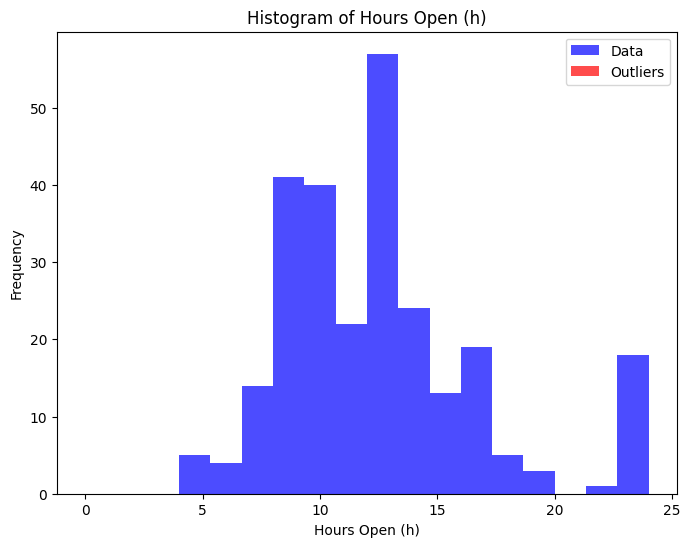

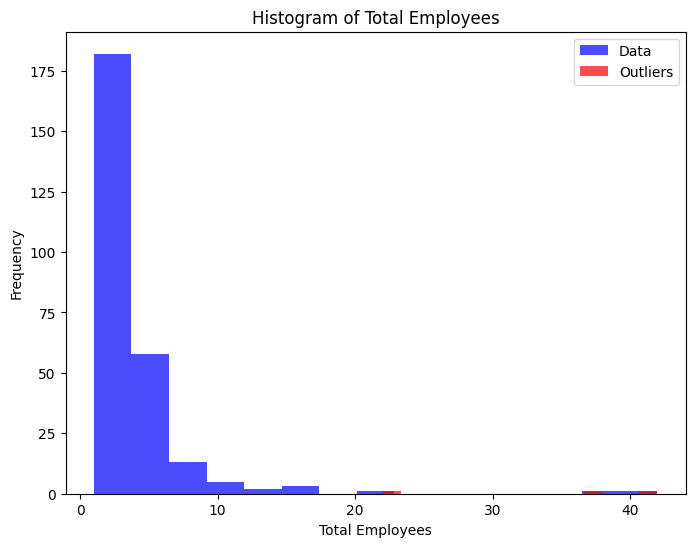

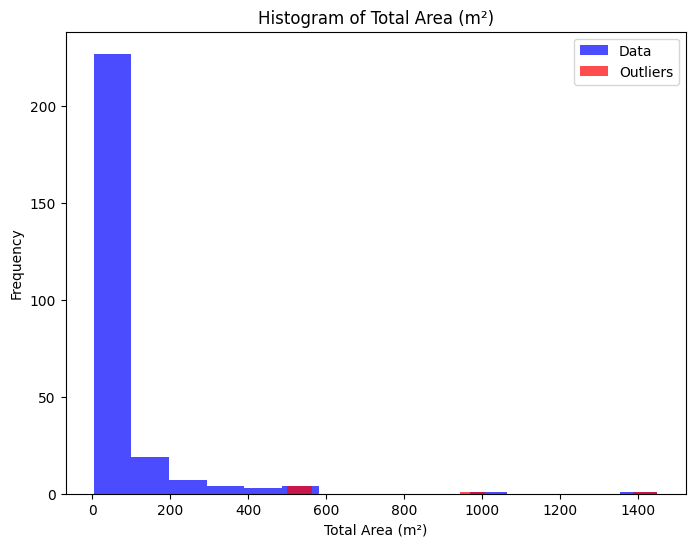

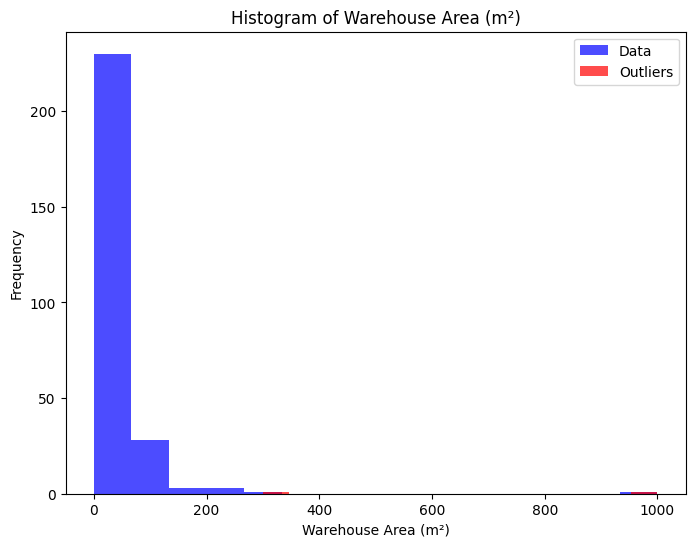

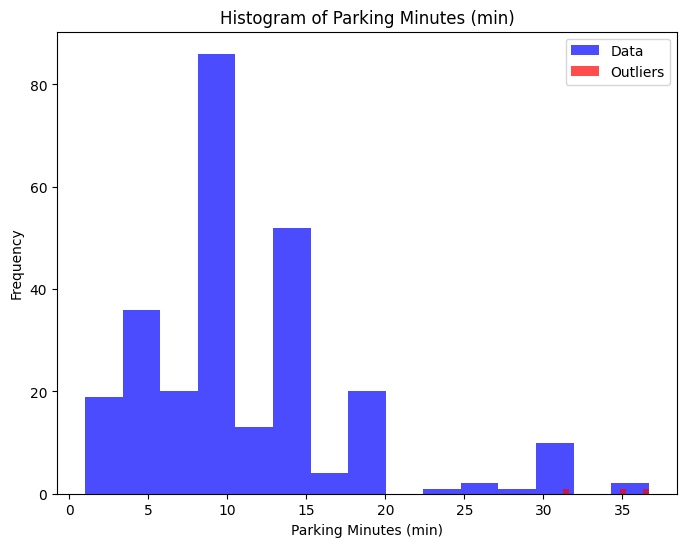

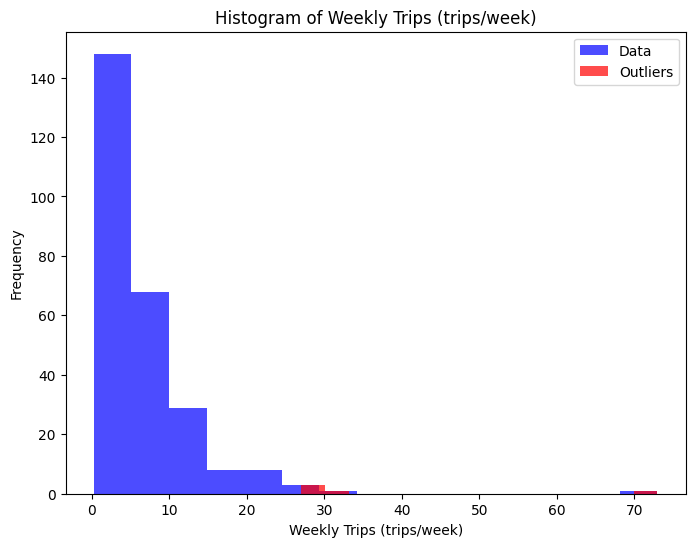

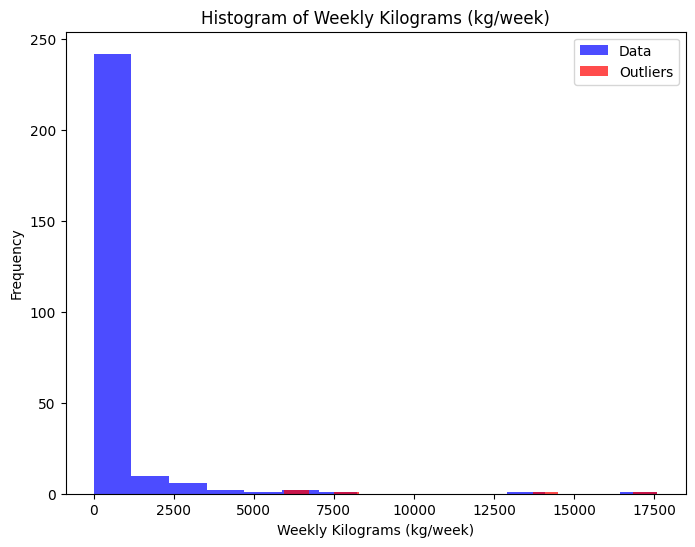

In [123]:
# Set your threshold for identifying outliers
threshold = 3  # Adjust the threshold as needed

# Create a DataFrame to store the outlier information for each column
outlier_df = pd.DataFrame(index=numeric_fs_df.index)

# Create a list to store the column names
column_names = numeric_fs_df.columns

# Loop through each column and create a separate histogram
for column_name in column_names:
    # Calculate z-scores for the current column
    z_scores = stats.zscore(numeric_fs_df[column_name])
    
    # Identify outliers based on the threshold
    is_outlier = np.logical_xor(np.abs(z_scores) > threshold, False)
    
    # Store the outlier information in the outlier_df DataFrame
    outlier_df[column_name] = is_outlier

    # Create a new figure and axis for each histogram
    plt.figure(figsize=(8, 6))
    plt.hist(numeric_fs_df[column_name], bins=15, color='blue', alpha=0.7, label='Data')
    
    # Highlight outliers in red on the histogram
    outliers = numeric_fs_df[is_outlier][column_name]
    plt.hist(outliers, bins=15, color='red', alpha=0.7, label='Outliers')
    
    # Set labels, title, and legend
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column_name}')
    plt.legend()
    
    # Show each histogram
    plt.show()



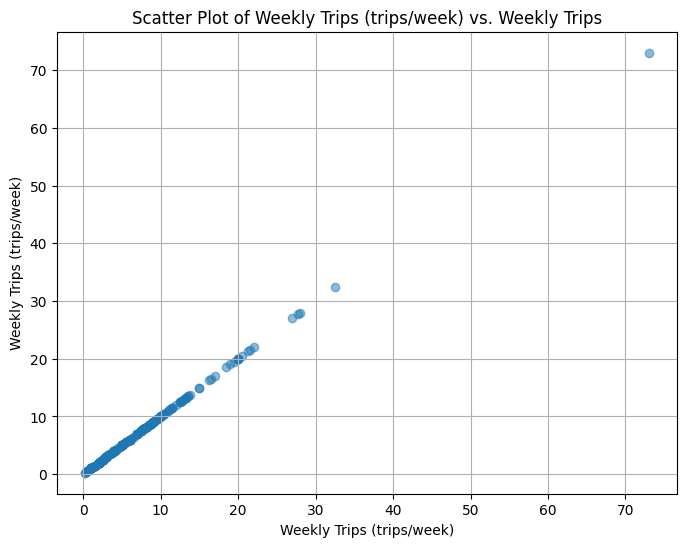

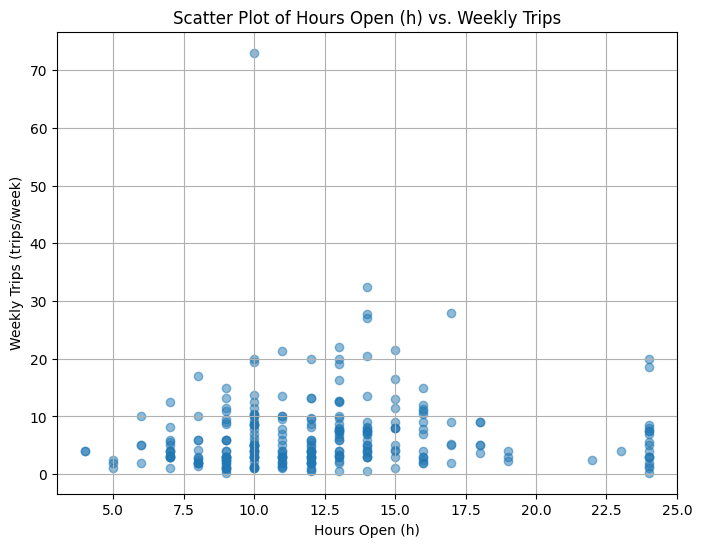

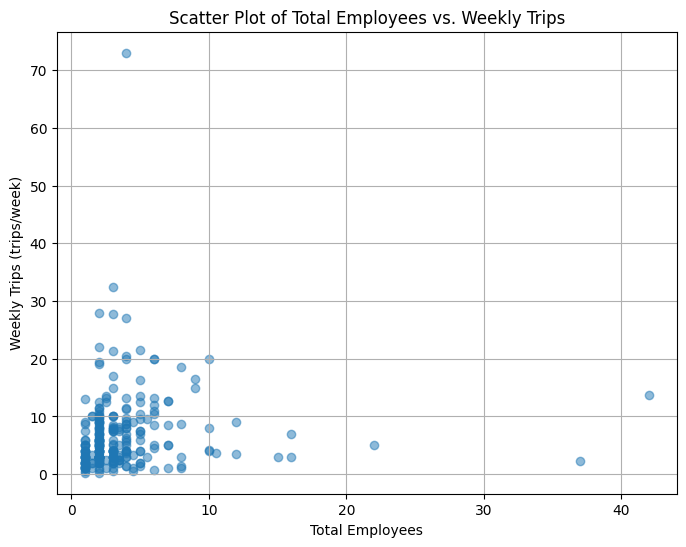

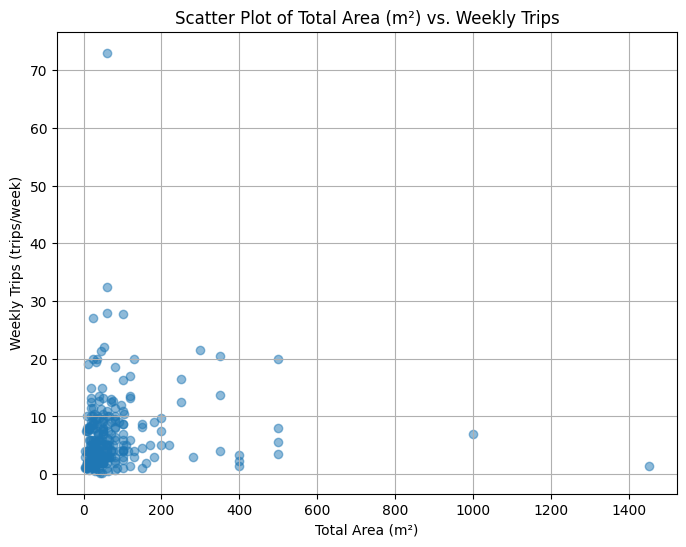

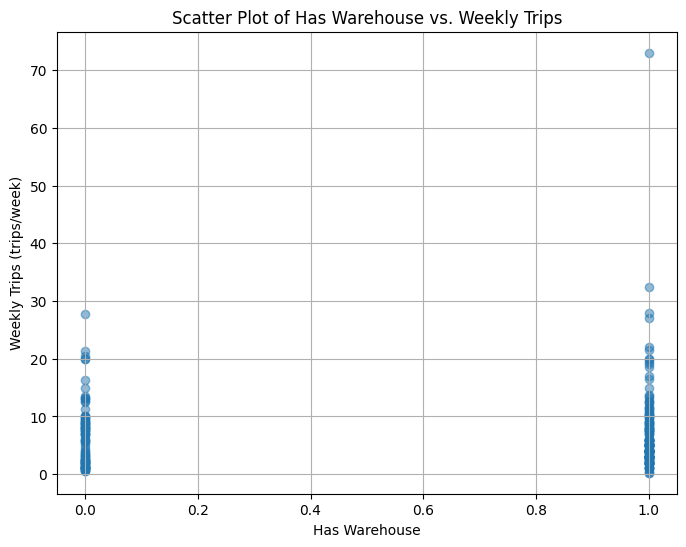

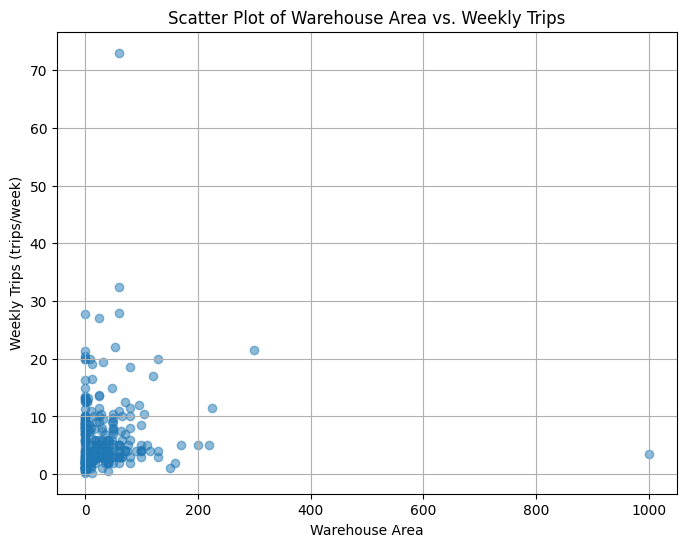

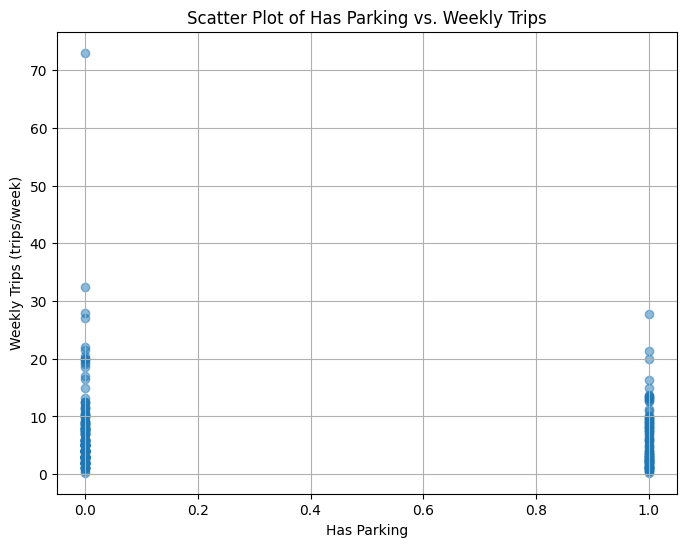

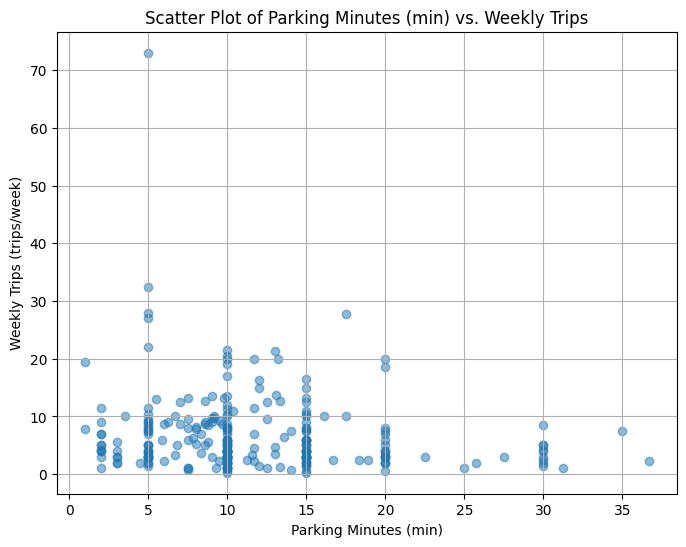

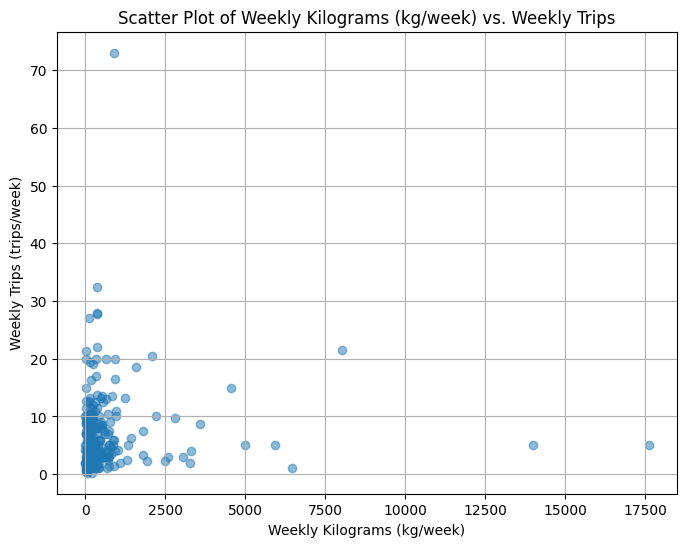

In [81]:
import matplotlib.pyplot as plt

# Loop through each column in the DataFrame
for column_name in model_df.columns:
    # Check if the column is numeric (int, float, or other numeric types)
    if pd.api.types.is_numeric_dtype(model_df[column_name]):
        # Create a scatter plot for the current column
        plt.figure(figsize=(8, 6))  # Set the figure size
        plt.scatter(model_df[column_name], model_df['Weekly Trips (trips/week)'], alpha=0.5)
        plt.title(f'Scatter Plot of {column_name} vs. Weekly Trips')
        plt.xlabel(column_name)
        plt.ylabel('Weekly Trips (trips/week)')
        plt.grid(True)
        plt.show()


C:\Users\Carlos Granada\AppData\Local\Temp\ipykernel_9616\2030216711.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = model_df.corr()


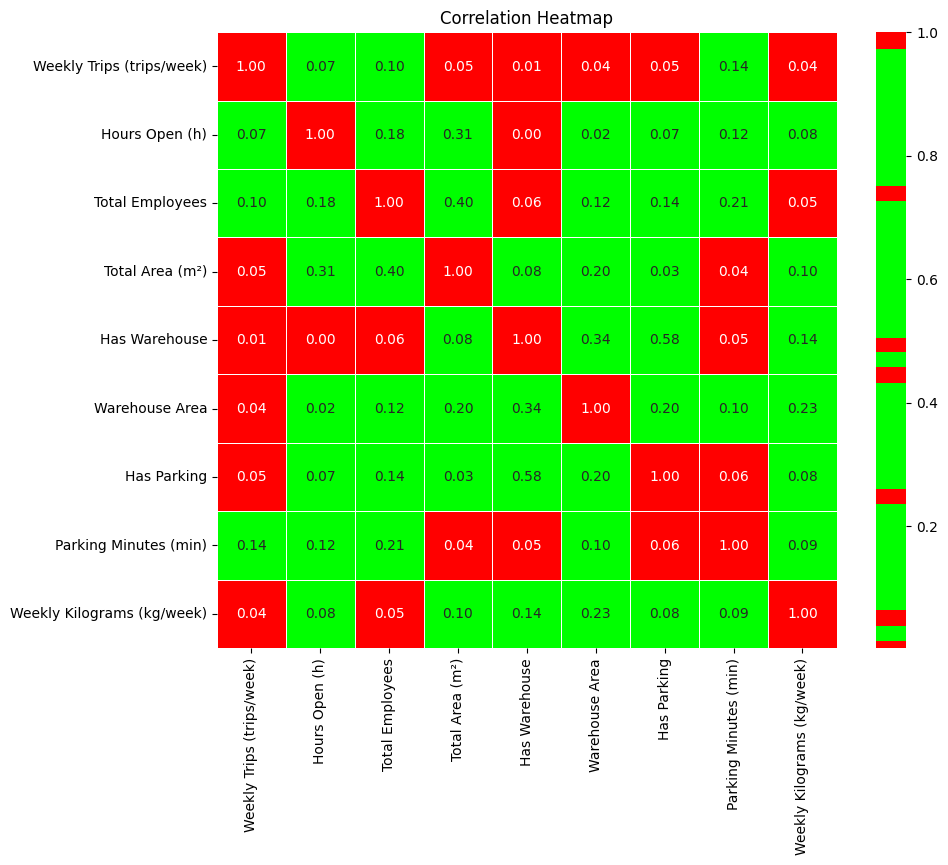

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Calculate the correlation matrix
correlation_matrix = model_df.corr()

# Create a custom colormap with green for values less than 0.5 in absolute value
cmap = ListedColormap(['#00FF00' if abs(val) < 0.5 else '#FF0000' for val in correlation_matrix.values.flatten()])

# Set up the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap with custom colors and annotation
sns.heatmap(correlation_matrix.abs(), annot=True, cmap=cmap, fmt=".2f", linewidths=.5, center=0)

# Add a title to the heatmap
plt.title("Correlation Heatmap")

# Show the heatmap
plt.show()




# Correlation matrix

C:\Users\Carlos Granada\AppData\Local\Temp\ipykernel_9616\939418463.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = model_df.corr()


Correlation Matrix:
                            Weekly Trips (trips/week)  Hours Open (h)  \
Weekly Trips (trips/week)                    1.000000        0.073233   
Hours Open (h)                               0.073233        1.000000   
Total Employees                              0.097293        0.182120   
Total Area (m²)                              0.045887        0.311694   
Has Warehouse                                0.012590       -0.002117   
Warehouse Area                               0.037846       -0.016522   
Has Parking                                 -0.049455       -0.069418   
Parking Minutes (min)                       -0.142608        0.120719   
Weekly Kilograms (kg/week)                   0.037565        0.084980   

                            Total Employees  Total Area (m²)  Has Warehouse  \
Weekly Trips (trips/week)          0.097293         0.045887       0.012590   
Hours Open (h)                     0.182120         0.311694      -0.002117   
Total Employ

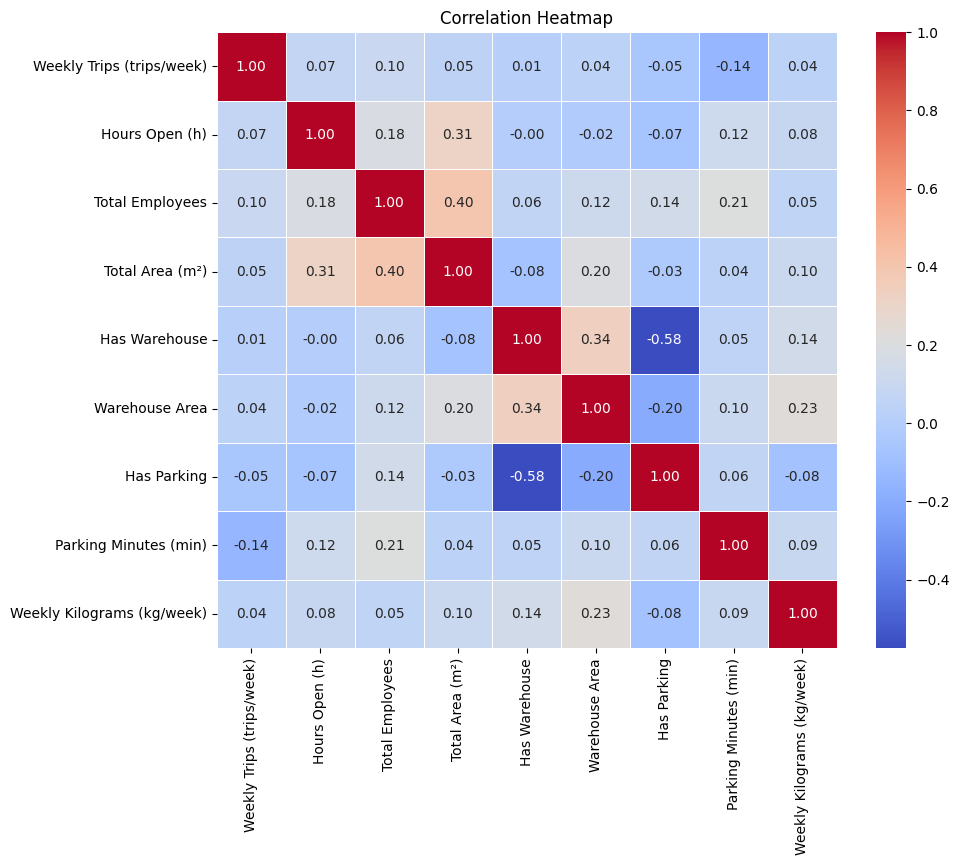

In [83]:
import pandas as pd

# Calculate the correlation matrix
correlation_matrix = model_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


In [84]:
print(len(model_df.columns))
model_df.columns

10


Index(['Weekly Trips (trips/week)', 'Hours Open (h)', 'Total Employees',
       'Establishment Size', 'Total Area (m²)', 'Has Warehouse',
       'Warehouse Area', 'Has Parking', 'Parking Minutes (min)',
       'Weekly Kilograms (kg/week)'],
      dtype='object')

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# List of independent variables
independent_variables = ['Hours Open (h)', 'Total Employees', 'Total Area (m²)', 'Warehouse Area (m²)', 'Parking Minutes (min)', 'Weekly Kilograms (kg/week)']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(model_df[independent_variables],
                                                    model_df['Weekly Trips (trips/week)'],
                                                    test_size=0.2,
                                                    random_state=42)

# Initialize an empty dictionary to store results for each variable
results = {}

# Loop through each independent variable
for var in independent_variables:
    # Initialize the linear regression model
    model = LinearRegression()

    # Train the model on the training data for the current variable
    model.fit(X_train[[var]], y_train)

    # Make predictions on the testing data for the current variable
    y_pred = model.predict(X_test[[var]])

    # Evaluate the model's performance for the current variable
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results in the dictionary
    results[var] = {'Mean Squared Error': mse, 'R-squared (R2) Score': r2}

# Print the results for each variable
for var, metrics in results.items():
    print(f"Results for '{var}':")
    print(f"Mean Squared Error: {metrics['Mean Squared Error']}")
    print(f"R-squared (R2) Score: {metrics['R-squared (R2) Score']}")
    print()


Results for 'Hours Open (h)':
Mean Squared Error: 121.43027138640662
R-squared (R2) Score: -0.01951147274021392

Results for 'Total Employees':
Mean Squared Error: 120.22220575921799
R-squared (R2) Score: -0.009368723714950677

Results for 'Total Area (m²)':
Mean Squared Error: 122.5439948533027
R-squared (R2) Score: -0.028862138262054193

Results for 'Warehouse Area':
Mean Squared Error: 120.94499362725026
R-squared (R2) Score: -0.015437148955239177

Results for 'Parking Minutes (min)':
Mean Squared Error: 118.72317335215399
R-squared (R2) Score: 0.003216941453728084

Results for 'Weekly Kilograms (kg/week)':
Mean Squared Error: 120.93761085616381
R-squared (R2) Score: -0.015375164247988682



# Robust regression

In [86]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [87]:
import pandas as pd
import statsmodels.api as sm
from itertools import combinations
from sklearn.metrics import mean_squared_error

# Load your data into a DataFrame (replace 'data.csv' with your data file)
# numeric_fs_df = pd.read_csv('data.csv')

# Define the dependent variable
dependent_variable = 'Weekly Trips (trips/week)'

# Create a list of all independent variable names
independent_variables = [col for col in numeric_fs_df.columns if col != dependent_variable]

# Maximum number of independent variables in each combination
max_combination_length = 3  # Adjust as needed

# Variables to store the best model and its MSE value
best_model = None
best_mse = float('inf')  # Initialize with a high value

# Loop through all possible combinations of independent variables
for combination_length in range(1, min(max_combination_length, len(independent_variables)) + 1):
    for combo in combinations(independent_variables, combination_length):
        try:
            # Extract data for regression
            y = numeric_fs_df[dependent_variable]
            X = numeric_fs_df[list(combo)]

            # Fit a robust regression model using Huber loss
            model = sm.RLM(y, X, M=sm.robust.norms.HuberT())
            results = model.fit()

            # Make predictions using the current model
            y_pred = results.predict(X)

            # Calculate the Mean Squared Error (MSE)
            mse = mean_squared_error(y, y_pred)

            # Check if the current model has a lower MSE value
            if mse < best_mse:
                best_mse = mse
                best_model = results

                # Print summary for the best model so far
                print(f"Best model (MSE: {best_mse}):")
                print(best_model.summary())
                print("=" * 40)

        except Exception as e:
            print(f"An error occurred for combination {combo}: {str(e)}")

# The best_model now contains the best model based on the lowest MSE value


Best model (MSE: 48.91721723393647):
                        Robust linear Model Regression Results                       
Dep. Variable:     Weekly Trips (trips/week)   No. Observations:                  266
Model:                                   RLM   Df Residuals:                      265
Method:                                 IRLS   Df Model:                            0
Norm:                                 HuberT                                         
Scale Est.:                              mad                                         
Cov Type:                                 H1                                         
Date:                       Mon, 02 Oct 2023                                         
Time:                               08:48:05                                         
No. Iterations:                           17                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------

Best model (MSE: 48.21244575291036):
                        Robust linear Model Regression Results                       
Dep. Variable:     Weekly Trips (trips/week)   No. Observations:                  266
Model:                                   RLM   Df Residuals:                      263
Method:                                 IRLS   Df Model:                            2
Norm:                                 HuberT                                         
Scale Est.:                              mad                                         
Cov Type:                                 H1                                         
Date:                       Mon, 02 Oct 2023                                         
Time:                               08:48:06                                         
No. Iterations:                           18                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------

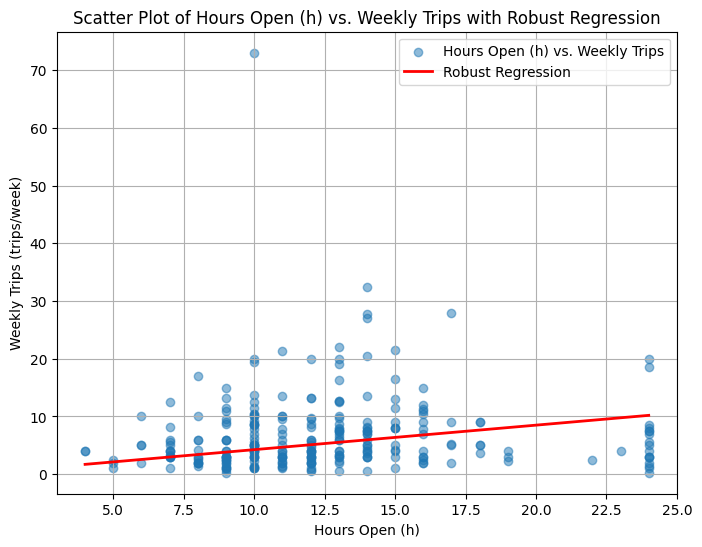

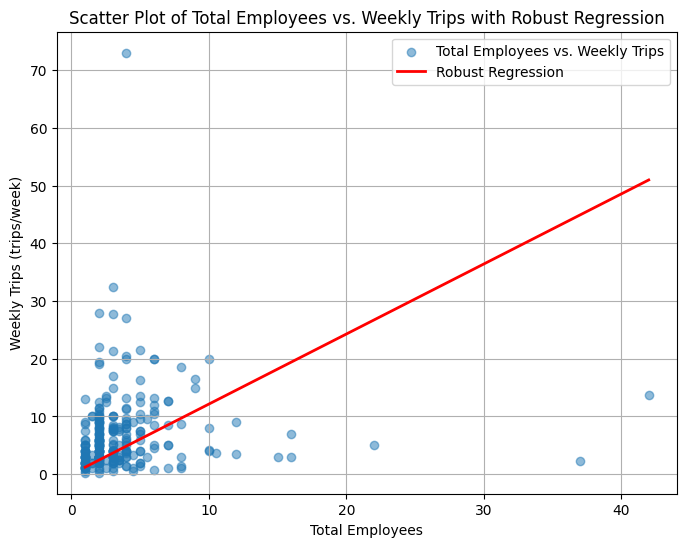

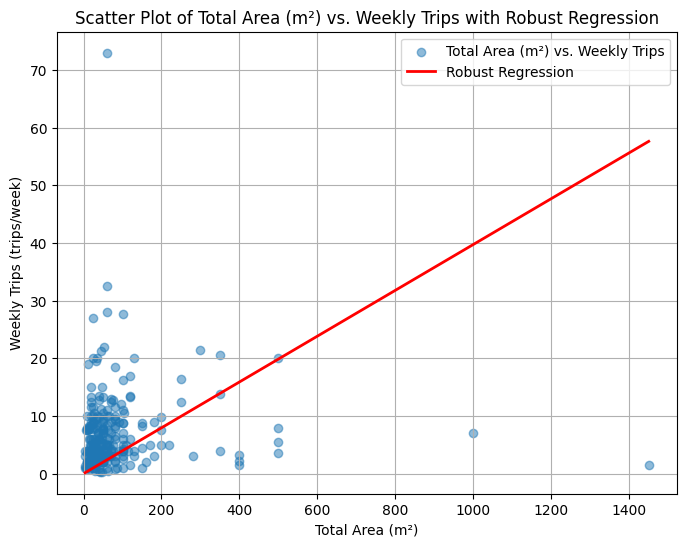

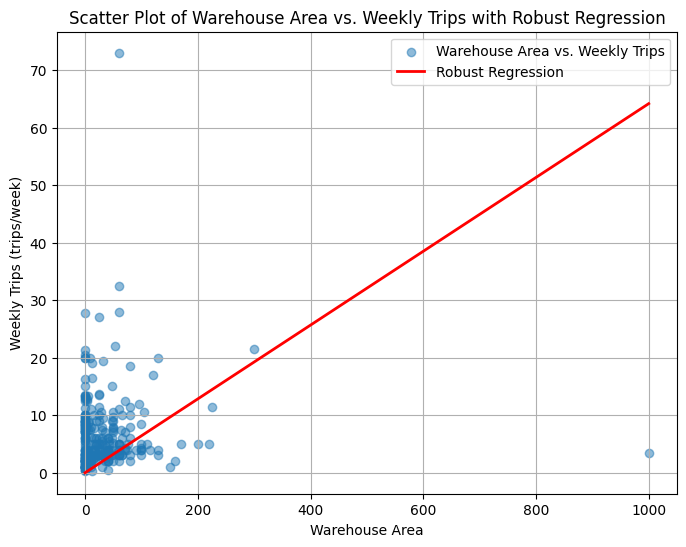

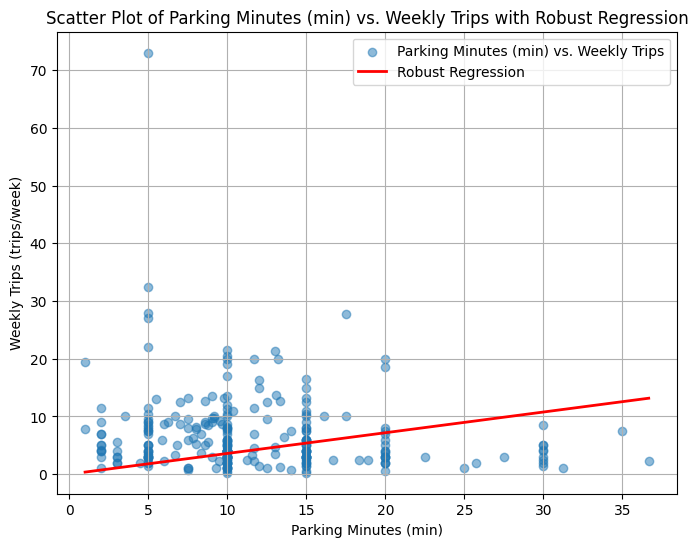

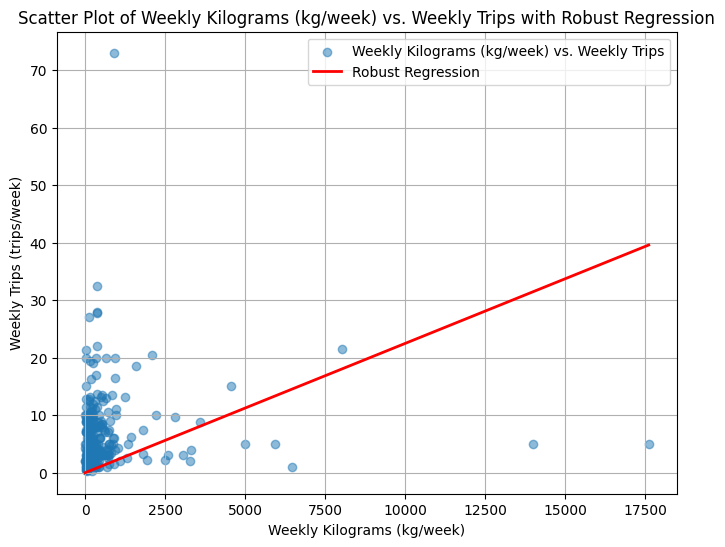

An error occurred for combination ('Hours Open (h)', 'Total Employees'): shapes (1,266) and (2,) not aligned: 266 (dim 1) != 2 (dim 0)
An error occurred for combination ('Hours Open (h)', 'Total Area (m²)'): shapes (1,266) and (2,) not aligned: 266 (dim 1) != 2 (dim 0)
An error occurred for combination ('Hours Open (h)', 'Warehouse Area'): shapes (1,266) and (2,) not aligned: 266 (dim 1) != 2 (dim 0)
An error occurred for combination ('Hours Open (h)', 'Parking Minutes (min)'): shapes (1,266) and (2,) not aligned: 266 (dim 1) != 2 (dim 0)
An error occurred for combination ('Hours Open (h)', 'Weekly Kilograms (kg/week)'): shapes (1,266) and (2,) not aligned: 266 (dim 1) != 2 (dim 0)
An error occurred for combination ('Total Employees', 'Total Area (m²)'): shapes (1,266) and (2,) not aligned: 266 (dim 1) != 2 (dim 0)
An error occurred for combination ('Total Employees', 'Warehouse Area'): shapes (1,266) and (2,) not aligned: 266 (dim 1) != 2 (dim 0)
An error occurred for combination ('To

C:\Users\Carlos Granada\AppData\Local\Temp\ipykernel_9616\379482173.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 6))


An error occurred for combination ('Total Employees', 'Total Area (m²)', 'Parking Minutes (min)'): shapes (1,266) and (3,) not aligned: 266 (dim 1) != 3 (dim 0)
An error occurred for combination ('Total Employees', 'Total Area (m²)', 'Weekly Kilograms (kg/week)'): shapes (1,266) and (3,) not aligned: 266 (dim 1) != 3 (dim 0)
An error occurred for combination ('Total Employees', 'Warehouse Area', 'Parking Minutes (min)'): shapes (1,266) and (3,) not aligned: 266 (dim 1) != 3 (dim 0)
An error occurred for combination ('Total Employees', 'Warehouse Area', 'Weekly Kilograms (kg/week)'): shapes (1,266) and (3,) not aligned: 266 (dim 1) != 3 (dim 0)
An error occurred for combination ('Total Employees', 'Parking Minutes (min)', 'Weekly Kilograms (kg/week)'): shapes (1,266) and (3,) not aligned: 266 (dim 1) != 3 (dim 0)
An error occurred for combination ('Total Area (m²)', 'Warehouse Area', 'Parking Minutes (min)'): shapes (1,266) and (3,) not aligned: 266 (dim 1) != 3 (dim 0)
An error occurre

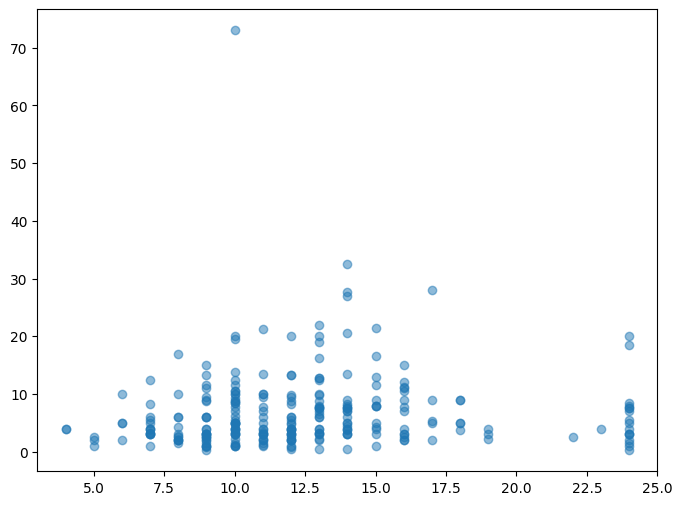

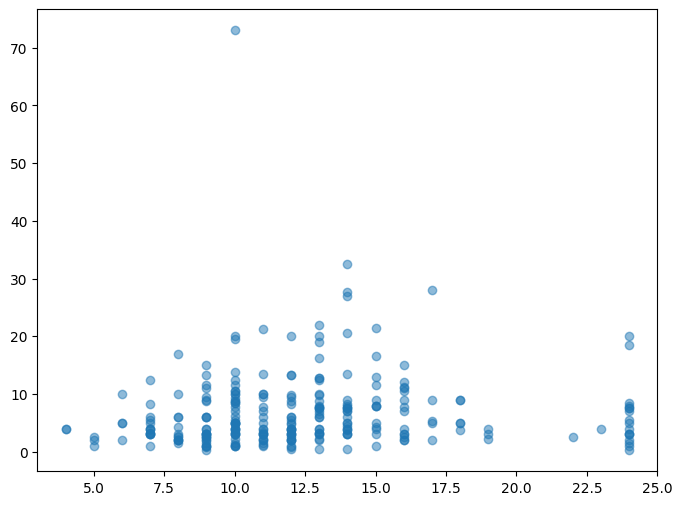

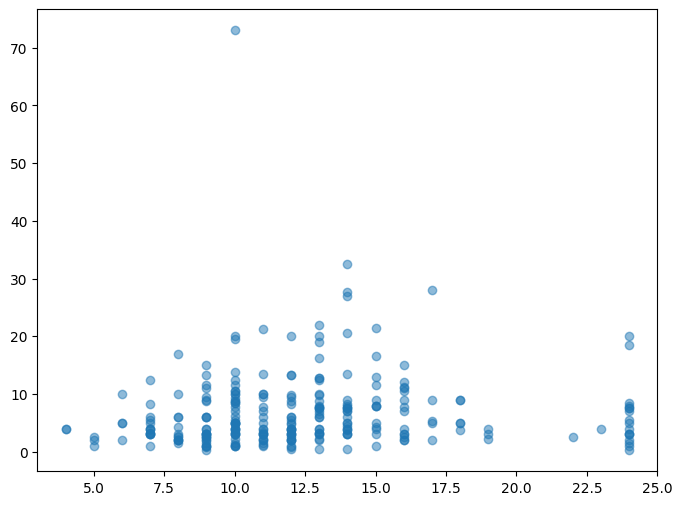

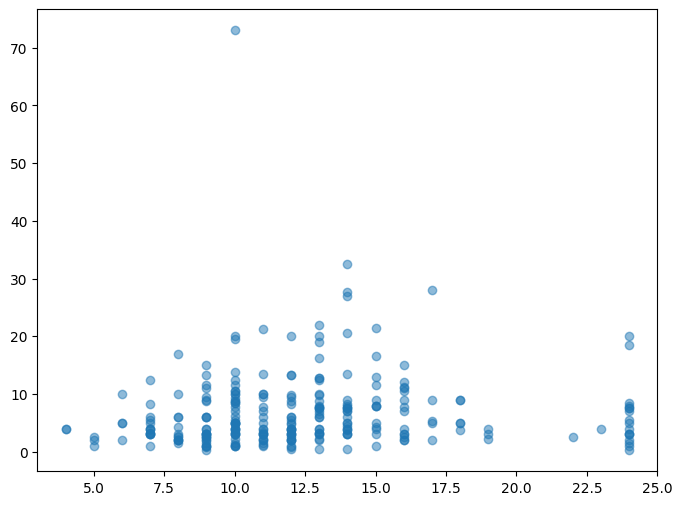

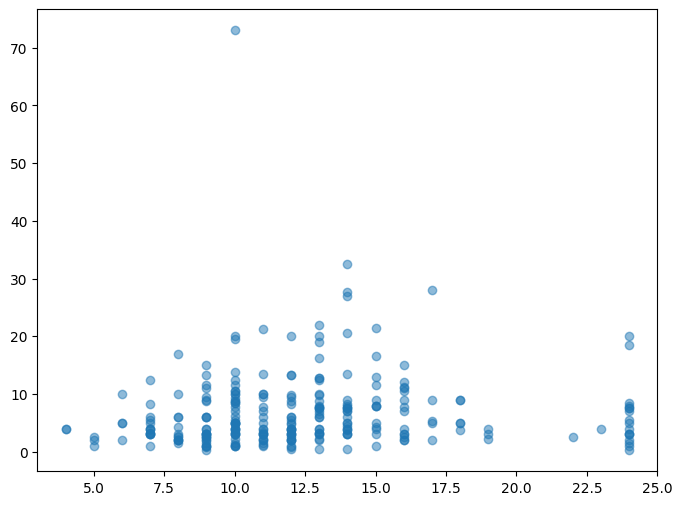

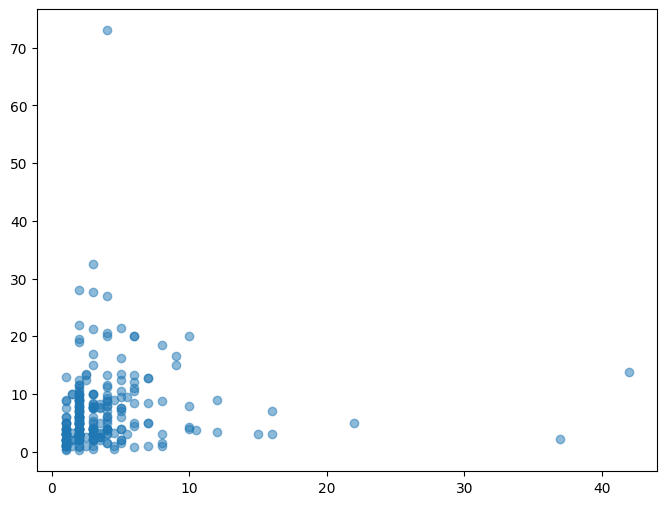

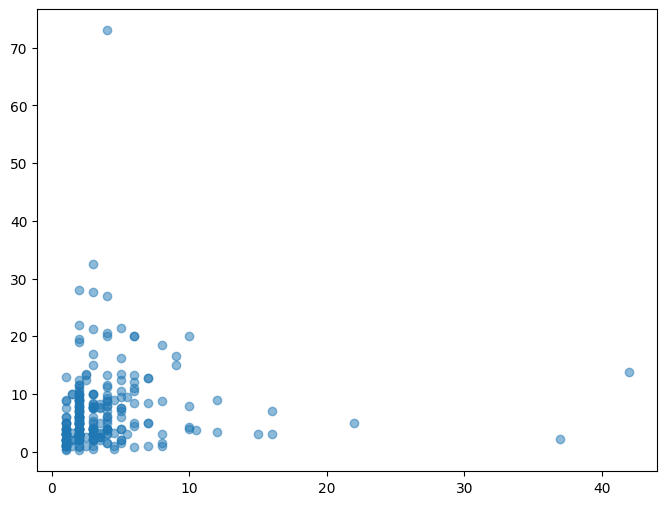

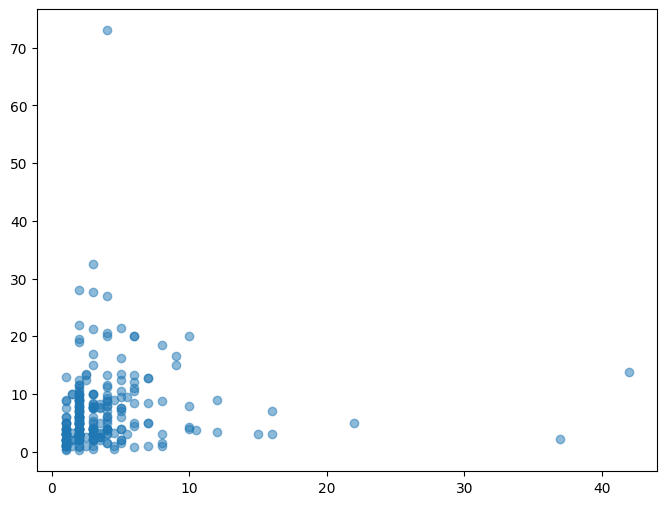

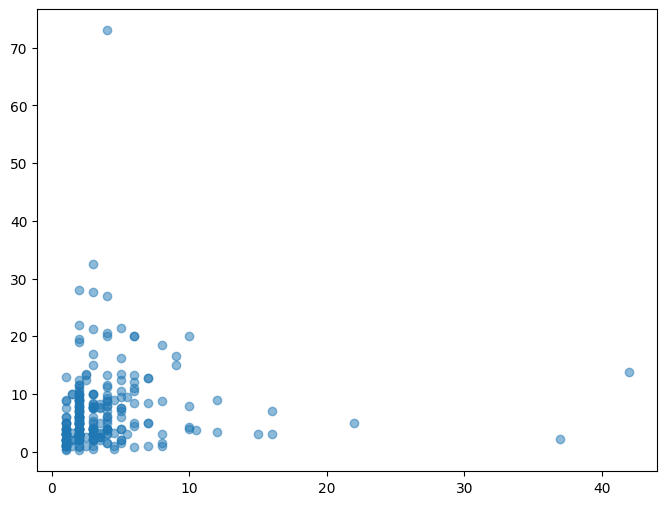

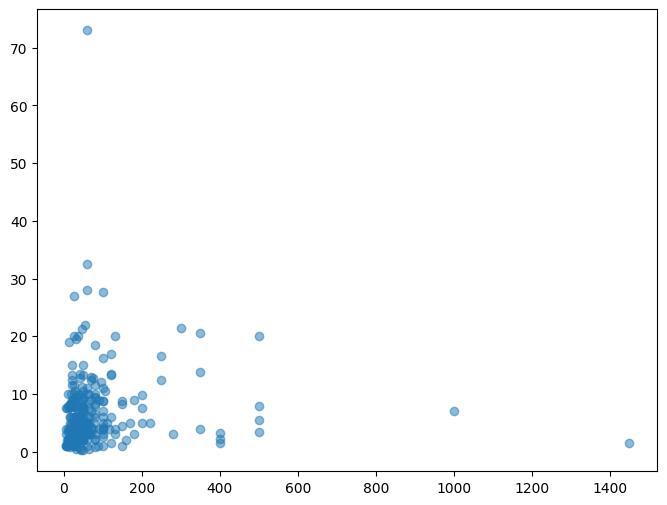

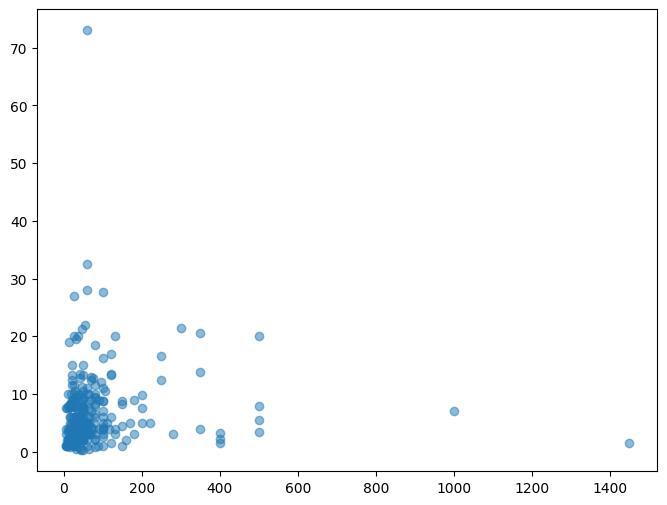

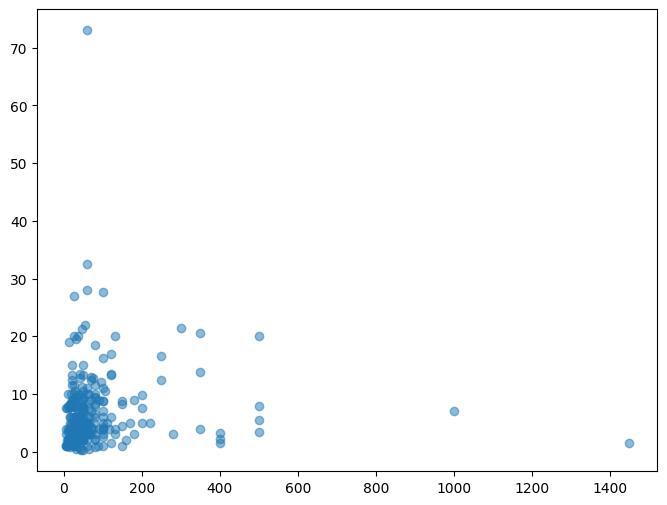

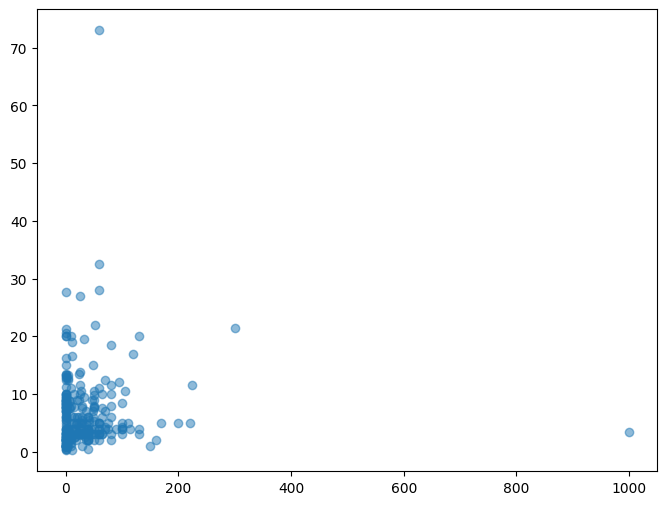

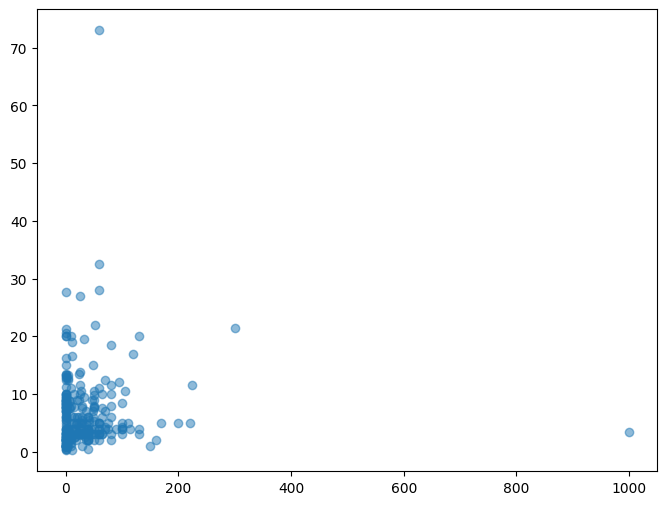

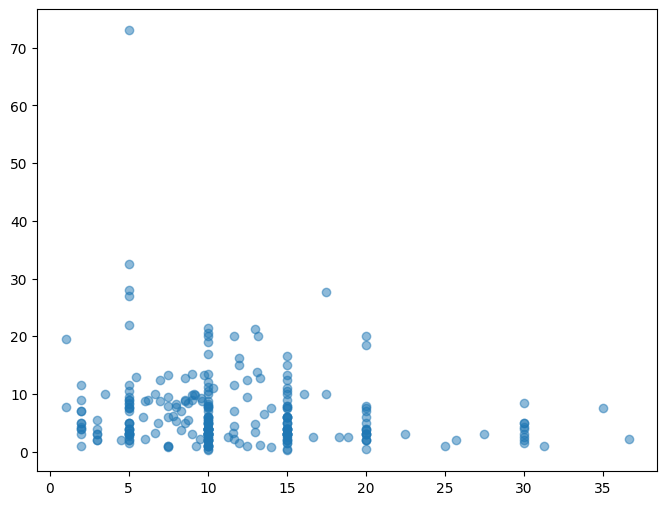

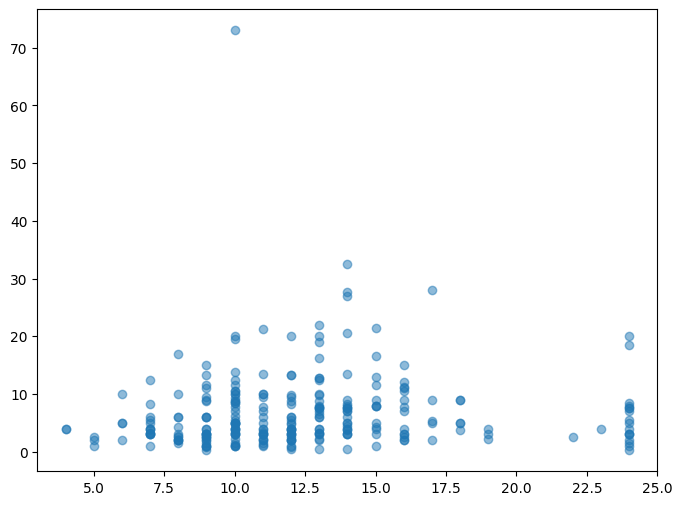

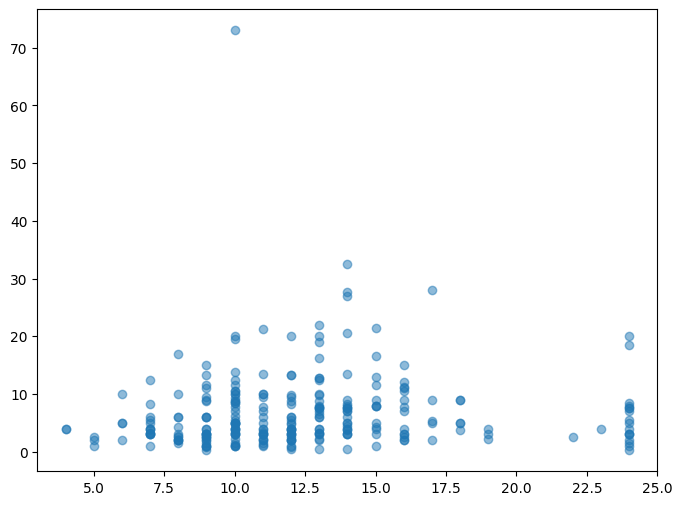

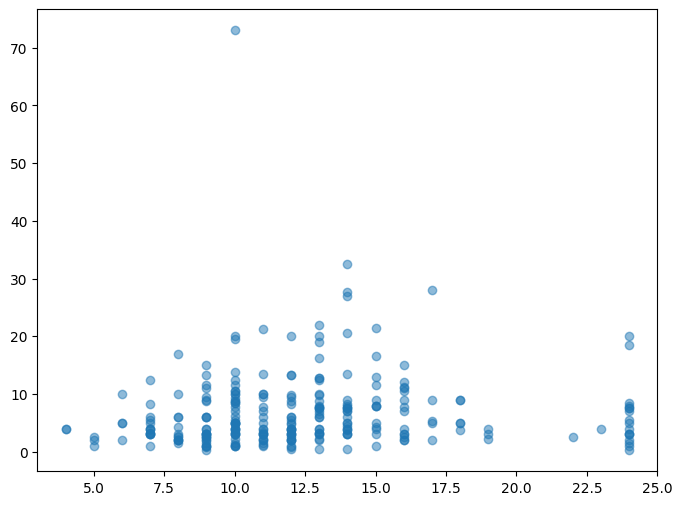

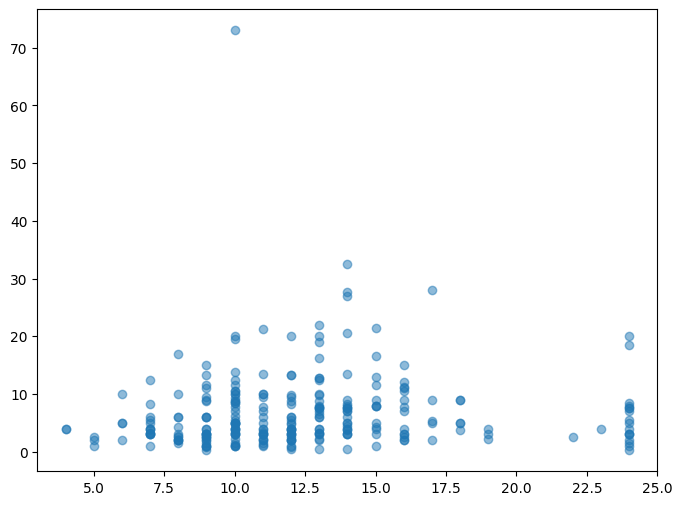

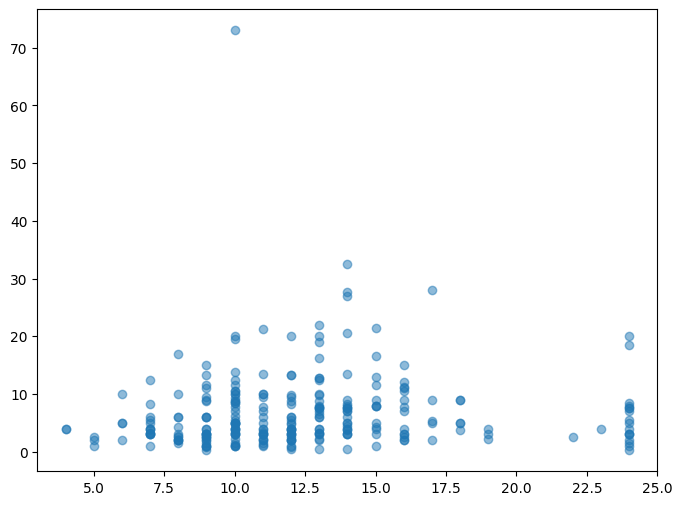

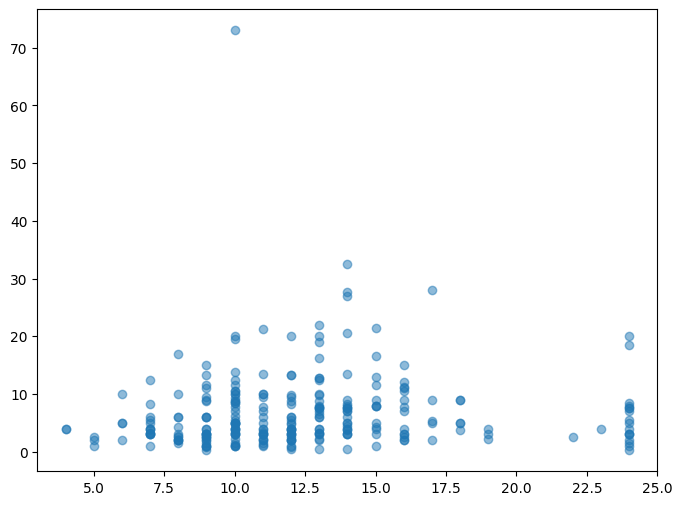

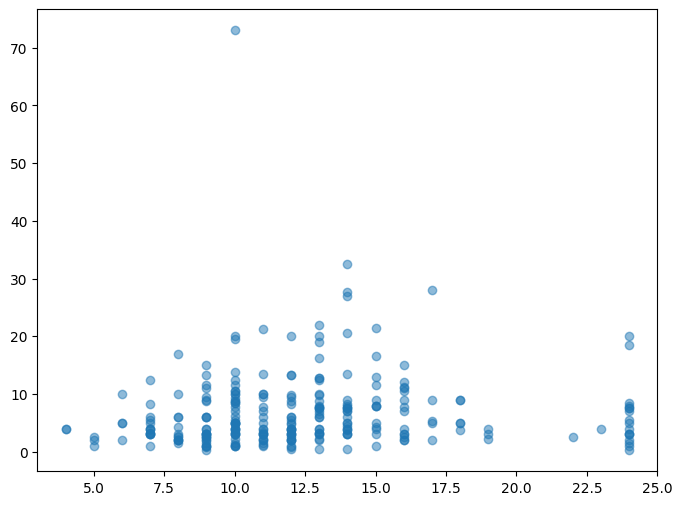

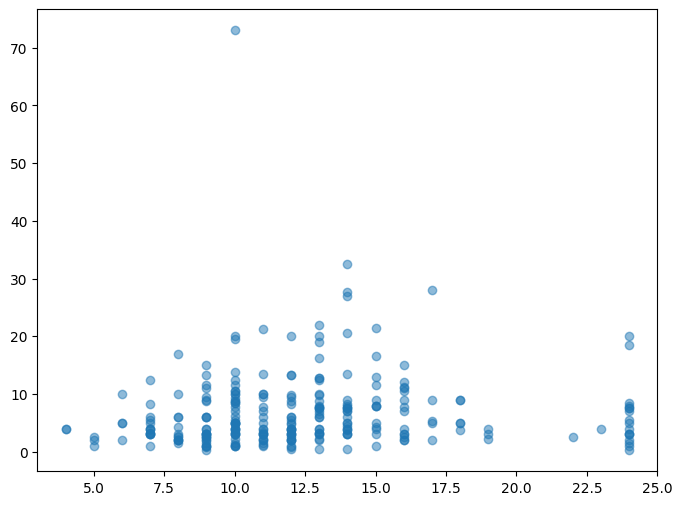

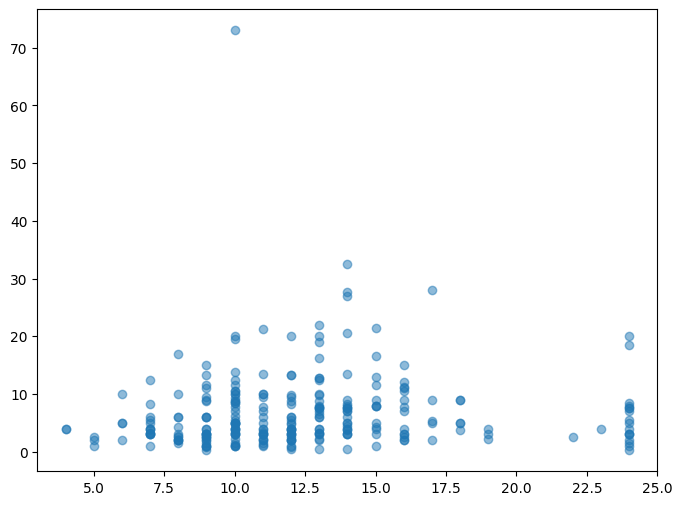

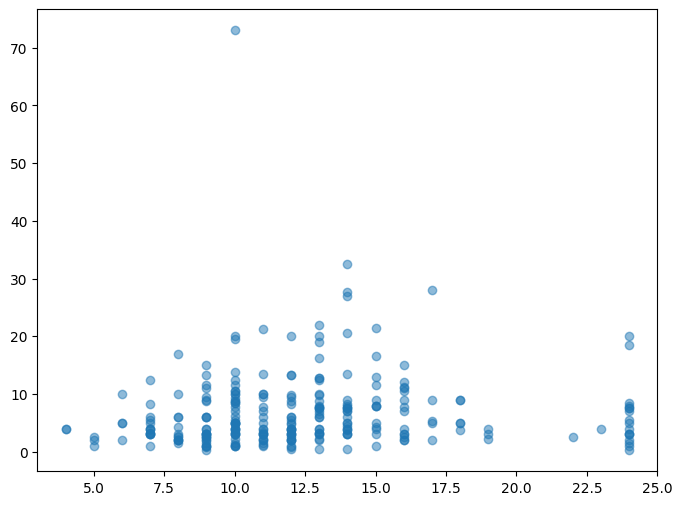

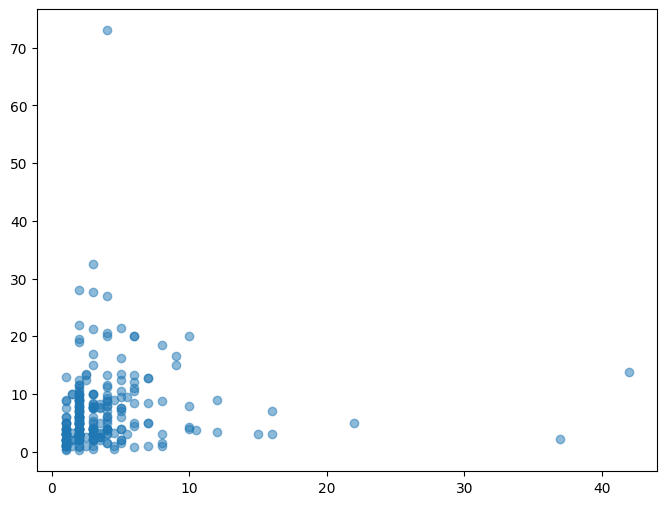

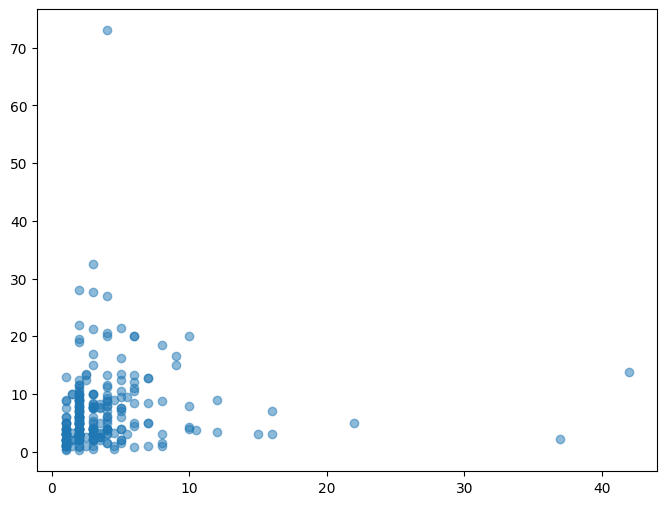

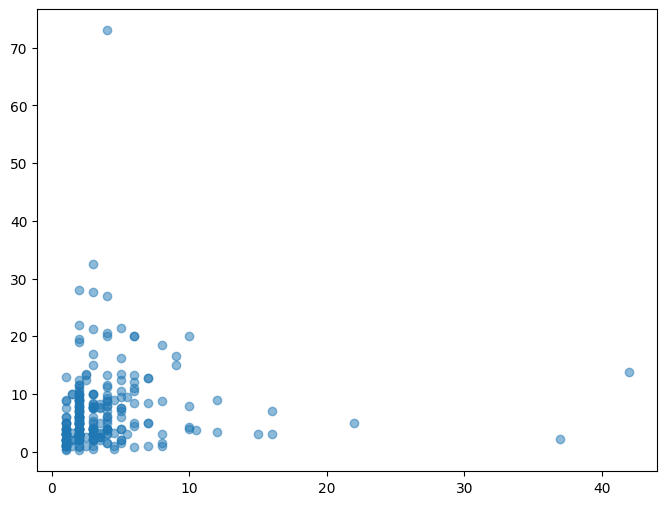

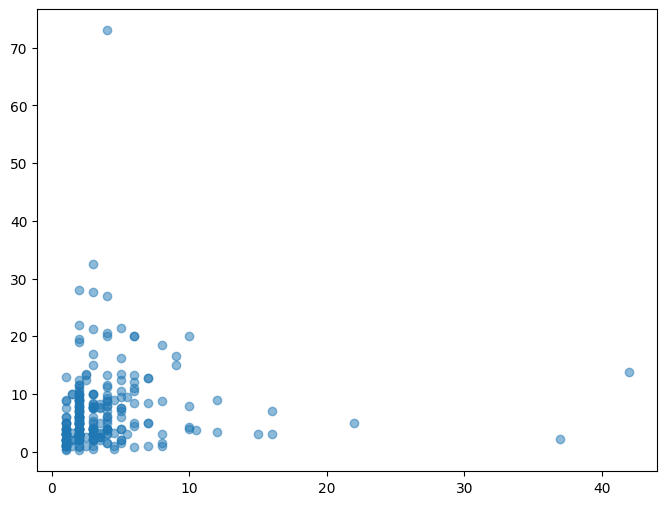

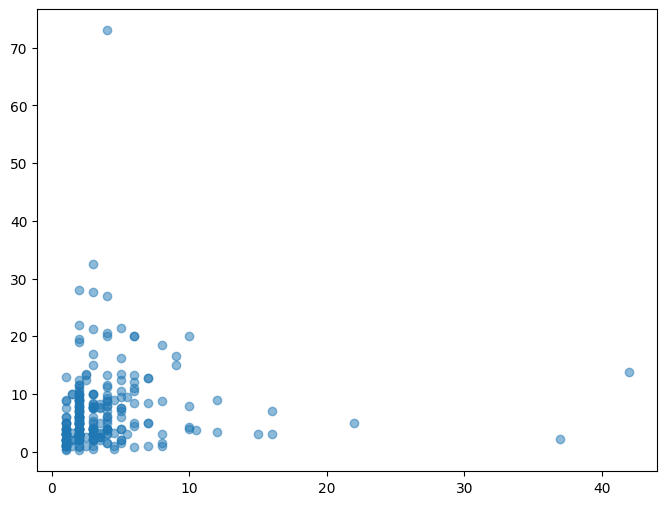

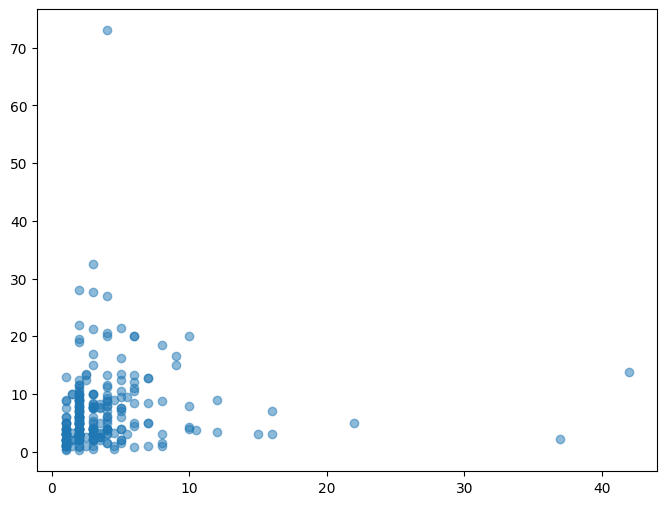

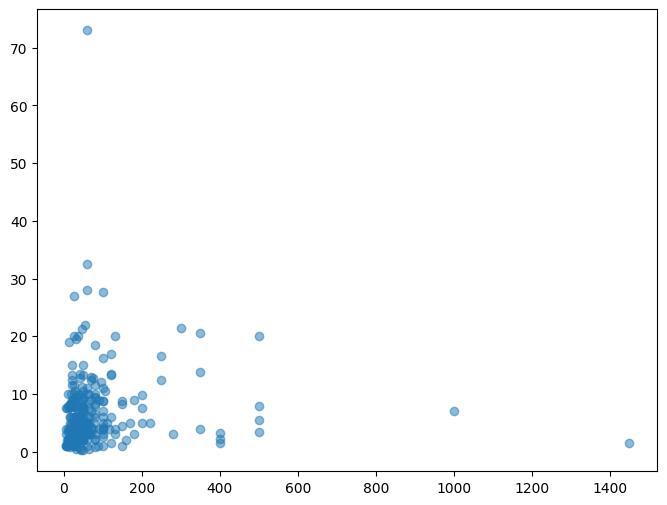

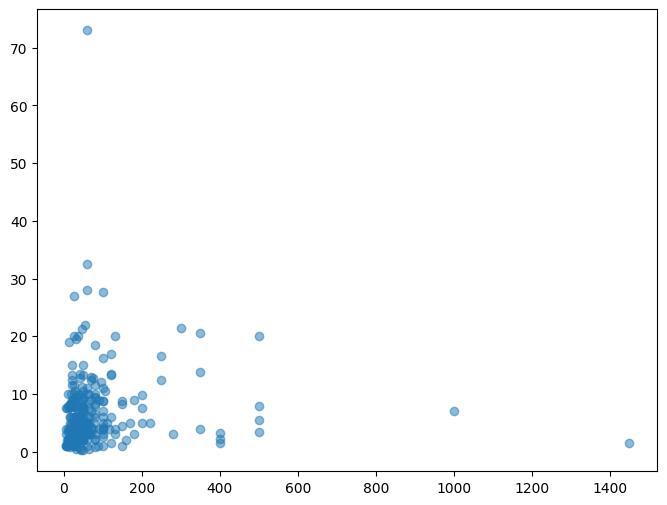

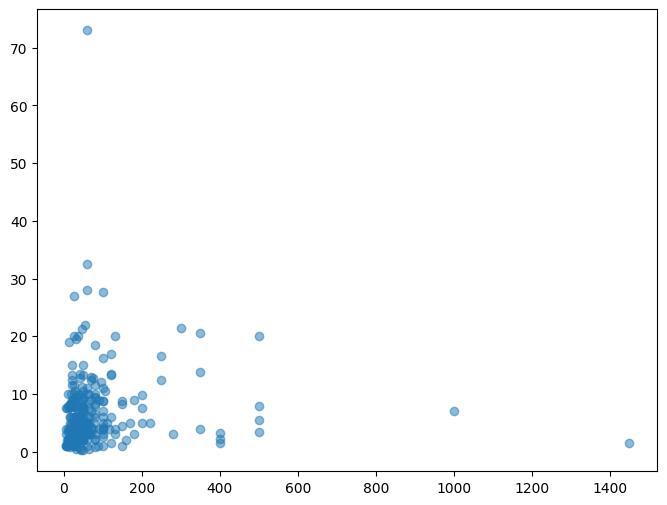

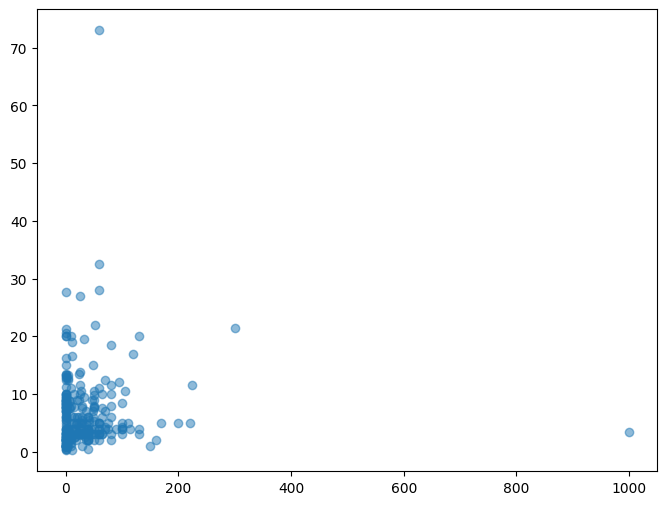

In [88]:
#Plots

import pandas as pd
import statsmodels.api as sm
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np

# Load your data into a DataFrame (replace 'data.csv' with your data file)
# numeric_fs_df = pd.read_csv('data.csv')

# Define the dependent variable
dependent_variable = 'Weekly Trips (trips/week)'

# Create a list of all independent variable names
independent_variables = [col for col in numeric_fs_df.columns if col != dependent_variable]

# Maximum number of independent variables in each combination
max_combination_length = 3  # Adjust as needed

# Loop through all possible combinations of independent variables
for combination_length in range(1, min(max_combination_length, len(independent_variables)) + 1):
    for combo in combinations(independent_variables, combination_length):
        try:
            # Extract data for regression
            y = numeric_fs_df[dependent_variable]
            
            # Include all selected independent variables in each combination
            X = numeric_fs_df[list(combo)]

            # Fit a robust regression model using Huber loss
            model = sm.RLM(y, X, M=sm.robust.norms.HuberT())
            results = model.fit()

            # Create a scatter plot with regression line
            plt.figure(figsize=(8, 6))
            plt.scatter(X.iloc[:, 0], y, label=f'{combo[0]} vs. Weekly Trips', alpha=0.5)
            
            # Sort X values for plotting the regression line
            sorted_x = np.sort(X.iloc[:, 0])
            predicted_y = results.predict(sorted_x)
            
            plt.plot(sorted_x, predicted_y, color='red', linewidth=2, label='Robust Regression')
            plt.title(f'Scatter Plot of {combo[0]} vs. Weekly Trips with Robust Regression')
            plt.xlabel(combo[0])
            plt.ylabel('Weekly Trips (trips/week)')
            plt.legend()
            plt.grid(True)
            plt.show()

        except Exception as e:
            print(f"An error occurred for combination {combo}: {str(e)}")


In [89]:
# Load your data into a DataFrame (replace 'data.csv' with your data file)
# numeric_fs_df = pd.read_csv('data.csv')

# Define your dependent and independent variables
dependent_variable = 'Weekly Trips (trips/week)'
independent_variable = 'Total Employees'

try:
    # Extract data for regression
    y = numeric_fs_df[dependent_variable]
    X = numeric_fs_df[[independent_variable]]

    # Fit a regression model
    model = sm.OLS(y, sm.add_constant(X))
    results = model.fit()

    # Print summary
    print(results.summary())

    # Access coefficients
    intercept = results.params[0]
    coefficient = results.params[1]

    # Make predictions
    predictions = results.predict()

    # Calculate residuals
    residuals = results.resid

except Exception as e:
    print("An error occurred:", str(e))


                                OLS Regression Results                               
Dep. Variable:     Weekly Trips (trips/week)   R-squared:                       0.009
Model:                                   OLS   Adj. R-squared:                  0.006
Method:                        Least Squares   F-statistic:                     2.523
Date:                       Mon, 02 Oct 2023   Prob (F-statistic):              0.113
Time:                               08:48:18   Log-Likelihood:                -883.41
No. Observations:                        266   AIC:                             1771.
Df Residuals:                            264   BIC:                             1778.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

In [90]:
# Define the dependent variable
dependent_variable = 'Weekly Trips (trips/week)'

# Create a list of independent variable names (all columns except the dependent variable)
independent_variables = [col for col in numeric_fs_df.columns if col != dependent_variable]

# Dictionary to store results for each independent variable
results_dict = {}

# Loop through each independent variable
for independent_variable in independent_variables:
    try:
        # Extract data for regression
        y = numeric_fs_df[dependent_variable]
        X = numeric_fs_df[[independent_variable]]

        # Fit a regression model
        model = sm.RLM(y, X, M=sm.robust.norms.HuberT())
        results = model.fit()

        # Store the results in the dictionary
        results_dict[independent_variable] = results

        # Print summary
        print(f"Regression summary for {independent_variable}:")
        print(results.summary())
        print("=" * 40)

    except Exception as e:
        print(f"An error occurred for {independent_variable}: {str(e)}")

# Now, you have regression results for each independent variable in the results_dict


Regression summary for Hours Open (h):
                        Robust linear Model Regression Results                       
Dep. Variable:     Weekly Trips (trips/week)   No. Observations:                  266
Model:                                   RLM   Df Residuals:                      265
Method:                                 IRLS   Df Model:                            0
Norm:                                 HuberT                                         
Scale Est.:                              mad                                         
Cov Type:                                 H1                                         
Date:                       Mon, 02 Oct 2023                                         
Time:                               08:48:18                                         
No. Iterations:                           17                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
------------------

## OLS

In [91]:
import pandas as pd
import statsmodels.api as sm
from itertools import combinations

# Load your data into a DataFrame (replace 'data.csv' with your data file)
# numeric_fs_df = pd.read_csv('data.csv')

# Define the dependent variable
dependent_variable = 'Weekly Trips (trips/week)'

# Create a list of all independent variable names
independent_variables = [col for col in numeric_fs_df.columns if col != dependent_variable]

# Maximum number of independent variables in each combination
max_combination_length = 3  # Adjust as needed

# Variables to store the best model and its R-squared value
best_model = None
best_r_squared = -1  # Initialize with a low value

# Loop through all possible combinations of independent variables
for combination_length in range(1, min(max_combination_length, len(independent_variables)) + 1):
    for combo in combinations(independent_variables, combination_length):
        try:
            # Extract data for regression
            y = numeric_fs_df[dependent_variable]
            X = numeric_fs_df[list(combo)]

            # Fit a regression model
            model = sm.OLS(y, sm.add_constant(X))
            results = model.fit()

            # Calculate R-squared for the current model
            r_squared = results.rsquared_adj  # Adjusted R-squared

            # Check if the current model has a higher R-squared value
            if r_squared > best_r_squared:
                best_r_squared = r_squared
                best_model = results

                # Print summary for the best model so far
                print(f"Best model (R-squared: {best_r_squared}):")
                print(best_model.summary())
                print("=" * 40)

        except Exception as e:
            print(f"An error occurred for combination {combo}: {str(e)}")

# The best_model now contains the best model based on the highest R-squared value


Best model (R-squared: 0.001595577917133939):
                                OLS Regression Results                               
Dep. Variable:     Weekly Trips (trips/week)   R-squared:                       0.005
Model:                                   OLS   Adj. R-squared:                  0.002
Method:                        Least Squares   F-statistic:                     1.424
Date:                       Mon, 02 Oct 2023   Prob (F-statistic):              0.234
Time:                               08:48:18   Log-Likelihood:                -883.96
No. Observations:                        266   AIC:                             1772.
Df Residuals:                            264   BIC:                             1779.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------

In [92]:
#chose the best model
import pandas as pd
import statsmodels.api as sm
from itertools import combinations

# Load your data into a DataFrame (replace 'data.csv' with your data file)
# numeric_fs_df = pd.read_csv('data.csv')

# Define the dependent variable
dependent_variable = 'Weekly Trips (trips/week)'

# Create a list of all independent variable names
independent_variables = [col for col in numeric_fs_df.columns if col != dependent_variable]

# Maximum number of independent variables in each combination
max_combination_length = 3  # Adjust as needed

# Initialize a list to store summaries for all models
all_summaries = []

# Loop through all possible combinations of independent variables
for combination_length in range(1, min(max_combination_length, len(independent_variables)) + 1):
    for combo in combinations(independent_variables, combination_length):
        try:
            # Extract data for regression
            y = numeric_fs_df[dependent_variable]
            X = numeric_fs_df[list(combo)]

            # Fit a regression model
            model = sm.OLS(y, sm.add_constant(X))
            results = model.fit()

            # Calculate R-squared for the current model
            r_squared = results.rsquared_adj  # Adjusted R-squared

            # Check if all t-values are greater than 1.96
            if all(abs(results.tvalues) > 1.96):
                # Get the summary table for the current model
                summary = results.summary()
                
                # Append the summary to the list
                all_summaries.append(summary)

        except Exception as e:
            print(f"An error occurred for combination {combo}: {str(e)}")

# Check if any valid models were found
if all_summaries:
    # Save all the collected summaries to an Excel file
    with pd.ExcelWriter('regression_summaries.xlsx') as writer:
        for i, summary in enumerate(all_summaries, 1):
            # Convert the summary table to a DataFrame
            summary_df = pd.read_html(summary.tables[1].as_html(), header=0, index_col=0)[0]

            # Save the summary DataFrame with a unique sheet name
            sheet_name = f'Model_{i}'
            summary_df.to_excel(writer, sheet_name=sheet_name, index=True)

    print("All model summaries saved to 'regression_summaries.xlsx'")
else:
    print("No valid models found.")




All model summaries saved to 'regression_summaries.xlsx'


In [93]:
#put all models
import pandas as pd
import statsmodels.api as sm
from itertools import combinations

# Create an empty DataFrame to store the model parameters
parameter_df = pd.DataFrame(columns=['Model', 'Variable', 'Coefficient', 'Std. Error', 't-value', 'p-value'])

# Define the dependent variable
dependent_variable = 'Weekly Trips (trips/week)'

# Create a list of all independent variable names
independent_variables = [col for col in numeric_fs_df.columns if col != dependent_variable]

# Maximum number of independent variables in each combination
max_combination_length = 3  # Adjust as needed

# Initialize a list to store summaries for all models
all_summaries = []

# Loop through all possible combinations of independent variables
for combination_length in range(1, min(max_combination_length, len(independent_variables)) + 1):
    for combo in combinations(independent_variables, combination_length):
        try:
            # Extract data for regression
            y = numeric_fs_df[dependent_variable]
            X = numeric_fs_df[list(combo)]

            # Fit a regression model
            model = sm.OLS(y, sm.add_constant(X))
            results = model.fit()

            # Calculate R-squared for the current model
            r_squared = results.rsquared_adj  # Adjusted R-squared

            # Check if all t-values are greater than 1.96
            if all(abs(results.tvalues) > 1.96):
                # Get the summary table for the current model
                summary = results.summary()
                
                # Append the summary to the list
                all_summaries.append(summary)

                # Extract parameter estimates (coefficients, std. errors, t-values, and p-values)
                coefficients = results.params
                std_errors = results.bse
                t_values = results.tvalues
                p_values = results.pvalues

                # Create a DataFrame for the current model's parameters
                model_parameters_df = pd.DataFrame({
                    'Model': [f'Model {len(all_summaries)}'] * len(coefficients),
                    'Variable': coefficients.index,
                    'Coefficient': coefficients.values,
                    'Std. Error': std_errors.values,
                    't-value': t_values.values,
                    'p-value': p_values.values
                })

                # Append the model parameters DataFrame to the main DataFrame
                parameter_df = pd.concat([parameter_df, model_parameters_df], ignore_index=True)

        except Exception as e:
            print(f"An error occurred for combination {combo}: {str(e)}")

# Check if any valid models were found
if all_summaries:
    # Save all the collected summaries to an Excel file
    with pd.ExcelWriter('regression_summaries.xlsx') as writer:
        for i, summary in enumerate(all_summaries, 1):
            # Convert the summary table to a DataFrame
            summary_df = pd.read_html(summary.tables[1].as_html(), header=0, index_col=0)[0]

            # Save the summary DataFrame with a unique sheet name
            sheet_name = f'Model_{i}'
            summary_df.to_excel(writer, sheet_name=sheet_name, index=True)

    print("All model summaries saved to 'regression_summaries.xlsx'")
else:
    print("No valid models found.")


All model summaries saved to 'regression_summaries.xlsx'


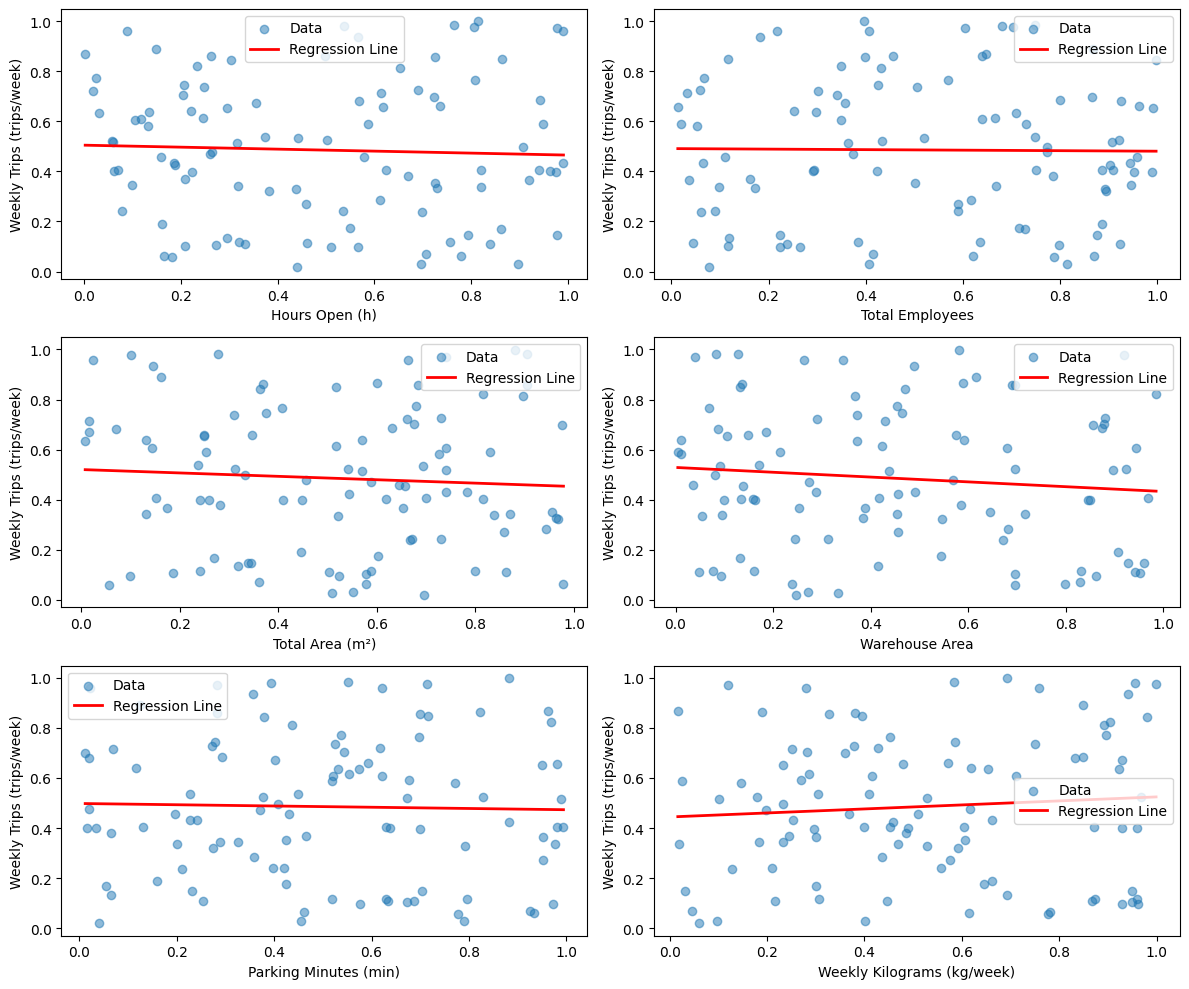

In [94]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Generating sample data for illustration since X_train is not provided
# Replace this with your actual data
np.random.seed(0)
X_train = np.random.rand(100, 6)
y_train = np.random.rand(100)

# List of independent variables
independent_variables = ['Hours Open (h)', 'Total Employees', 'Total Area (m²)', 'Warehouse Area (m²)', 'Parking Minutes (min)', 'Weekly Kilograms (kg/week)']

# Create subplots for each variable in a 3x2 grid
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# Flatten the axes array to access individual subplots
axes = axes.flatten()

# Loop through each independent variable
for i, var in enumerate(independent_variables):
    # Add a constant term (intercept) to the independent variable
    X_train_with_const = sm.add_constant(X_train[:, i])

    # Create and fit a linear regression model using statsmodels
    model = sm.OLS(y_train, X_train_with_const).fit()

    # Extract parameter estimates (coefficients)
    parameter_estimates = model.params

    # Plot the scatterplot
    axes[i].scatter(X_train[:, i], y_train, label='Data', alpha=0.5)
    
    # Plot the regression line
    x_range = [X_train[:, i].min(), X_train[:, i].max()]
    y_range = [parameter_estimates[0] + parameter_estimates[1] * x for x in x_range]
    axes[i].plot(x_range, y_range, color='red', label='Regression Line', linewidth=2)

    # Set labels and legend
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Weekly Trips (trips/week)')
    axes[i].legend()

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()


In [95]:
import pandas as pd
import statsmodels.api as sm

# Create an empty DataFrame to store the model parameters
parameter_df = pd.DataFrame(columns=['Variable', 'Coefficient', 'Std. Error', 't-value', 'p-value'])

# Loop through each independent variable
for var in independent_variables:
    # Add a constant term (intercept) to the independent variable
    X_train_with_const = sm.add_constant(X_train[var])

    # Create and fit a linear regression model using statsmodels
    model = sm.OLS(y_train, X_train_with_const).fit()

    # Extract parameter estimates (coefficients, std. errors, t-values, and p-values)
    coefficients = model.params
    std_errors = model.bse
    t_values = model.tvalues
    p_values = model.pvalues

    # Create a DataFrame for the current variable's parameters
    var_df = pd.DataFrame({
        'Variable': [var, 'Constant'],
        'Coefficient': [coefficients[var], coefficients['const']],
        'Std. Error': [std_errors[var], std_errors['const']],
        't-value': [t_values[var], t_values['const']],
        'p-value': [p_values[var], p_values['const']]
    })

    # Append the DataFrame to the main parameter DataFrame
    parameter_df = parameter_df.append(var_df, ignore_index=True)

# Save the parameter DataFrame to an Excel file
parameter_df.to_excel('model_parameters.xlsx', index=False)

print("Model parameters saved to 'model_parameters.xlsx'")


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

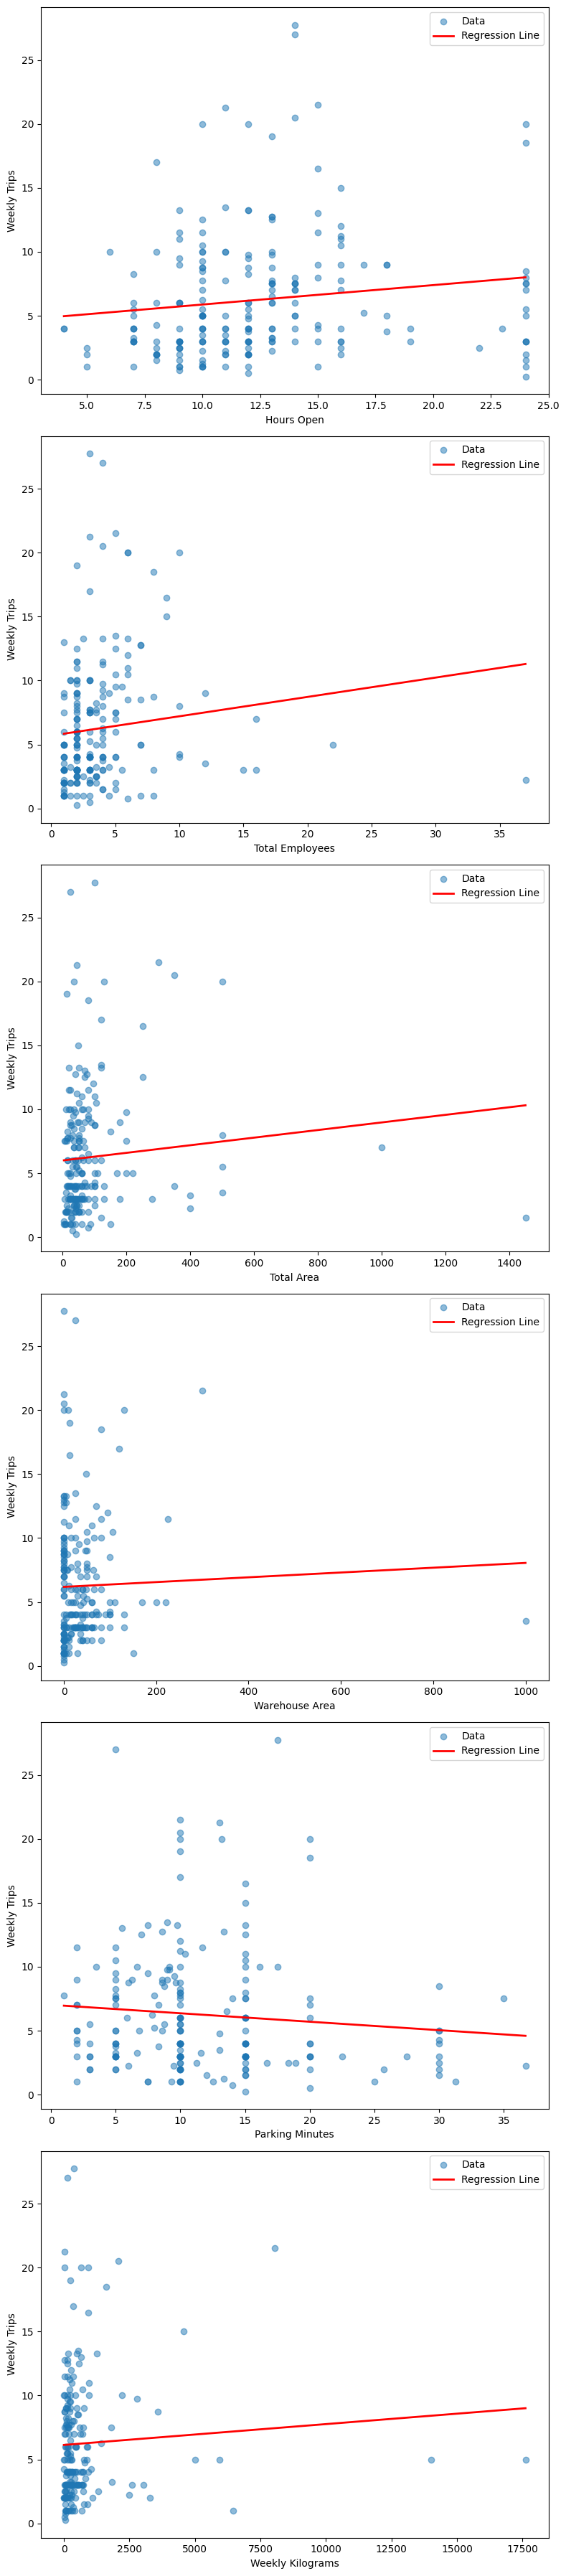

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# List of independent variables
independent_variables = ['Hours Open (h)', 'Total Employees', 'Total Area (m²)', 'Warehouse Area (m²)', 'Parking Minutes (min)', 'Weekly Kilograms (kg/week)']

# Initialize an empty dictionary to store results for each variable
results = {}

# Create subplots for each variable
fig, axes = plt.subplots(nrows=len(independent_variables), ncols=1, figsize=(8, 6*len(independent_variables)))

# Loop through each independent variable
for i, var in enumerate(independent_variables):
    # Add a constant term (intercept) to the independent variable
    X_train_with_const = sm.add_constant(X_train[var])

    # Create and fit a linear regression model using statsmodels
    model = sm.OLS(y_train, X_train_with_const).fit()

    # Extract parameter estimates (coefficients)
    parameter_estimates = model.params

    # Plot the scatterplot
    axes[i].scatter(X_train[var], y_train, label='Data', alpha=0.5)
    
    # Plot the regression line
    x_range = [X_train[var].min(), X_train[var].max()]
    y_range = [parameter_estimates['const'] + parameter_estimates[var] * x for x in x_range]
    axes[i].plot(x_range, y_range, color='red', label='Regression Line', linewidth=2)

    # Set labels and legend
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Weekly Trips (trips/week)')
    axes[i].legend()

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
import numpy as np

# Set the threshold for capping outliers
threshold = 3

# Create a copy of the original DataFrame to store the capped values
numeric_fs_df_capped = numeric_fs_df.copy()

# Loop through each column in the DataFrame
for column_name in numeric_fs_df.columns:
    # Calculate z-scores for the current column
    z_scores = (model_df[column_name] - model_df[column_name].mean()) / model_df[column_name].std()
    
    # Identify outliers based on the threshold
    outliers = np.abs(z_scores) > threshold
    
    # Cap the outliers at the threshold value
    numeric_fs_df_capped[column_name][outliers] = np.sign(numeric_fs_df_capped[column_name][outliers]) * threshold


C:\Users\Carlos Granada\AppData\Local\Temp\ipykernel_24496\657340023.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_fs_df_capped[column_name][outliers] = np.sign(numeric_fs_df_capped[column_name][outliers]) * threshold
C:\Users\Carlos Granada\AppData\Local\Temp\ipykernel_24496\657340023.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_fs_df_capped[column_name][outliers] = np.sign(numeric_fs_df_capped[column_name][outliers]) * threshold
C:\Users\Carlos Granada\AppData\Local\Temp\ipykernel_24496\657340023.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# List of independent variables
independent_variables = ['Hours Open (h)', 'Total Employees', 'Total Area (m²)', 'Warehouse Area (m²)', 'Parking Minutes (min)', 'Weekly Kilograms (kg/week)']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(numeric_fs_df_capped[independent_variables],
                                                    numeric_fs_df_capped['Weekly Trips (trips/week)'],
                                                    test_size=0.2,
                                                    random_state=42)

# Initialize an empty dictionary to store results for each variable
results = {}

# Loop through each independent variable
for var in independent_variables:
    # Initialize the linear regression model
    model = LinearRegression()

    # Train the model on the training data for the current variable
    model.fit(X_train[[var]], y_train)

    # Make predictions on the testing data for the current variable
    y_pred = model.predict(X_test[[var]])

    # Evaluate the model's performance for the current variable
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results in the dictionary
    results[var] = {'Mean Squared Error': mse, 'R-squared (R2) Score': r2}

# Print the results for each variable
for var, metrics in results.items():
    print(f"Results for '{var}':")
    print(f"Mean Squared Error: {metrics['Mean Squared Error']}")
    print(f"R-squared (R2) Score: {metrics['R-squared (R2) Score']}")
    print()

Results for 'Hours Open':
Mean Squared Error: 27.361277031071044
R-squared (R2) Score: -0.024571345116268795

Results for 'Total Employees':
Mean Squared Error: 27.045831295814832
R-squared (R2) Score: -0.012759152983729427

Results for 'Total Area':
Mean Squared Error: 27.6745128081891
R-squared (R2) Score: -0.03630078307839102

Results for 'Warehouse Area':
Mean Squared Error: 26.896756417580352
R-squared (R2) Score: -0.00717688983342768

Results for 'Parking Minutes':
Mean Squared Error: 26.40289598365832
R-squared (R2) Score: 0.011316225400506918

Results for 'Weekly Kilograms':
Mean Squared Error: 27.093664234276655
R-squared (R2) Score: -0.014550306885100284



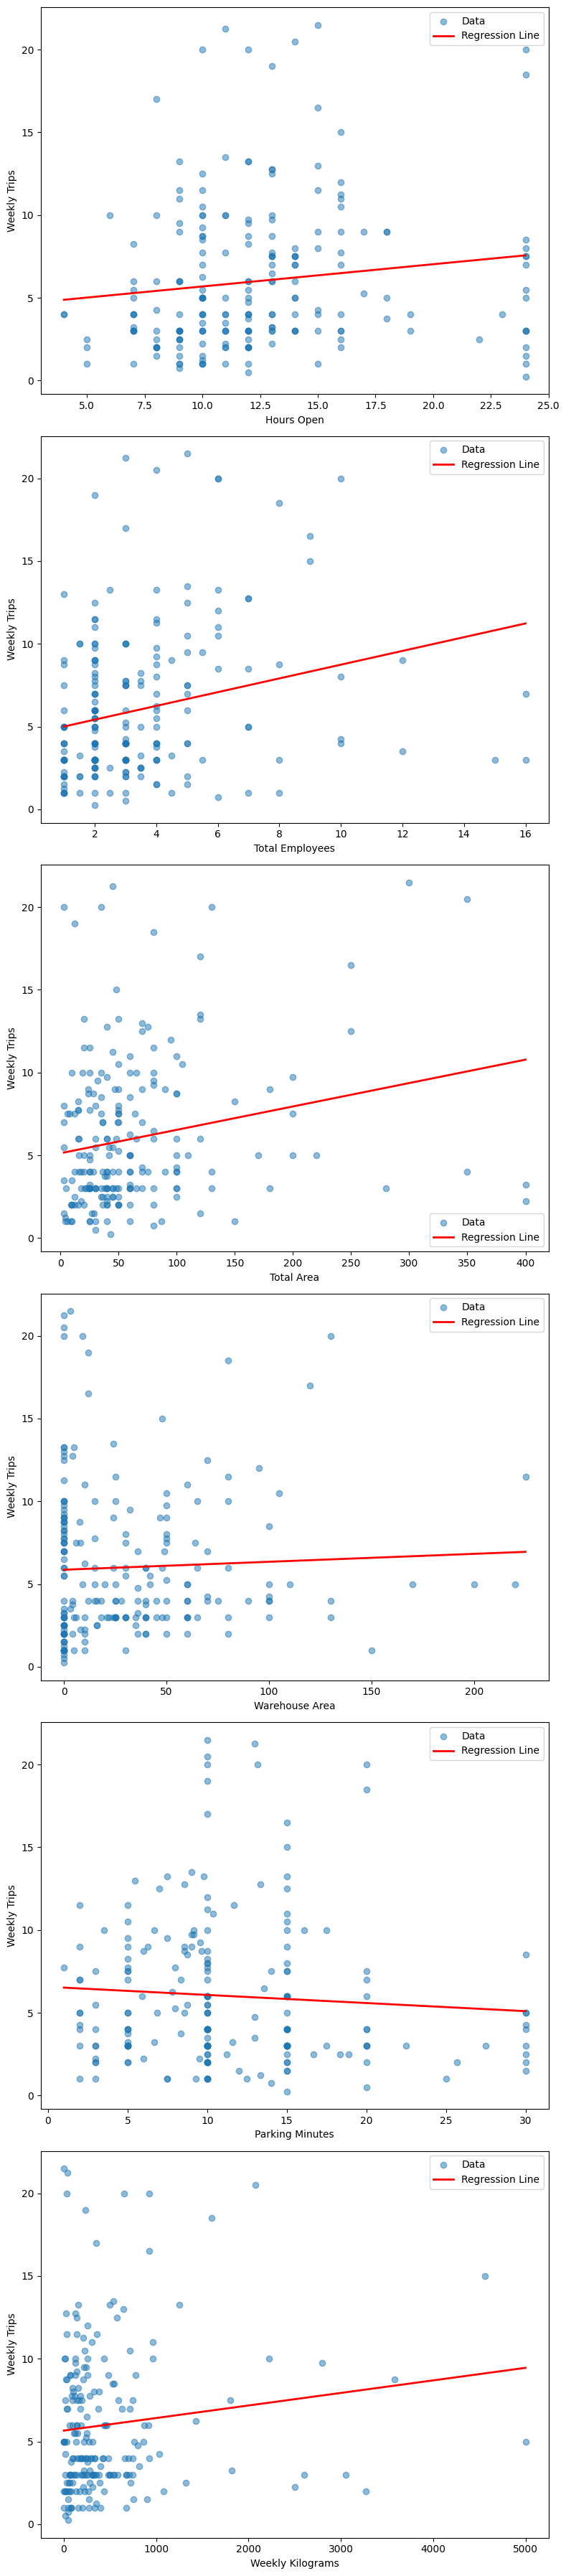

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# List of independent variables
independent_variables = ['Hours Open (h)', 'Total Employees', 
                         'Total Area (m²)', 'Warehouse Area (m²)', 
                         'Parking Minutes (min)', 'Weekly Kilograms (kg/week)']

# Initialize an empty dictionary to store results for each variable
results = {}

# Create subplots for each variable
fig, axes = plt.subplots(nrows=len(independent_variables), ncols=1, figsize=(8, 6*len(independent_variables)))

# Loop through each independent variable
for i, var in enumerate(independent_variables):
    # Add a constant term (intercept) to the independent variable
    X_train_with_const = sm.add_constant(X_train[var])

    # Create and fit a linear regression model using statsmodels
    model = sm.OLS(y_train, X_train_with_const).fit()

    # Extract parameter estimates (coefficients)
    parameter_estimates = model.params

    # Plot the scatterplot
    axes[i].scatter(X_train[var], y_train, label='Data', alpha=0.5)
    
    # Plot the regression line
    x_range = [X_train[var].min(), X_train[var].max()]
    y_range = [parameter_estimates['const'] + parameter_estimates[var] * x for x in x_range]
    axes[i].plot(x_range, y_range, color='red', label='Regression Line', linewidth=2)

    # Set labels and legend
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Weekly Trips (trips/week)')
    axes[i].legend()

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

# Stata commands

In [ ]:
import subprocess

# Example: Execute a Stata command from Python
command = "stata -b do your_stata_script.do"
subprocess.call(command, shell=True)


1

<Axes: xlabel='Count', ylabel='Viajes semanales'>

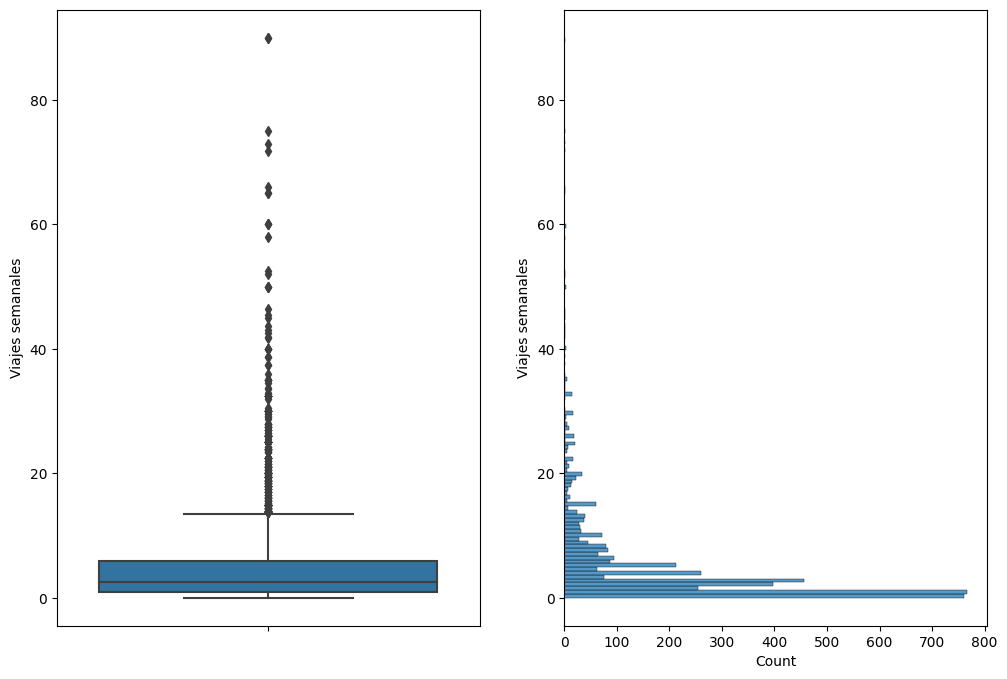

In [ ]:
fig, ax =plt.subplots(1,2, figsize=(12,8))
sns.boxplot(y='Viajes semanales',data=df, ax=ax[0])
sns.histplot(y='Viajes semanales',data=df, ax=ax[1])